## data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns
import datetime as dt
import matplotlib.font_manager as fm
import random

from matplotlib import gridspec
from scipy import stats

In [2]:
# BASE_DIR = Path(__name__).resolve().parent.parent
FILES_DIR = '../files/'
bidding_df = pd.read_csv(FILES_DIR + 'bidding_results.csv')

In [3]:
fm.get_fontconfig_fonts()
font_location = 'C:\\WINDOWS\\Fonts\\malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_11212\2582751676.py:1: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [4]:
bidding = bidding_df.copy()

In [5]:
# column describe 
def descriptive_info(bidding):
    number_of_cells = bidding.count(axis=0, level=None, numeric_only=False)
    print('Total number of cells the datafile has: \n' + str(number_of_cells))
    print('\n')
    print('Printing descriptive statistics...\n\n', bidding.describe())

descriptive_info(bidding)

Total number of cells the datafile has: 
index              1337088
Impression         1337088
Click              1337088
Cost               1337088
Sum of AD rank     1337078
Bid                1337088
Price(PC)          1337088
Price(Mobile)      1337088
Delivery Fee       1337088
Category Name 1    1337088
Category Name 2    1337088
Category Name 3    1331221
Category Name 4     930132
date               1337088
dtype: int64


Printing descriptive statistics...

               index    Impression         Click          Cost  Sum of AD rank  \
count  1.337088e+06  1.337088e+06  1.337088e+06  1.337088e+06    1.337078e+06   
mean   5.167098e+06  4.412753e+01  7.189467e-01  1.800053e+02    1.138271e+01   
std    2.655813e+06  3.434510e+02  3.423456e+00  1.772706e+03    1.323231e+01   
min    2.578600e+04  0.000000e+00  0.000000e+00  0.000000e+00    1.000000e+00   
25%    3.300168e+06  3.000000e+00  0.000000e+00  0.000000e+00    3.706897e+00   
50%    4.637081e+06  1.000000e+01  0.000000

In [6]:
# bidding 날짜 datetime으로 만들기
def _trans_date_time(bidding):
    bidding.index = pd.to_datetime(bidding['date'], format='%Y%m%d')
    bidding.drop('date', axis=1, inplace=True)
    return bidding

_trans_date_time(bidding)

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4
date,,,,,,,,,,,,,
2022-10-31,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸
2022-10-31,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저
2022-10-31,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파
2022-10-31,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,NaN
2022-10-31,4131482,224,0,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저
2023-01-03,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품
2023-01-03,2566881,1,0,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,NaN


In [7]:
# CTR = 클릭률
# CPC = 클릭당 비용
# CPM = 1000회 노출당 비용
# Sum of AD rank = 반올림
bidding["CTR"] = (bidding["Click"]/bidding["Impression"]) * 100
bidding["CPC"] = (bidding["Cost"]/bidding["Click"])
bidding["CPM"] = (bidding["Cost"]/1000)
bidding['Sum of AD rank'] = bidding['Sum of AD rank'].round(0)

In [8]:
bidding_drop_null = bidding.copy()
bidding_drop_null['Category Name 4'].fillna('null_cat4', inplace = True)
bidding_drop_null['CPC'].fillna(0, inplace = True)
bidding_drop_null.dropna(axis = 0, inplace = True)
print(bidding_drop_null.isnull().sum().sort_values(ascending=False)) # null값 퍼센트로 표현

index              0
Impression         0
Click              0
Cost               0
Sum of AD rank     0
Bid                0
Price(PC)          0
Price(Mobile)      0
Delivery Fee       0
Category Name 1    0
Category Name 2    0
Category Name 3    0
Category Name 4    0
CTR                0
CPC                0
CPM                0
dtype: int64


In [9]:
bidding_drop_null

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,CTR,CPC,CPM
date,,,,,,,,,,,,,,,,
2022-10-31,3575092,3,0,0.0,3.0,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,0.000000,0.0,0.00
2022-10-31,3575637,6,0,0.0,3.0,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2022-10-31,4129259,7,0,0.0,8.0,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,0.000000,0.0,0.00
2022-10-31,4131479,36,3,150.0,4.0,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,null_cat4,8.333333,50.0,0.15
2022-10-31,4131482,224,0,0.0,6.0,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,null_cat4,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2566795,5,0,0.0,13.0,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2023-01-03,2566880,3,0,0.0,17.0,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,0.000000,0.0,0.00
2023-01-03,2566881,1,0,0.0,8.0,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,null_cat4,0.000000,0.0,0.00


## price 구간별 cost 민감도에 따른 rank

In [10]:
price_down_5 = bidding_drop_null[bidding_drop_null['Price(PC)'] <= 50000]

price_5_10 = bidding_drop_null[(bidding_drop_null['Price(PC)'] > 50000) & (bidding_drop_null['Price(PC)'] < 100000)]

price_10_15 = bidding_drop_null[(bidding_drop_null['Price(PC)'] > 100000) & (bidding_drop_null['Price(PC)'] < 150000)]

price_15_20 = bidding_drop_null[(bidding_drop_null['Price(PC)'] > 150000) & (bidding_drop_null['Price(PC)'] < 200000)]

price_up_20 = bidding_drop_null[bidding_drop_null['Price(PC)'] >= 200000]

In [85]:
def price_Analysis(df):
        
    print('비용평균')
    print(df['Cost'].mean())
    print('-' * 50)
    print('\n')
    
    cost_non_zero = df[df['Cost'] != 0]
    
    
    print(f'코스트 썼을때 평균 순위 : {cost_non_zero["Sum of AD rank"].mean()}')

    cost_zero = df[df['Cost'] == 0]

    print(f'코스트 안 썼을때 평균 순위 : {cost_zero["Sum of AD rank"].mean()}')
    print('-' * 50)
    print('\n')
  

    print("광고숫자비율")
    print((len(list(set(df['index'].values))) / len(df))*100)
    print('-' * 50)
    print('\n')
    
    
    rank_del_zero = df[df['Delivery Fee'] <= 0]
    rank_del_non_zero = df[df['Delivery Fee'] > 0]
    print('배달비 없음 비율')
    print((rank_del_zero.shape[0] / df['Delivery Fee'].shape[0]*100))
    print('\n')
    print('배달비 있음 비율')
    print((rank_del_non_zero.shape[0] / df['Delivery Fee'].shape[0]*100))  
    print('-' * 50)
    print('\n')
    

    print('코스트비율')
    print(df['Cost'].value_counts(normalize=True))
    print('-' * 50)
    print('\n')
    
    plt.figure(figsize=(28, 12))
    plt.subplot(4, 1, 1)
    print('코스트')
    display(cost_non_zero['Cost'].describe())
    plt.hist(cost_non_zero['Cost'], bins=20)
    plt.title('cost_non_zero')
    plt.xticks(rotation=90)
    
    
    print('-' * 50)
    print('\n')
    
    
    plt.subplot(4, 1, 2)
    print('카테고리1')
    display(df['Category Name 1'].value_counts(normalize=True))
    sns.countplot(x=df['Category Name 1'], data=df)
    plt.title('Category Name 1')
    plt.xticks(rotation=90)
    
    
    print('-' * 50)
    print('\n')
    
    
    plt.subplot(4, 1, 3)
    print('코스트 있음 , 순위')
    display(cost_non_zero['Sum of AD rank'].describe())
    plt.hist(cost_non_zero['Sum of AD rank'], bins=20)
    plt.title('cost_non_zero')
    plt.xticks(rotation=90)
    
    
    print('-' * 50)
    print('\n')
    
    
    plt.subplot(4, 1, 4)
    print('코스트 없음 , 순위')
    display(cost_zero['Sum of AD rank'].describe())
    plt.hist(cost_zero['Sum of AD rank'], bins=20)
    plt.title('cost_zero')
    plt.xticks(rotation=90)
    

    plt.subplot(4, 1, 1)
    print('코스트')
    # display(cost_non_zero['Cost'].describe())
    plt.boxplot(cost_non_zero['Cost'])
    plt.title('cost_non_zero')
    plt.xticks()

비용평균
167.80673792112006
--------------------------------------------------


코스트 썼을때 평균 순위 : 6.01917086348931
코스트 안 썼을때 평균 순위 : 13.595440104968716
--------------------------------------------------


광고숫자비율
3.8164244239623955
--------------------------------------------------


배달비 없음 비율
40.11324425725326


배달비 있음 비율
59.88675574274674
--------------------------------------------------


코스트비율
0.0        0.759737
50.0       0.051082
100.0      0.017548
150.0      0.009396
200.0      0.006845
             ...   
11830.0    0.000002
8910.0     0.000002
13810.0    0.000002
12050.0    0.000002
9060.0     0.000002
Name: Cost, Length: 1739, dtype: float64
--------------------------------------------------


코스트
--------------------------------------------------


카테고리1


가구/인테리어    0.506722
생활/건강      0.417855
출산/육아      0.026109
스포츠/레저     0.015120
패션잡화       0.012150
화장품/미용     0.010542
디지털/가전     0.007847
패션의류       0.003034
여가/생활편의    0.000372
식품         0.000250
Name: Category Name 1, dtype: float64

--------------------------------------------------


코스트 있음 , 순위


count    149915.000000
mean          6.019171
std           6.244767
min           1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          98.000000
Name: Sum of AD rank, dtype: float64

--------------------------------------------------


코스트 없음 , 순위


count    474046.000000
mean         13.595440
std          15.471149
min           1.000000
25%           4.000000
50%           8.000000
75%          16.000000
max         100.000000
Name: Sum of AD rank, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\s

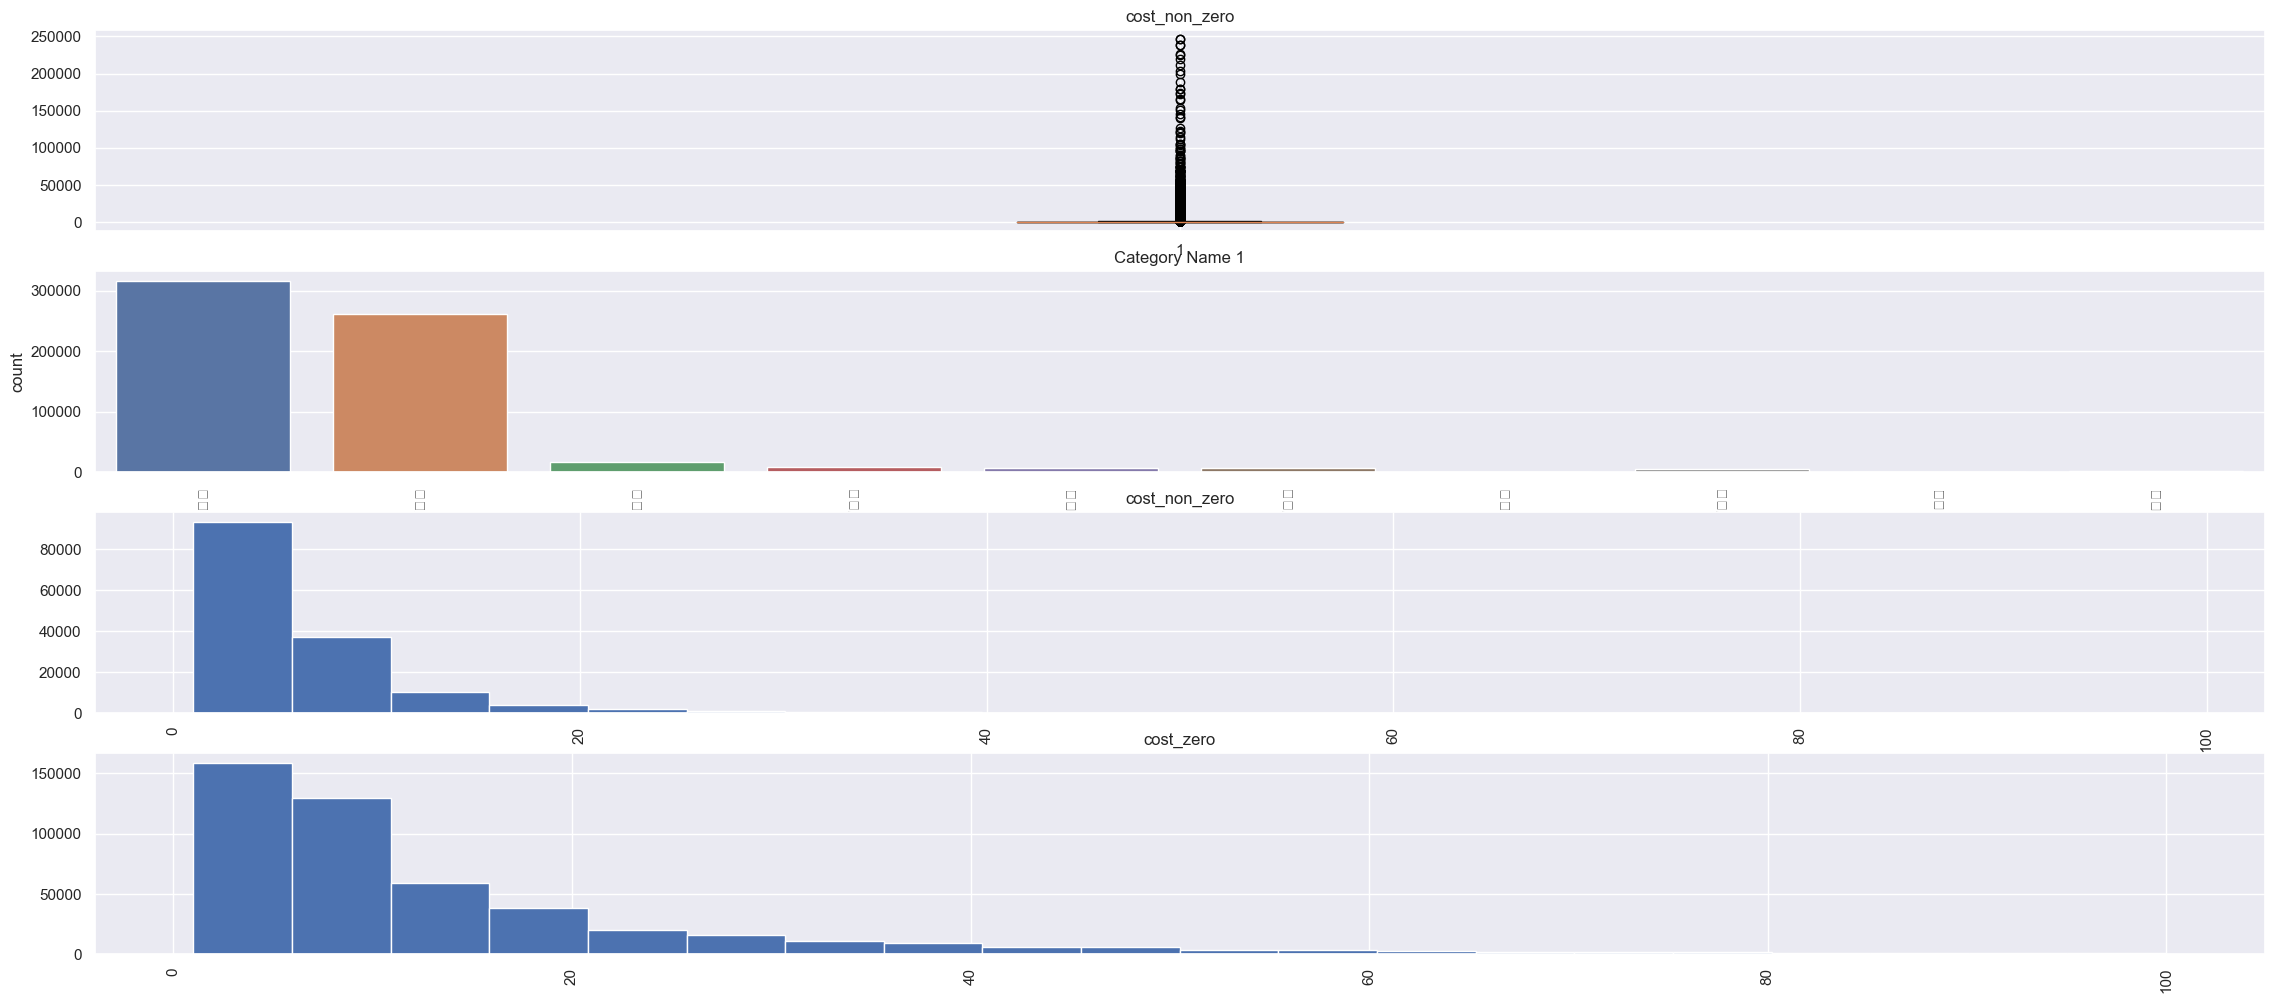

In [84]:
price_Analysis(price_down_5)

비용평균
169.75988080378508
--------------------------------------------------


코스트 썼을때 평균 순위 : 6.468736928072028
코스트 안 썼을때 평균 순위 : 13.20863936834374
--------------------------------------------------


광고숫자비율
3.7204414601536326
--------------------------------------------------


배달비 없음 비율
72.29230700919132


배달비 있음 비율
27.70769299080867
--------------------------------------------------


코스트비율
0.0        0.752318
50.0       0.051270
100.0      0.017238
150.0      0.008792
200.0      0.006478
             ...   
9010.0     0.000005
7370.0     0.000005
10850.0    0.000005
86540.0    0.000005
17610.0    0.000005
Name: Cost, Length: 1053, dtype: float64
--------------------------------------------------


코스트


count     50203.000000
mean        685.393303
std        3481.783996
min          50.000000
25%          90.000000
50%         230.000000
75%         500.000000
max      325300.000000
Name: Cost, dtype: float64

--------------------------------------------------


카테고리1


가구/인테리어    0.803943
생활/건강      0.147180
출산/육아      0.022744
스포츠/레저     0.016912
화장품/미용     0.003602
디지털/가전     0.002309
여가/생활편의    0.001495
패션의류       0.000878
패션잡화       0.000671
식품         0.000266
Name: Category Name 1, dtype: float64

--------------------------------------------------


코스트 있음 , 순위


count    50203.000000
mean         6.468737
std          6.288642
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         98.000000
Name: Sum of AD rank, dtype: float64

--------------------------------------------------


코스트 없음 , 순위


count    152488.000000
mean         13.208639
std          14.539568
min           1.000000
25%           4.000000
50%           8.000000
75%          16.000000
max         100.000000
Name: Sum of AD rank, dtype: float64

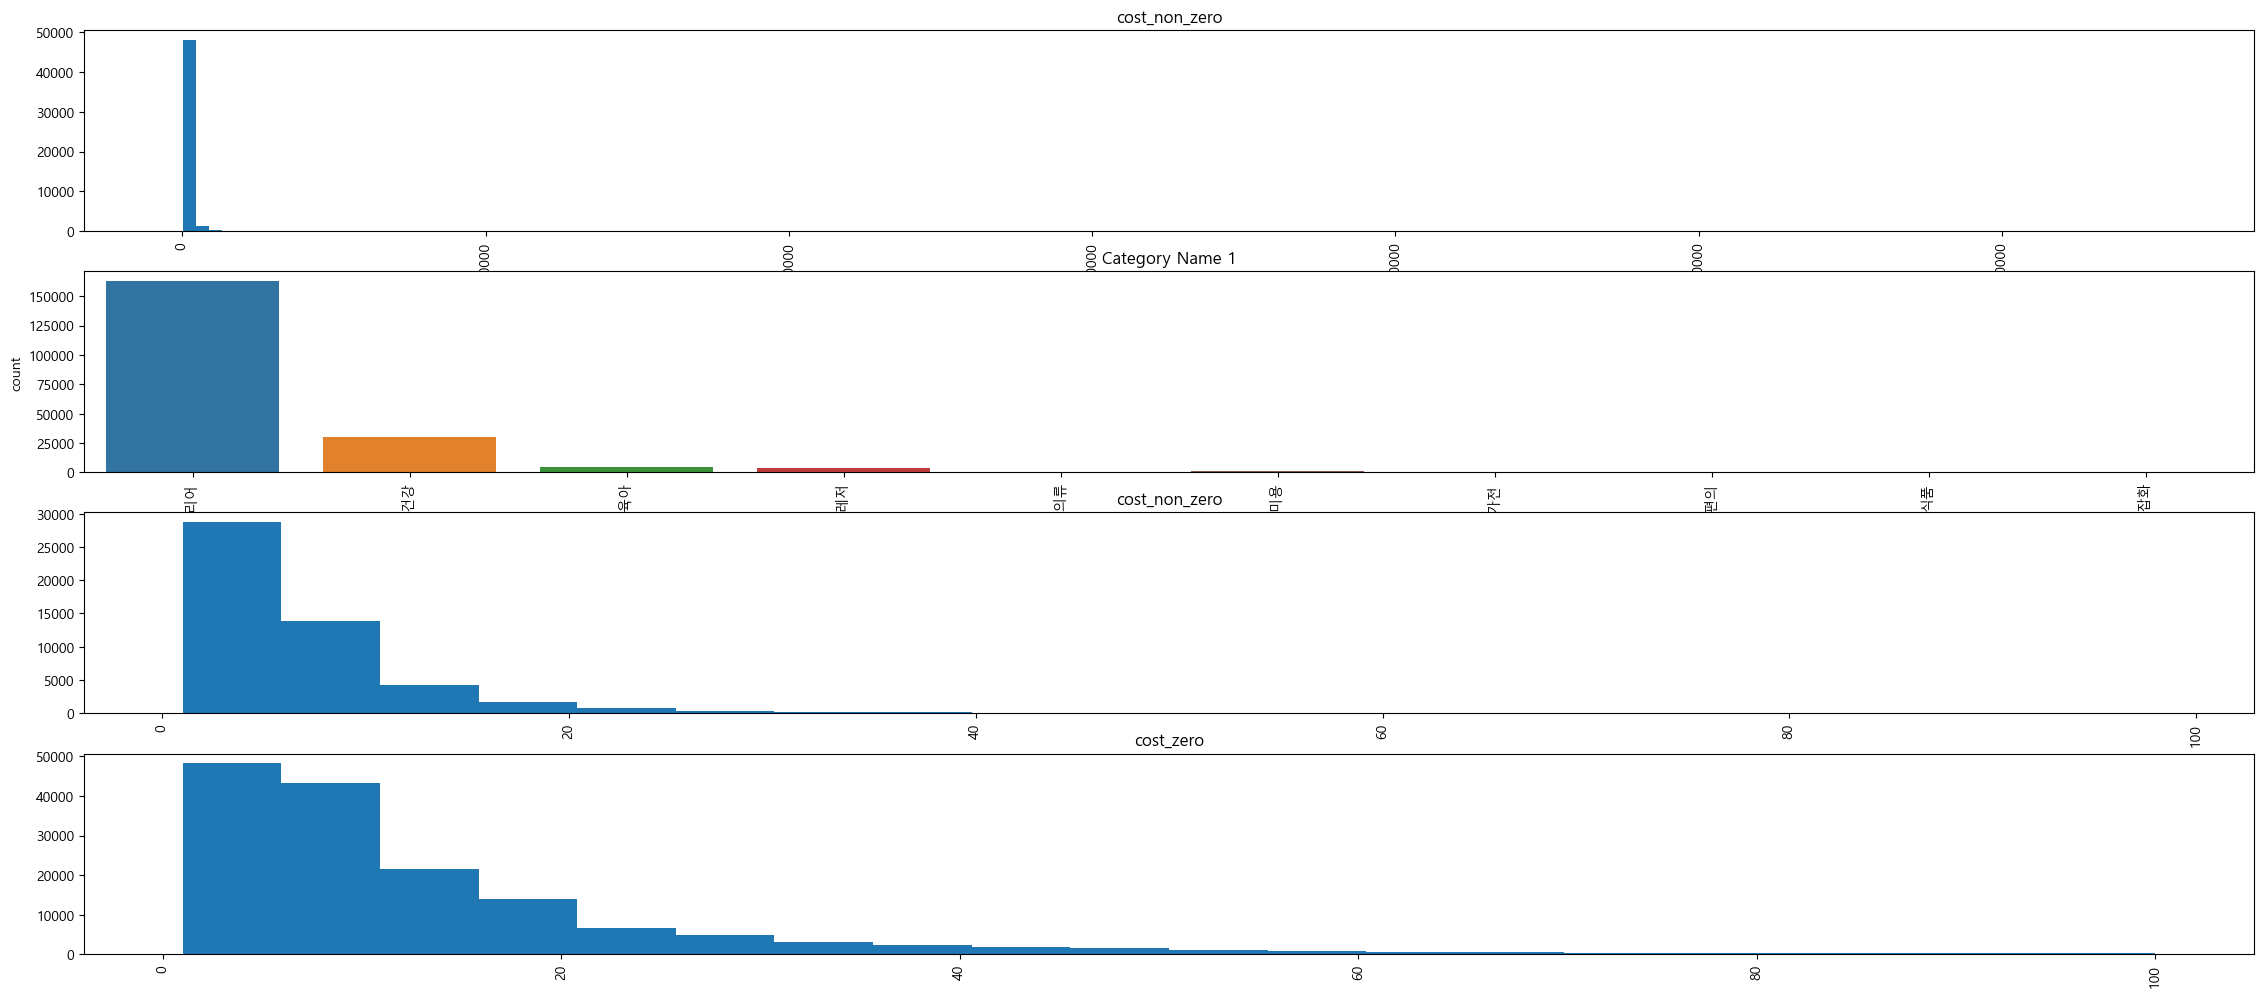

In [13]:
price_Analysis(price_5_10)

비용평균
176.7522275674545
--------------------------------------------------


코스트 썼을때 평균 순위 : 6.805257416335293
코스트 안 썼을때 평균 순위 : 13.58261623567634
--------------------------------------------------


광고숫자비율
3.8761765321062542
--------------------------------------------------


배달비 없음 비율
86.22798577703409


배달비 있음 비율
13.772014222965906
--------------------------------------------------


코스트비율
0.0        0.762251
50.0       0.042836
100.0      0.014097
150.0      0.007956
200.0      0.005806
             ...   
6180.0     0.000008
7770.0     0.000008
28530.0    0.000008
14250.0    0.000008
26380.0    0.000008
Name: Cost, Length: 855, dtype: float64
--------------------------------------------------


코스트


count     28417.000000
mean        743.439139
std        3118.644716
min          50.000000
25%         100.000000
50%         260.000000
75%         580.000000
max      185690.000000
Name: Cost, dtype: float64

--------------------------------------------------


카테고리1


가구/인테리어    0.886785
생활/건강      0.082041
출산/육아      0.013587
스포츠/레저     0.012039
디지털/가전     0.001824
여가/생활편의    0.001732
패션의류       0.001723
화장품/미용     0.000167
패션잡화       0.000100
Name: Category Name 1, dtype: float64

--------------------------------------------------


코스트 있음 , 순위


count    28417.000000
mean         6.805257
std          6.476787
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         93.000000
Name: Sum of AD rank, dtype: float64

--------------------------------------------------


코스트 없음 , 순위


count    91108.000000
mean        13.582616
std         14.520047
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max        100.000000
Name: Sum of AD rank, dtype: float64

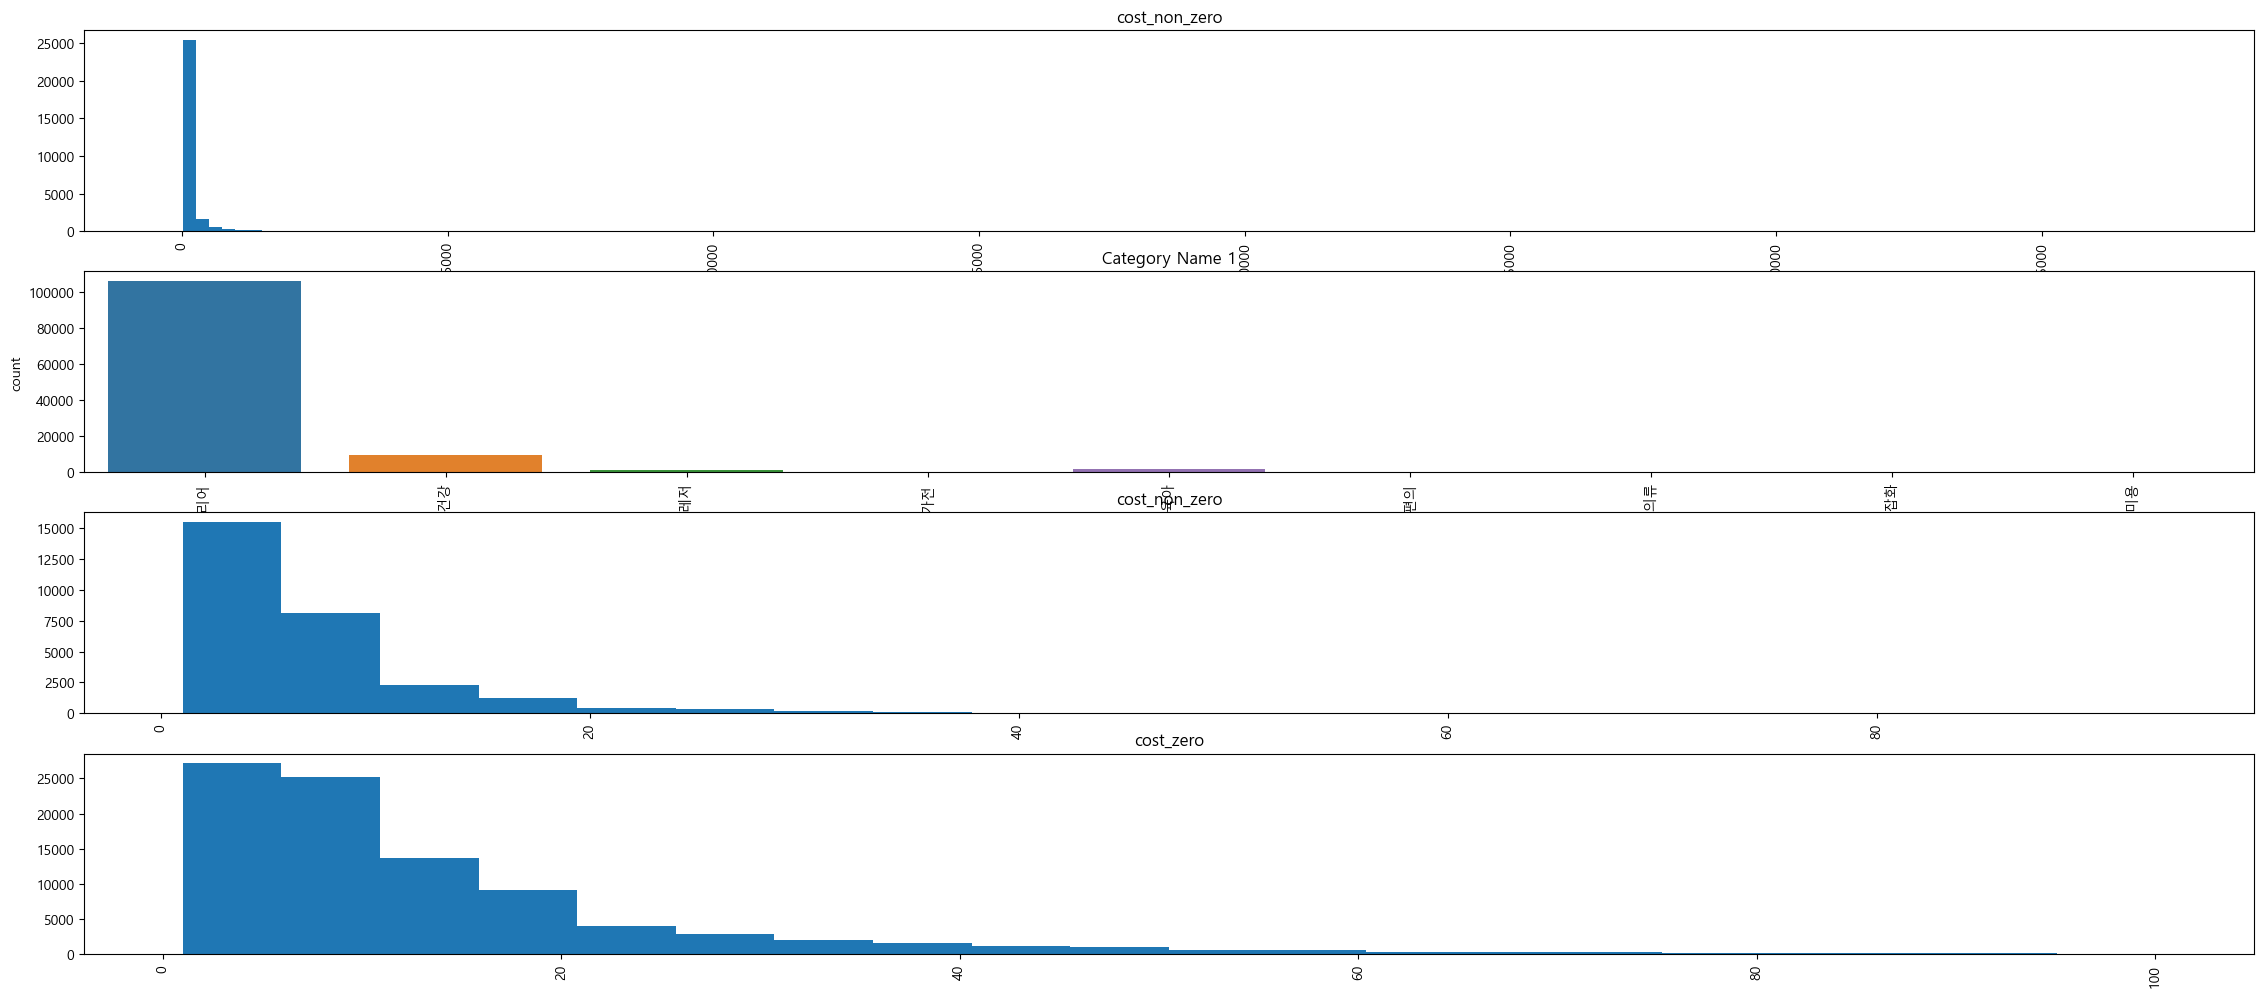

In [14]:
price_Analysis(price_10_15)

비용평균
203.27396972012716
--------------------------------------------------


코스트 썼을때 평균 순위 : 6.766107397808393
코스트 안 썼을때 평균 순위 : 13.122434039064101
--------------------------------------------------


광고숫자비율
3.8054734137400184
--------------------------------------------------


배달비 없음 비율
88.89368818597644


배달비 있음 비율
11.106311814023547
--------------------------------------------------


코스트비율
0.0         0.756421
50.0        0.045453
100.0       0.014210
150.0       0.007199
350.0       0.006490
              ...   
6950.0      0.000011
117480.0    0.000011
23020.0     0.000011
9760.0      0.000011
3110.0      0.000011
Name: Cost, Length: 754, dtype: float64
--------------------------------------------------


코스트


count     21993.000000
mean        834.529623
std        4027.003254
min          50.000000
25%         100.000000
50%         260.000000
75%         600.000000
max      191400.000000
Name: Cost, dtype: float64

--------------------------------------------------


카테고리1


가구/인테리어    0.931732
생활/건강      0.053505
출산/육아      0.007509
스포츠/레저     0.005117
여가/생활편의    0.000986
패션의류       0.000598
화장품/미용     0.000365
패션잡화       0.000144
디지털/가전     0.000044
Name: Category Name 1, dtype: float64

--------------------------------------------------


코스트 있음 , 순위


count    21993.000000
mean         6.766107
std          6.462560
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max        100.000000
Name: Sum of AD rank, dtype: float64

--------------------------------------------------


코스트 없음 , 순위


count    68298.000000
mean        13.122434
std         13.854315
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max        100.000000
Name: Sum of AD rank, dtype: float64

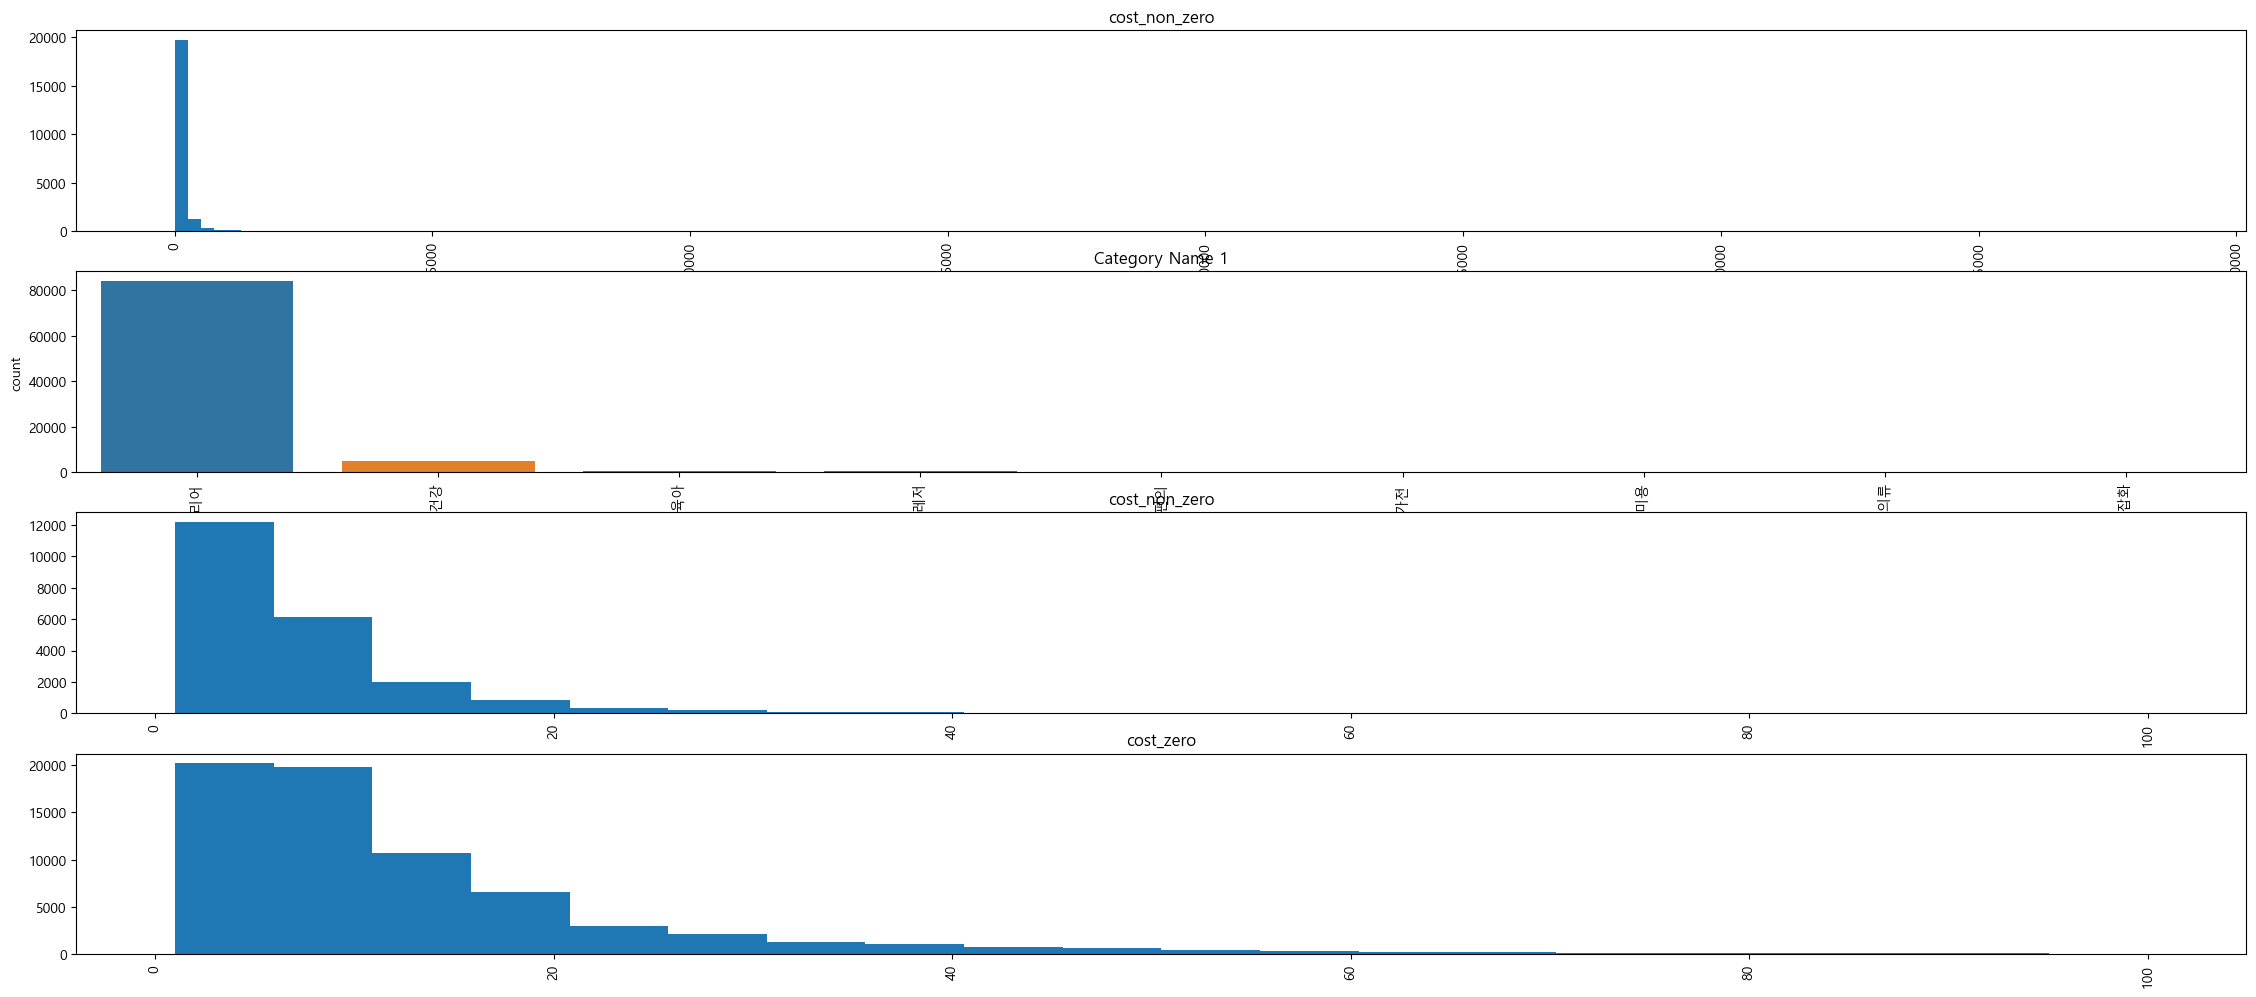

In [15]:
price_Analysis(price_15_20)

비용평균
210.78078991056972
--------------------------------------------------


코스트 썼을때 평균 순위 : 5.927594324616657
코스트 안 썼을때 평균 순위 : 11.778050682443254
--------------------------------------------------


광고숫자비율
3.5259716747169865
--------------------------------------------------


배달비 없음 비율
94.15526299608528


배달비 있음 비율
5.84473700391471
--------------------------------------------------


코스트비율
0.0        0.731555
50.0       0.049074
100.0      0.017521
150.0      0.009432
250.0      0.007051
             ...   
27480.0    0.000003
17020.0    0.000003
14300.0    0.000003
13070.0    0.000003
15800.0    0.000003
Name: Cost, Length: 1293, dtype: float64
--------------------------------------------------


코스트


count     78585.000000
mean        785.192976
std        3459.069587
min          50.000000
25%         100.000000
50%         260.000000
75%         600.000000
max      259530.000000
Name: Cost, dtype: float64

--------------------------------------------------


카테고리1


가구/인테리어    0.966342
생활/건강      0.022672
출산/육아      0.005869
스포츠/레저     0.004068
디지털/가전     0.000506
화장품/미용     0.000362
패션잡화       0.000157
여가/생활편의    0.000024
Name: Category Name 1, dtype: float64

--------------------------------------------------


코스트 있음 , 순위


count    78585.000000
mean         5.927594
std          5.286060
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         90.000000
Name: Sum of AD rank, dtype: float64

--------------------------------------------------


코스트 없음 , 순위


count    214157.000000
mean         11.778051
std          12.014084
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         100.000000
Name: Sum of AD rank, dtype: float64

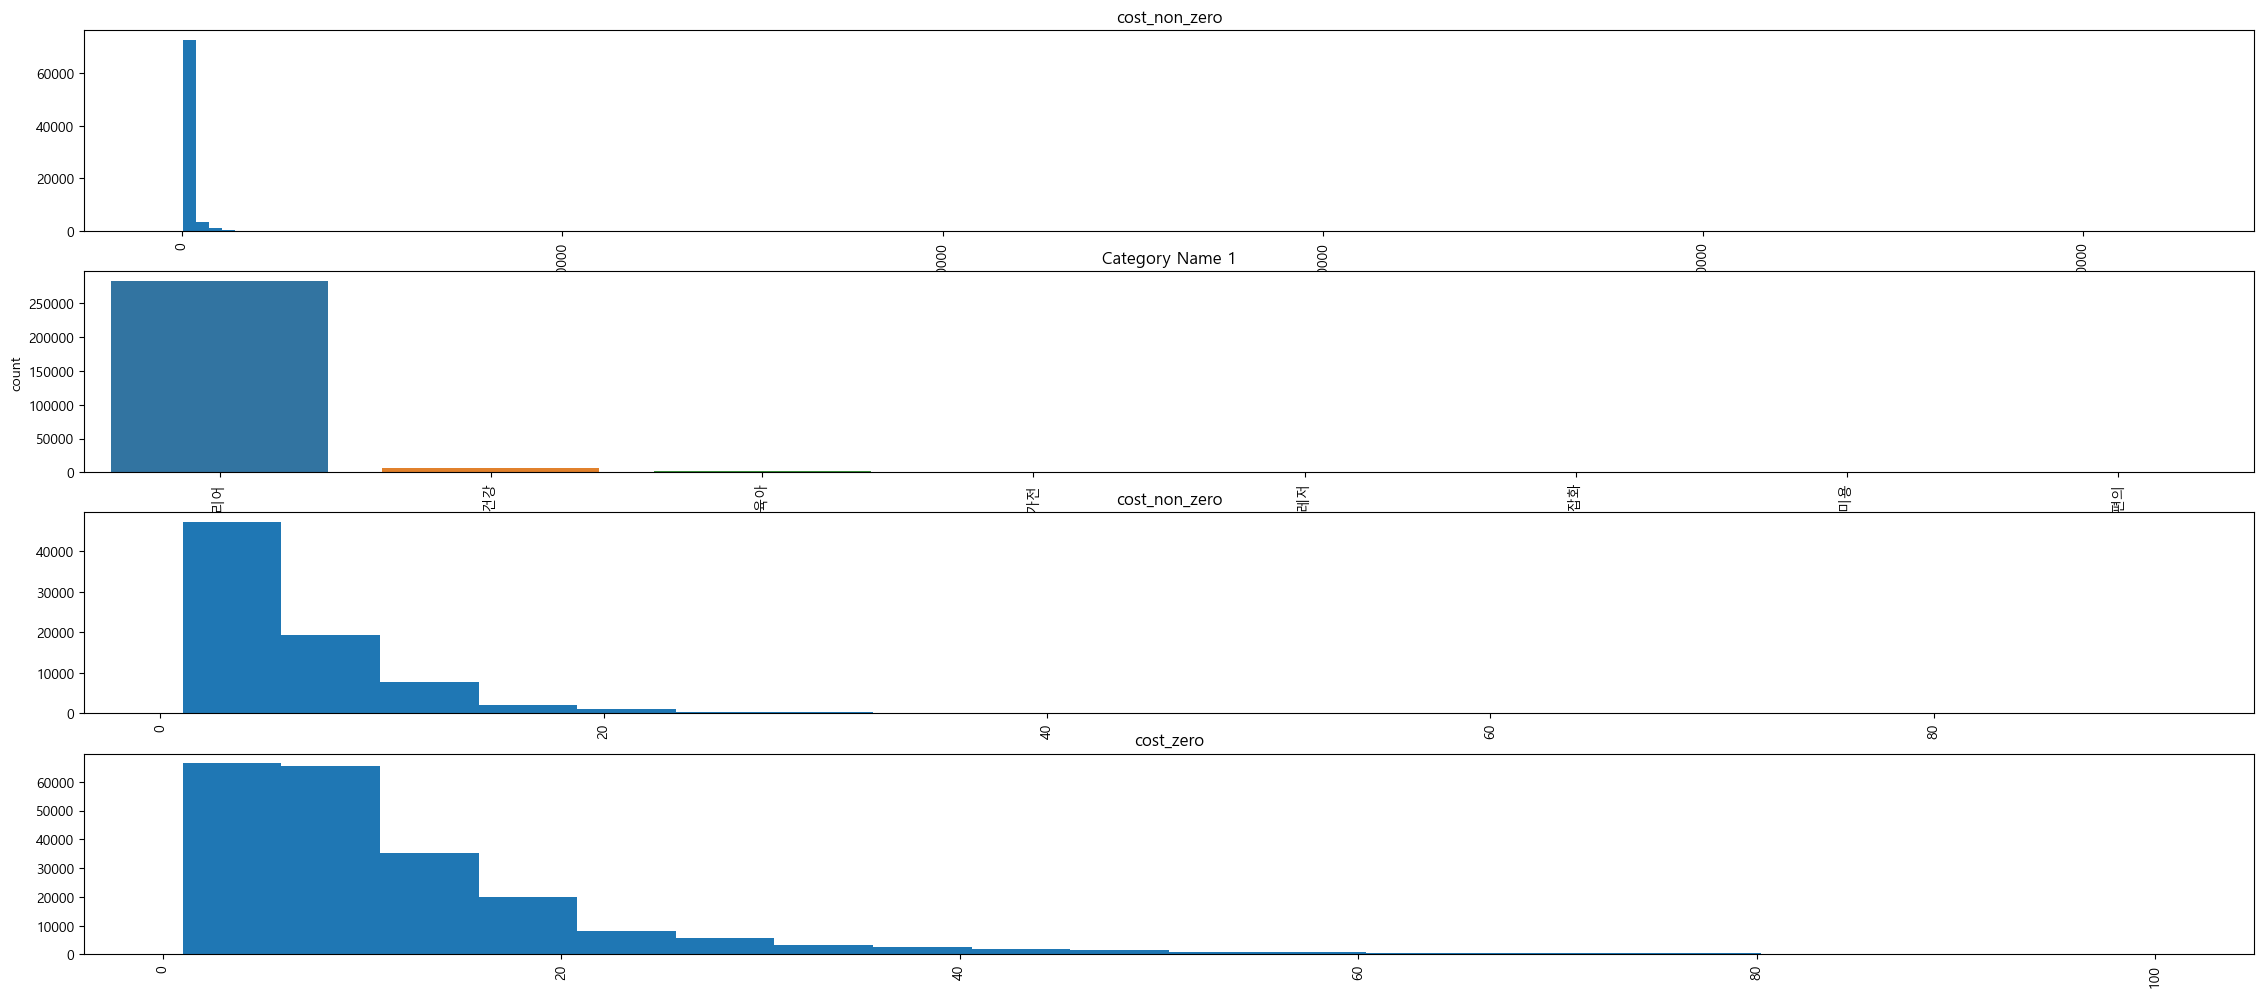

In [16]:
price_Analysis(price_up_20)

In [17]:
def corr_heat(df):
    sns.set(rc = {'figure.figsize':(15,8)}, font_scale = 1)
    sns.heatmap(data = df.corr(), annot=True, linewidths=1)

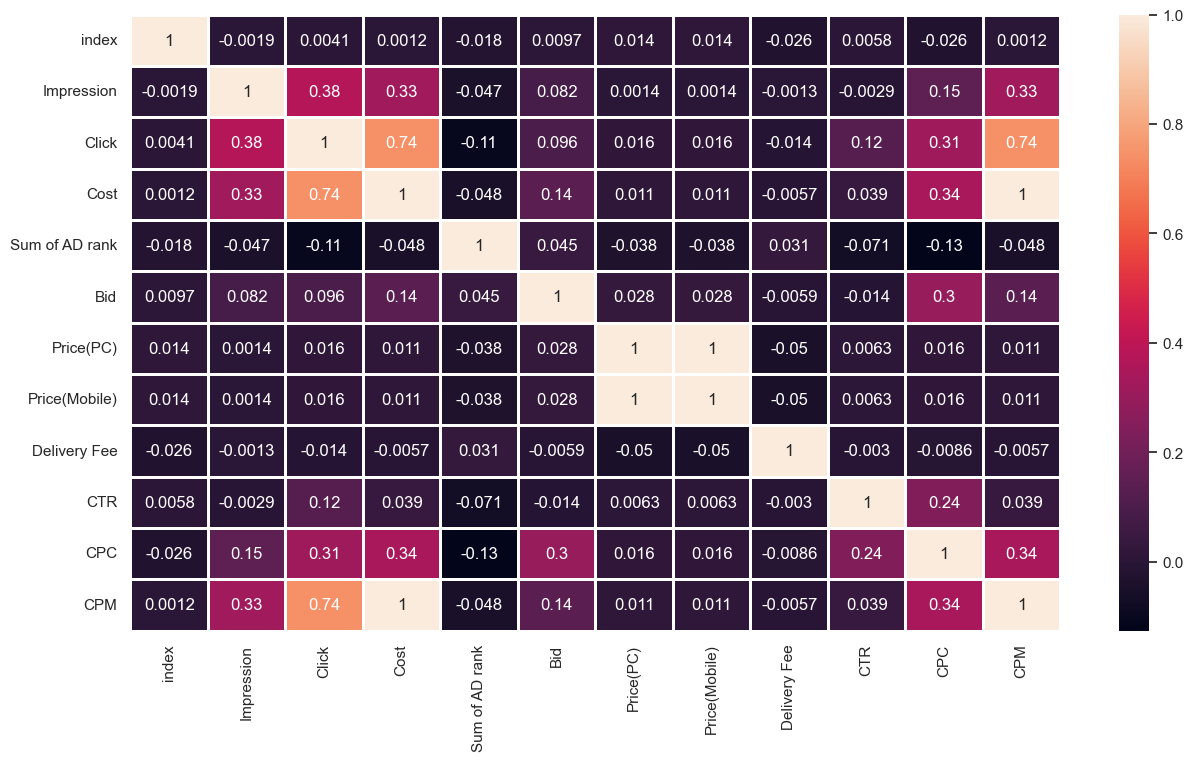

In [18]:
corr_heat(price_down_5)

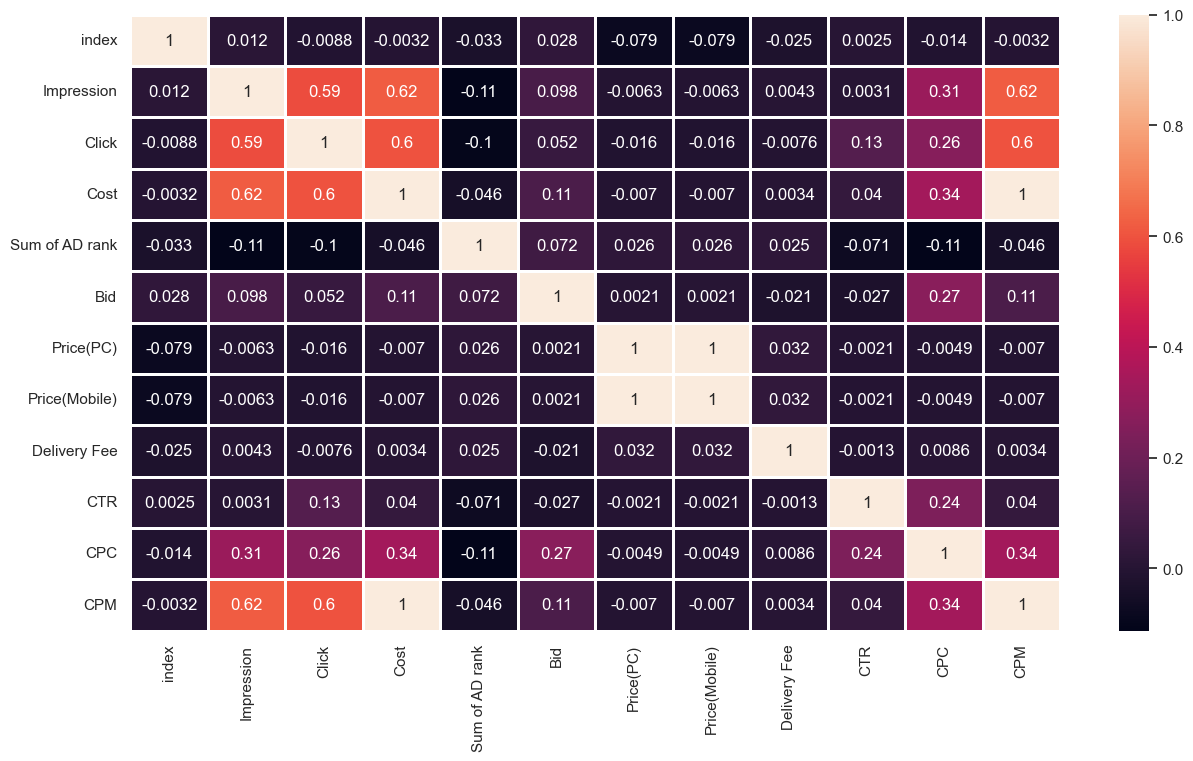

In [19]:
corr_heat(price_5_10)

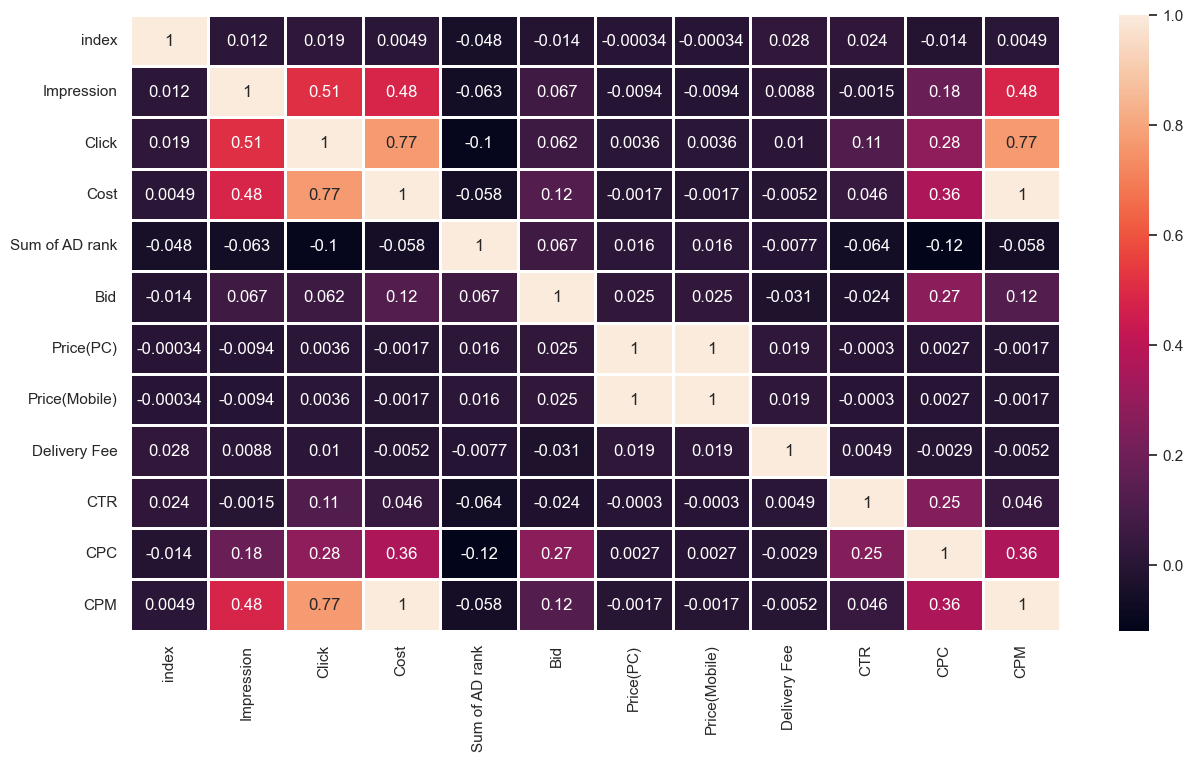

In [20]:
corr_heat(price_10_15)

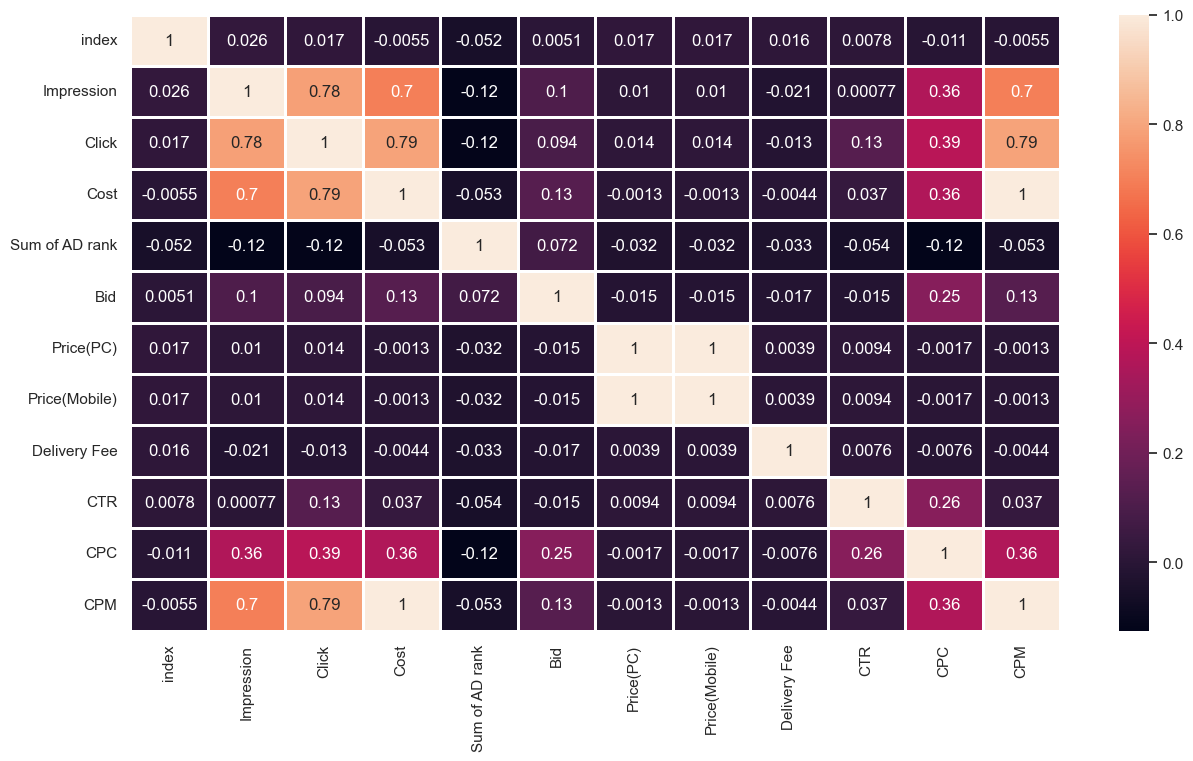

In [21]:
corr_heat(price_15_20)

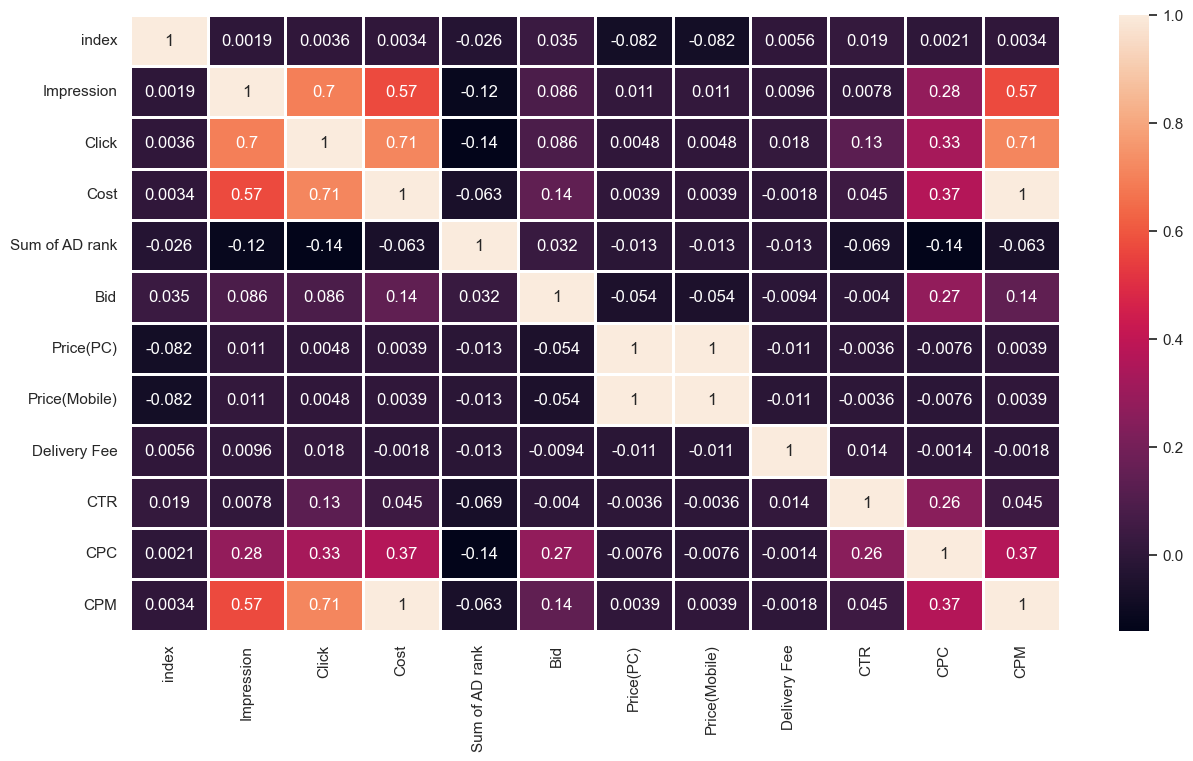

In [22]:
corr_heat(price_up_20)

## rank 구간별 
### 네이버 페이지 기본 default 40, 한페이지에 광고가 6개 상위3개 중간에3개(20개보기, 40개보기, 60개보기, 80개보기)
### log에서 얻은 인사이트로 윈도우가 압도적으로 많으니 윈도우 기준

In [23]:
bidding_drop_null

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,CTR,CPC,CPM
date,,,,,,,,,,,,,,,,
2022-10-31,3575092,3,0,0.0,3.0,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,0.000000,0.0,0.00
2022-10-31,3575637,6,0,0.0,3.0,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2022-10-31,4129259,7,0,0.0,8.0,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,0.000000,0.0,0.00
2022-10-31,4131479,36,3,150.0,4.0,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,null_cat4,8.333333,50.0,0.15
2022-10-31,4131482,224,0,0.0,6.0,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,null_cat4,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2566795,5,0,0.0,13.0,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2023-01-03,2566880,3,0,0.0,17.0,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,0.000000,0.0,0.00
2023-01-03,2566881,1,0,0.0,8.0,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,null_cat4,0.000000,0.0,0.00


In [24]:
rank_down_26 = bidding_drop_null[bidding_drop_null['Sum of AD rank'] <= 26]

rank_26_46 = bidding_drop_null[(bidding_drop_null['Sum of AD rank'] > 26) & (bidding_drop_null['Sum of AD rank'] < 46)]

rank_46_66 = bidding_drop_null[(bidding_drop_null['Sum of AD rank'] > 46) & (bidding_drop_null['Sum of AD rank'] < 66)]

rank_66_86 = bidding_drop_null[(bidding_drop_null['Sum of AD rank'] > 66) & (bidding_drop_null['Sum of AD rank'] < 86)]

rank_up_86 = bidding_drop_null[bidding_drop_null['Sum of AD rank'] >= 86]

In [138]:
def rank_col(df):
    print("광고숫자비율")
    print((len(list(set(df['index'].values))) / len(df))*100)
    print('-' * 50)
    
    columns = ['Click', 'Cost', 'Impression', 'Price(PC)']
    
    for col in columns:
        print('\n')
        print(col)
        print(df[col].mean())
        print('-' * 50)
        print(df[col].value_counts(normalize=True))
    

In [139]:
rank_col(rank_down_26)

광고숫자비율
3.965566909266703
--------------------------------------------------


Click
0.790540585286385
--------------------------------------------------
0      7.315716e-01
1      1.452935e-01
2      5.034917e-02
3      2.366592e-02
4      1.332921e-02
           ...     
195    8.277981e-07
240    8.277981e-07
257    8.277981e-07
177    8.277981e-07
455    8.277981e-07
Name: Click, Length: 189, dtype: float64


Cost
197.78499433786084
--------------------------------------------------
0.0        7.315716e-01
50.0       5.392856e-02
100.0      1.859731e-02
150.0      9.850798e-03
200.0      7.199360e-03
               ...     
26190.0    8.277981e-07
42270.0    8.277981e-07
10720.0    8.277981e-07
46930.0    8.277981e-07
10160.0    8.277981e-07
Name: Cost, Length: 2406, dtype: float64


Impression
48.3159283259273
--------------------------------------------------
1       9.384416e-02
2       7.156646e-02
3       5.861639e-02
4       4.985414e-02
5       4.313490e-02
            ...   

In [140]:
rank_col(rank_26_46)

광고숫자비율
25.564515081869292
--------------------------------------------------


Click
0.06485917961902536
--------------------------------------------------
0    0.943139
1    0.050888
2    0.004532
3    0.001039
4    0.000247
5    0.000130
6    0.000026
Name: Click, dtype: float64


Cost
18.740212691363794
--------------------------------------------------
0.0       0.943139
50.0      0.008414
350.0     0.002987
250.0     0.001883
180.0     0.001766
            ...   
3040.0    0.000013
1470.0    0.000013
2280.0    0.000013
2030.0    0.000013
1890.0    0.000013
Name: Cost, Length: 163, dtype: float64


Impression
5.943671847610144
--------------------------------------------------
1      0.214198
2      0.188682
3      0.145261
4      0.095815
5      0.072910
         ...   
120    0.000013
172    0.000013
187    0.000013
236    0.000013
162    0.000013
Name: Impression, Length: 204, dtype: float64


Price(PC)
143206.4081259008
--------------------------------------------------
9900   

In [141]:
rank_col(rank_46_66)

광고숫자비율
39.259515305142685
--------------------------------------------------


Click
0.02757614164458271
--------------------------------------------------
0    0.973653
1    0.025195
2    0.001075
3    0.000077
Name: Click, dtype: float64


Cost
7.31459077466682
--------------------------------------------------
0.0      0.973653
50.0     0.004033
350.0    0.001805
250.0    0.001421
210.0    0.001229
           ...   
420.0    0.000038
970.0    0.000038
740.0    0.000038
710.0    0.000038
780.0    0.000038
Name: Cost, Length: 77, dtype: float64


Impression
3.1726005300149787
--------------------------------------------------
1      0.405615
2      0.245996
3      0.125975
4      0.074778
5      0.044206
         ...   
131    0.000038
98     0.000038
107    0.000038
85     0.000038
124    0.000038
Name: Impression, Length: 105, dtype: float64


Price(PC)
136608.30053385565
--------------------------------------------------
19900      0.011599
7900       0.010946
9900       0.010946
4

In [142]:
rank_col(rank_66_86)

광고숫자비율
49.78980076768415
--------------------------------------------------


Click
0.009230488027782854
--------------------------------------------------
0    0.99077
1    0.00923
Name: Click, dtype: float64


Cost
1.8890513617254616
--------------------------------------------------
0.0      0.990770
50.0     0.001828
180.0    0.001005
130.0    0.000548
350.0    0.000548
210.0    0.000457
240.0    0.000366
250.0    0.000366
410.0    0.000366
140.0    0.000274
320.0    0.000274
300.0    0.000274
260.0    0.000183
160.0    0.000183
280.0    0.000183
360.0    0.000183
400.0    0.000183
60.0     0.000183
100.0    0.000183
200.0    0.000183
110.0    0.000183
220.0    0.000183
120.0    0.000183
450.0    0.000091
980.0    0.000091
90.0     0.000091
150.0    0.000091
520.0    0.000091
270.0    0.000091
230.0    0.000091
190.0    0.000091
170.0    0.000091
290.0    0.000091
Name: Cost, dtype: float64


Impression
1.949734966185341
--------------------------------------------------
1      0.6

In [143]:
rank_col(rank_up_86)

광고숫자비율
56.46306818181818
--------------------------------------------------


Click
0.006036931818181818
--------------------------------------------------
0    0.993963
1    0.006037
Name: Click, dtype: float64


Cost
0.9499289772727273
--------------------------------------------------
0.0      0.993963
50.0     0.002308
210.0    0.000533
400.0    0.000355
200.0    0.000355
280.0    0.000355
180.0    0.000355
160.0    0.000355
170.0    0.000355
190.0    0.000178
500.0    0.000178
120.0    0.000178
240.0    0.000178
130.0    0.000178
110.0    0.000178
Name: Cost, dtype: float64


Impression
1.3357599431818181
--------------------------------------------------
1     0.806463
2     0.141513
3     0.030717
4     0.008345
5     0.004439
6     0.004261
12    0.000533
7     0.000533
26    0.000355
36    0.000355
19    0.000355
13    0.000355
8     0.000355
25    0.000178
21    0.000178
11    0.000178
17    0.000178
37    0.000178
20    0.000178
10    0.000178
9     0.000178
Name: Impression

In [144]:
print("rank_down_26 광고숫자비율")
print((len(list(set(rank_down_26['index'].values))) / len(rank_down_26))*100)
print('-' * 50)
print("rank_26_46 광고숫자비율")
print((len(list(set(rank_26_46['index'].values))) / len(rank_26_46))*100)
print('-' * 50)
print("rank_46_66 광고숫자비율")
print((len(list(set(rank_46_66['index'].values))) / len(rank_46_66))*100)
print('-' * 50)
print("rank_66_86 광고숫자비율")
print((len(list(set(rank_66_86['index'].values))) / len(rank_66_86))*100)
print('-' * 50)
print("rank_up_86 광고숫자비율")
print((len(list(set(rank_up_86['index'].values))) / len(rank_up_86))*100)
print('-' * 50)

rank_down_26 광고숫자비율
3.965566909266703
--------------------------------------------------
rank_26_46 광고숫자비율
25.564515081869292
--------------------------------------------------
rank_46_66 광고숫자비율
39.259515305142685
--------------------------------------------------
rank_66_86 광고숫자비율
49.78980076768415
--------------------------------------------------
rank_up_86 광고숫자비율
56.46306818181818
--------------------------------------------------


In [150]:
print('rank_down_26')
print(rank_down_26['Click'].mean())
print('-' * 50)
print(rank_down_26['Click'].value_counts(normalize=True))
print('-' * 50)
print('rank_26_46')
print(rank_26_46['Click'].mean())
print('-' * 50)
print(rank_26_46['Click'].value_counts(normalize=True))
print('-' * 50)
print('rank_46_66')
print(rank_46_66['Click'].mean())
print('-' * 50)
print(rank_46_66['Click'].value_counts(normalize=True))
print('-' * 50)
print('rank_66_86')
print(rank_66_86['Click'].mean())
print('-' * 50)
print(rank_66_86['Click'].value_counts(normalize=True))
print('-' * 50)
print('rank_up_86')
print(rank_up_86['Click'].mean())
print('-' * 50)
print(rank_up_86['Click'].value_counts(normalize=True))
print('-' * 50)

rank_down_26
0.790540585286385
--------------------------------------------------
0      7.315716e-01
1      1.452935e-01
2      5.034917e-02
3      2.366592e-02
4      1.332921e-02
           ...     
195    8.277981e-07
240    8.277981e-07
257    8.277981e-07
177    8.277981e-07
455    8.277981e-07
Name: Click, Length: 189, dtype: float64
--------------------------------------------------
rank_26_46
0.06485917961902536
--------------------------------------------------
0    0.943139
1    0.050888
2    0.004532
3    0.001039
4    0.000247
5    0.000130
6    0.000026
Name: Click, dtype: float64
--------------------------------------------------
rank_46_66
0.02757614164458271
--------------------------------------------------
0    0.973653
1    0.025195
2    0.001075
3    0.000077
Name: Click, dtype: float64
--------------------------------------------------
rank_66_86
0.009230488027782854
--------------------------------------------------
0    0.99077
1    0.00923
Name: Click, dtype: f

In [151]:
print('rank_down_26')
print(rank_down_26['Cost'].mean())
print('-' * 50)
print(rank_down_26['Cost'].value_counts(normalize=True))
print('-' * 50)
print('rank_26_46')
print(rank_26_46['Cost'].mean())
print('-' * 50)
print(rank_26_46['Cost'].value_counts(normalize=True))
print('-' * 50)
print('rank_46_66')
print(rank_46_66['Cost'].mean())
print('-' * 50)
print(rank_46_66['Cost'].value_counts(normalize=True))
print('-' * 50)
print('rank_66_86')
print(rank_66_86['Cost'].mean())
print('-' * 50)
print(rank_66_86['Cost'].value_counts(normalize=True))
print('-' * 50)
print('rank_up_86')
print(rank_up_86['Cost'].mean())
print('-' * 50)
print(rank_up_86['Cost'].value_counts(normalize=True))
print('-' * 50)

rank_down_26
197.78499433786084
--------------------------------------------------
0.0        7.315716e-01
50.0       5.392856e-02
100.0      1.859731e-02
150.0      9.850798e-03
200.0      7.199360e-03
               ...     
26190.0    8.277981e-07
42270.0    8.277981e-07
10720.0    8.277981e-07
46930.0    8.277981e-07
10160.0    8.277981e-07
Name: Cost, Length: 2406, dtype: float64
--------------------------------------------------
rank_26_46
18.740212691363794
--------------------------------------------------
0.0       0.943139
50.0      0.008414
350.0     0.002987
250.0     0.001883
180.0     0.001766
            ...   
3040.0    0.000013
1470.0    0.000013
2280.0    0.000013
2030.0    0.000013
1890.0    0.000013
Name: Cost, Length: 163, dtype: float64
--------------------------------------------------
rank_46_66
7.31459077466682
--------------------------------------------------
0.0      0.973653
50.0     0.004033
350.0    0.001805
250.0    0.001421
210.0    0.001229
           

In [152]:
print('rank_down_26')
print(rank_down_26['Impression'].mean())
print('-' * 50)
print(rank_down_26['Impression'].value_counts(normalize=True))
print('-' * 50)
print('rank_26_46')
print(rank_26_46['Impression'].mean())
print('-' * 50)
print(rank_26_46['Impression'].value_counts(normalize=True))
print('-' * 50)
print('rank_46_66')
print(rank_46_66['Impression'].mean())
print('-' * 50)
print(rank_46_66['Impression'].value_counts(normalize=True))
print('-' * 50)
print('rank_66_86')
print(rank_66_86['Impression'].mean())
print('-' * 50)
print(rank_66_86['Impression'].value_counts(normalize=True))
print('-' * 50)
print('rank_up_86')
print(rank_up_86['Impression'].mean())
print('-' * 50)
print(rank_up_86['Impression'].value_counts(normalize=True))
print('-' * 50)

rank_down_26
48.3159283259273
--------------------------------------------------
1       9.384416e-02
2       7.156646e-02
3       5.861639e-02
4       4.985414e-02
5       4.313490e-02
            ...     
2211    8.277981e-07
3981    8.277981e-07
2767    8.277981e-07
1163    8.277981e-07
1590    8.277981e-07
Name: Impression, Length: 2732, dtype: float64
--------------------------------------------------
rank_26_46
5.943671847610144
--------------------------------------------------
1      0.214198
2      0.188682
3      0.145261
4      0.095815
5      0.072910
         ...   
120    0.000013
172    0.000013
187    0.000013
236    0.000013
162    0.000013
Name: Impression, Length: 204, dtype: float64
--------------------------------------------------
rank_46_66
3.1726005300149787
--------------------------------------------------
1      0.405615
2      0.245996
3      0.125975
4      0.074778
5      0.044206
         ...   
131    0.000038
98     0.000038
107    0.000038
85     0.000

In [155]:
print('rank_down_26')
print(rank_down_26['Price(PC)'].mean())
print('-' * 50)
print(rank_down_26['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('rank_26_46')
print(rank_26_46['Price(PC)'].mean())
print('-' * 50)
print(rank_26_46['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('rank_46_66')
print(rank_46_66['Price(PC)'].mean())
print('-' * 50)
print(rank_46_66['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('rank_66_86')
print(rank_66_86['Price(PC)'].mean())
print('-' * 50)
print(rank_66_86['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('rank_up_86')
print(rank_up_86['Price(PC)'].mean())
print('-' * 50)
print(rank_up_86['Price(PC)'].value_counts(normalize=True))
print('-' * 50)

rank_down_26
187572.42825059767
--------------------------------------------------
9900       1.186069e-02
19900      1.045757e-02
29900      8.902969e-03
12900      8.641385e-03
14900      8.610756e-03
               ...     
1156200    8.277981e-07
1330040    8.277981e-07
1548980    8.277981e-07
1578500    8.277981e-07
2550       8.277981e-07
Name: Price(PC), Length: 7447, dtype: float64
--------------------------------------------------
rank_26_46
143206.4081259008
--------------------------------------------------
9900       0.012037
19900      0.010232
8900       0.009855
7900       0.009037
29900      0.008973
             ...   
1107000    0.000013
3076000    0.000013
47560      0.000013
1376000    0.000013
9000000    0.000013
Name: Price(PC), Length: 3019, dtype: float64
--------------------------------------------------
rank_46_66
136608.30053385565
--------------------------------------------------
19900      0.011599
7900       0.010946
9900       0.010946
4900       0.01063

In [154]:
print('rank_down_26')
print(rank_down_26['Price(PC)'].median())
print('-' * 50)
print(rank_down_26['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('rank_26_46')
print(rank_26_46['Price(PC)'].median())
print('-' * 50)
print(rank_26_46['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('rank_46_66')
print(rank_46_66['Price(PC)'].median())
print('-' * 50)
print(rank_46_66['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('rank_66_86')
print(rank_66_86['Price(PC)'].median())
print('-' * 50)
print(rank_66_86['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('rank_up_86')
print(rank_up_86['Price(PC)'].median())
print('-' * 50)
print(rank_up_86['Price(PC)'].value_counts(normalize=True))
print('-' * 50)

rank_down_26
59900.0
--------------------------------------------------
9900       1.186069e-02
19900      1.045757e-02
29900      8.902969e-03
12900      8.641385e-03
14900      8.610756e-03
               ...     
1156200    8.277981e-07
1330040    8.277981e-07
1548980    8.277981e-07
1578500    8.277981e-07
2550       8.277981e-07
Name: Price(PC), Length: 7447, dtype: float64
--------------------------------------------------
rank_26_46
45890.0
--------------------------------------------------
9900       0.012037
19900      0.010232
8900       0.009855
7900       0.009037
29900      0.008973
             ...   
1107000    0.000013
3076000    0.000013
47560      0.000013
1376000    0.000013
9000000    0.000013
Name: Price(PC), Length: 3019, dtype: float64
--------------------------------------------------
rank_46_66
39500.0
--------------------------------------------------
19900      0.011599
7900       0.010946
9900       0.010946
4900       0.010639
8900       0.010331
          

## rank 26이하와 26초과로 분석

In [37]:
bidding_drop_null

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,CTR,CPC,CPM
date,,,,,,,,,,,,,,,,
2022-10-31,3575092,3,0,0.0,3.0,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,0.000000,0.0,0.00
2022-10-31,3575637,6,0,0.0,3.0,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2022-10-31,4129259,7,0,0.0,8.0,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,0.000000,0.0,0.00
2022-10-31,4131479,36,3,150.0,4.0,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,null_cat4,8.333333,50.0,0.15
2022-10-31,4131482,224,0,0.0,6.0,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,null_cat4,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2566795,5,0,0.0,13.0,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2023-01-03,2566880,3,0,0.0,17.0,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,0.000000,0.0,0.00
2023-01-03,2566881,1,0,0.0,8.0,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,null_cat4,0.000000,0.0,0.00


In [38]:
rank_down_7 = bidding_drop_null[bidding_drop_null['Sum of AD rank'] <= 7]
rank_down_26 = bidding_drop_null[bidding_drop_null['Sum of AD rank'] <= 26]
rank_up_26 = bidding_drop_null[bidding_drop_null['Sum of AD rank'] > 26]

In [162]:
def rank_Analysis(df):
        
    print('비용평균')
    print(df['Cost'].mean())
    print('-' * 50)
    print('\n')
    
    cost_non_zero = df[df['Cost'] != 0]
    
    
    print(f'코스트 썼을때 평균 순위 : {cost_non_zero["Sum of AD rank"].mean()}')

    cost_zero = df[df['Cost'] == 0]

    print(f'코스트 안 썼을때 평균 순위 : {cost_zero["Sum of AD rank"].mean()}')
    print('-' * 50)
    print('\n')
  

    print("광고숫자비율")
    print((len(list(set(df['index'].values))) / len(df))*100)
    print('-' * 50)
    print('\n')
    
    
    rank_del_zero = df[df['Delivery Fee'] <= 0]
    rank_del_non_zero = df[df['Delivery Fee'] > 0]
    print('배달비 없음 비율')
    print((rank_del_zero.shape[0] / df['Delivery Fee'].shape[0]*100))
    print('\n')
    print('배달비 있음 비율')
    print((rank_del_non_zero.shape[0] / df['Delivery Fee'].shape[0]*100))  
    print('-' * 50)
    print('\n')
    
    print('상품가격 중간값')
    print(f'{df["Price(PC)"].median()} 원')
    print('-' * 50)
    print('\n')
    
    plt.figure(figsize=(28, 12))
    print('카테고리1')
    display(df['Category Name 1'].value_counts(normalize=True))
    sns.countplot(x=df['Category Name 1'], data=df)
    plt.title('Category Name 1')
    plt.xticks(rotation=90)
    

비용평균
295.6721806514001
--------------------------------------------------


코스트 썼을때 평균 순위 : 3.62562659972033
코스트 안 썼을때 평균 순위 : 4.045323442735004
--------------------------------------------------


광고숫자비율
6.262983342236196
--------------------------------------------------


배달비 없음 비율
64.56414332017447


배달비 있음 비율
35.435856679825534
--------------------------------------------------


상품가격 중간값
57000.0 원
--------------------------------------------------


카테고리1


가구/인테리어    0.694310
생활/건강      0.247353
출산/육아      0.024533
스포츠/레저     0.012416
화장품/미용     0.007564
디지털/가전     0.005643
패션잡화       0.005385
패션의류       0.001684
여가/생활편의    0.001003
식품         0.000109
Name: Category Name 1, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\s

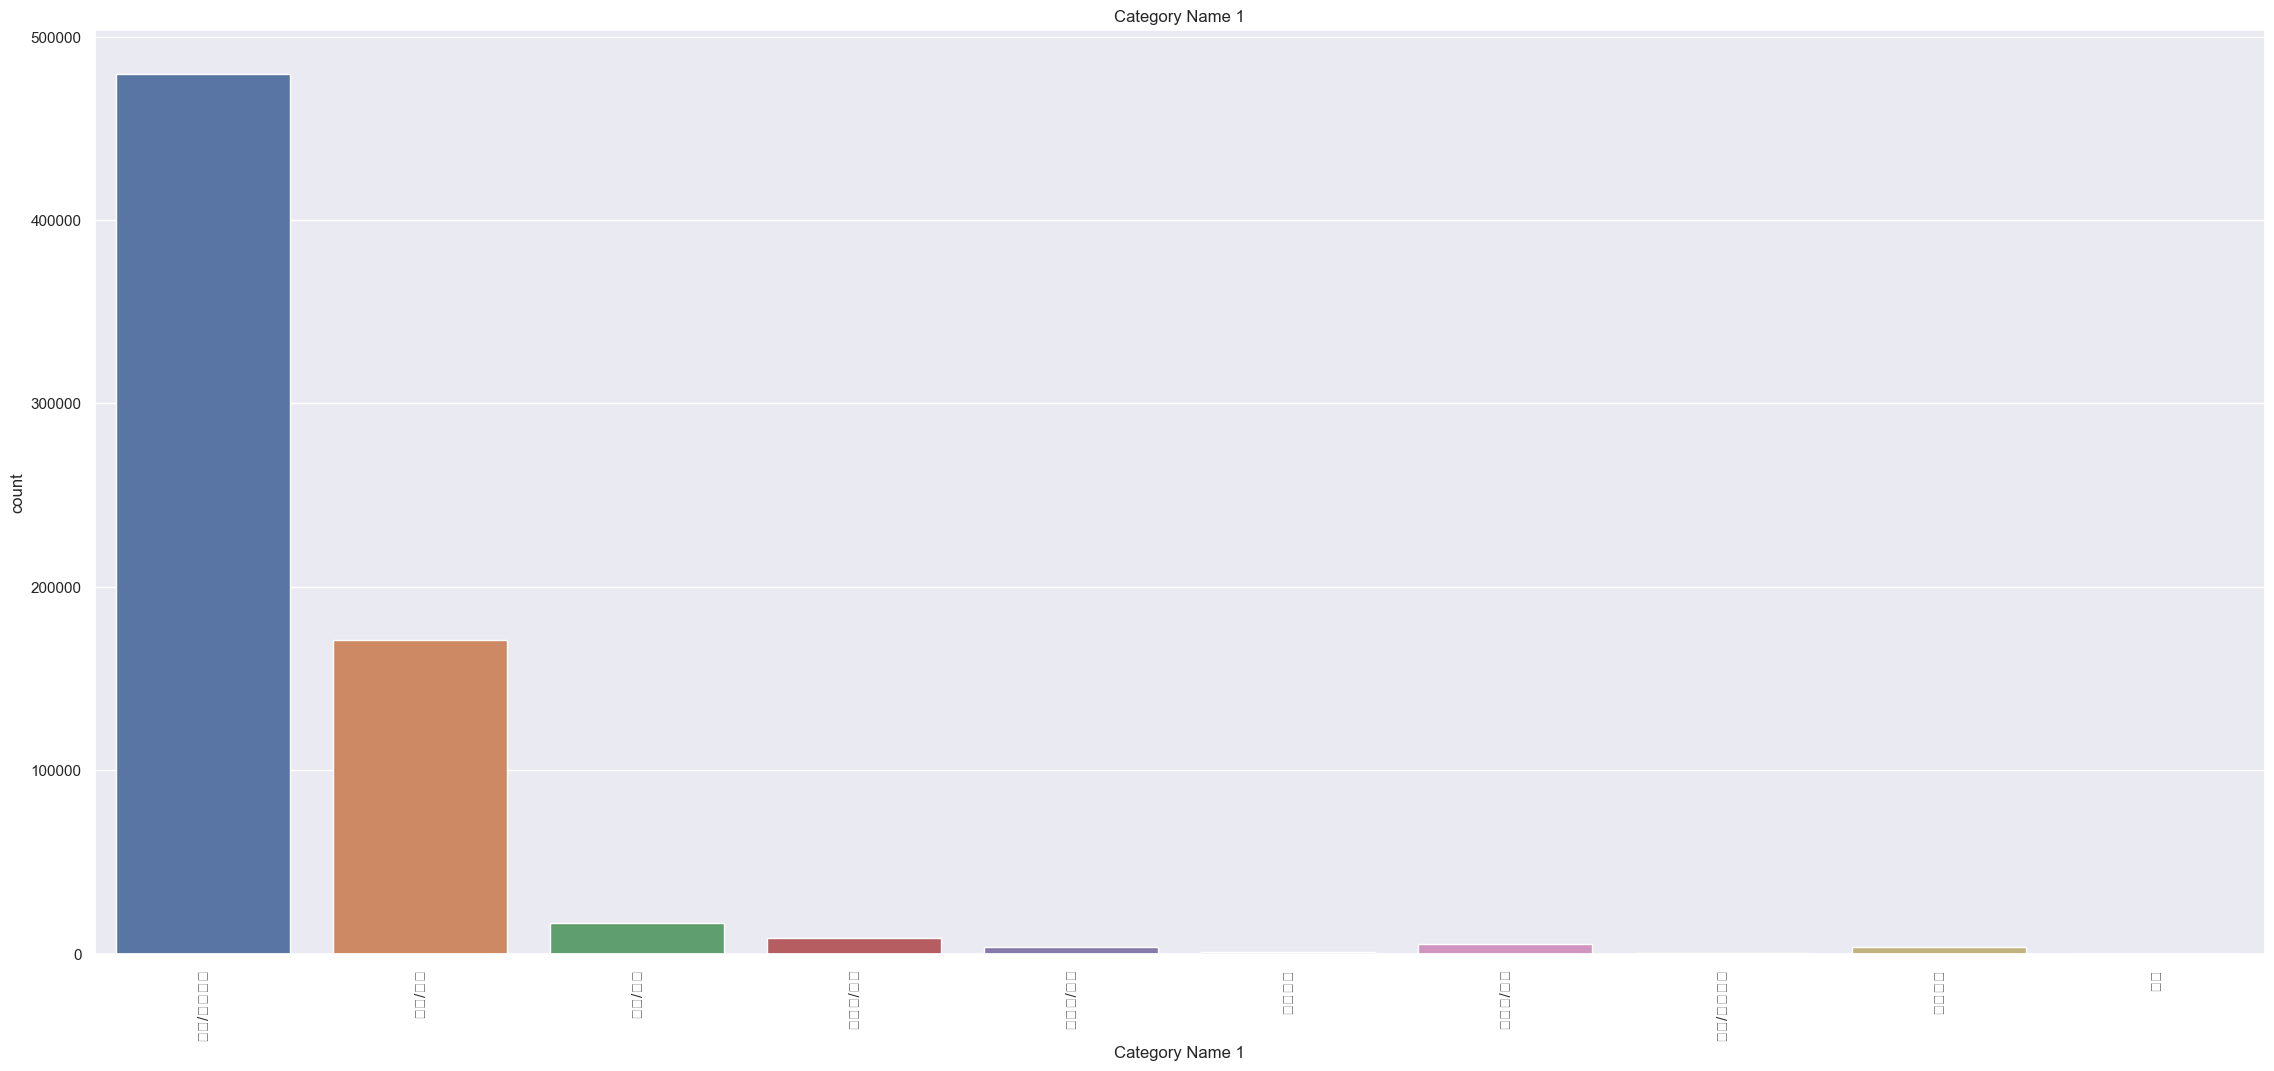

In [163]:
rank_Analysis(rank_down_7)

비용평균
197.78499433786084
--------------------------------------------------


코스트 썼을때 평균 순위 : 5.679798808393057
코스트 안 썼을때 평균 순위 : 8.780434871163534
--------------------------------------------------


광고숫자비율
3.965566909266703
--------------------------------------------------


배달비 없음 비율
65.05789620073773


배달비 있음 비율
34.94210379926226
--------------------------------------------------


상품가격 중간값
59900.0 원
--------------------------------------------------


카테고리1


가구/인테리어    0.715840
생활/건강      0.233250
출산/육아      0.020022
스포츠/레저     0.011914
화장품/미용     0.006022
패션잡화       0.005748
디지털/가전     0.004581
패션의류       0.001797
여가/생활편의    0.000659
식품         0.000166
Name: Category Name 1, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\s

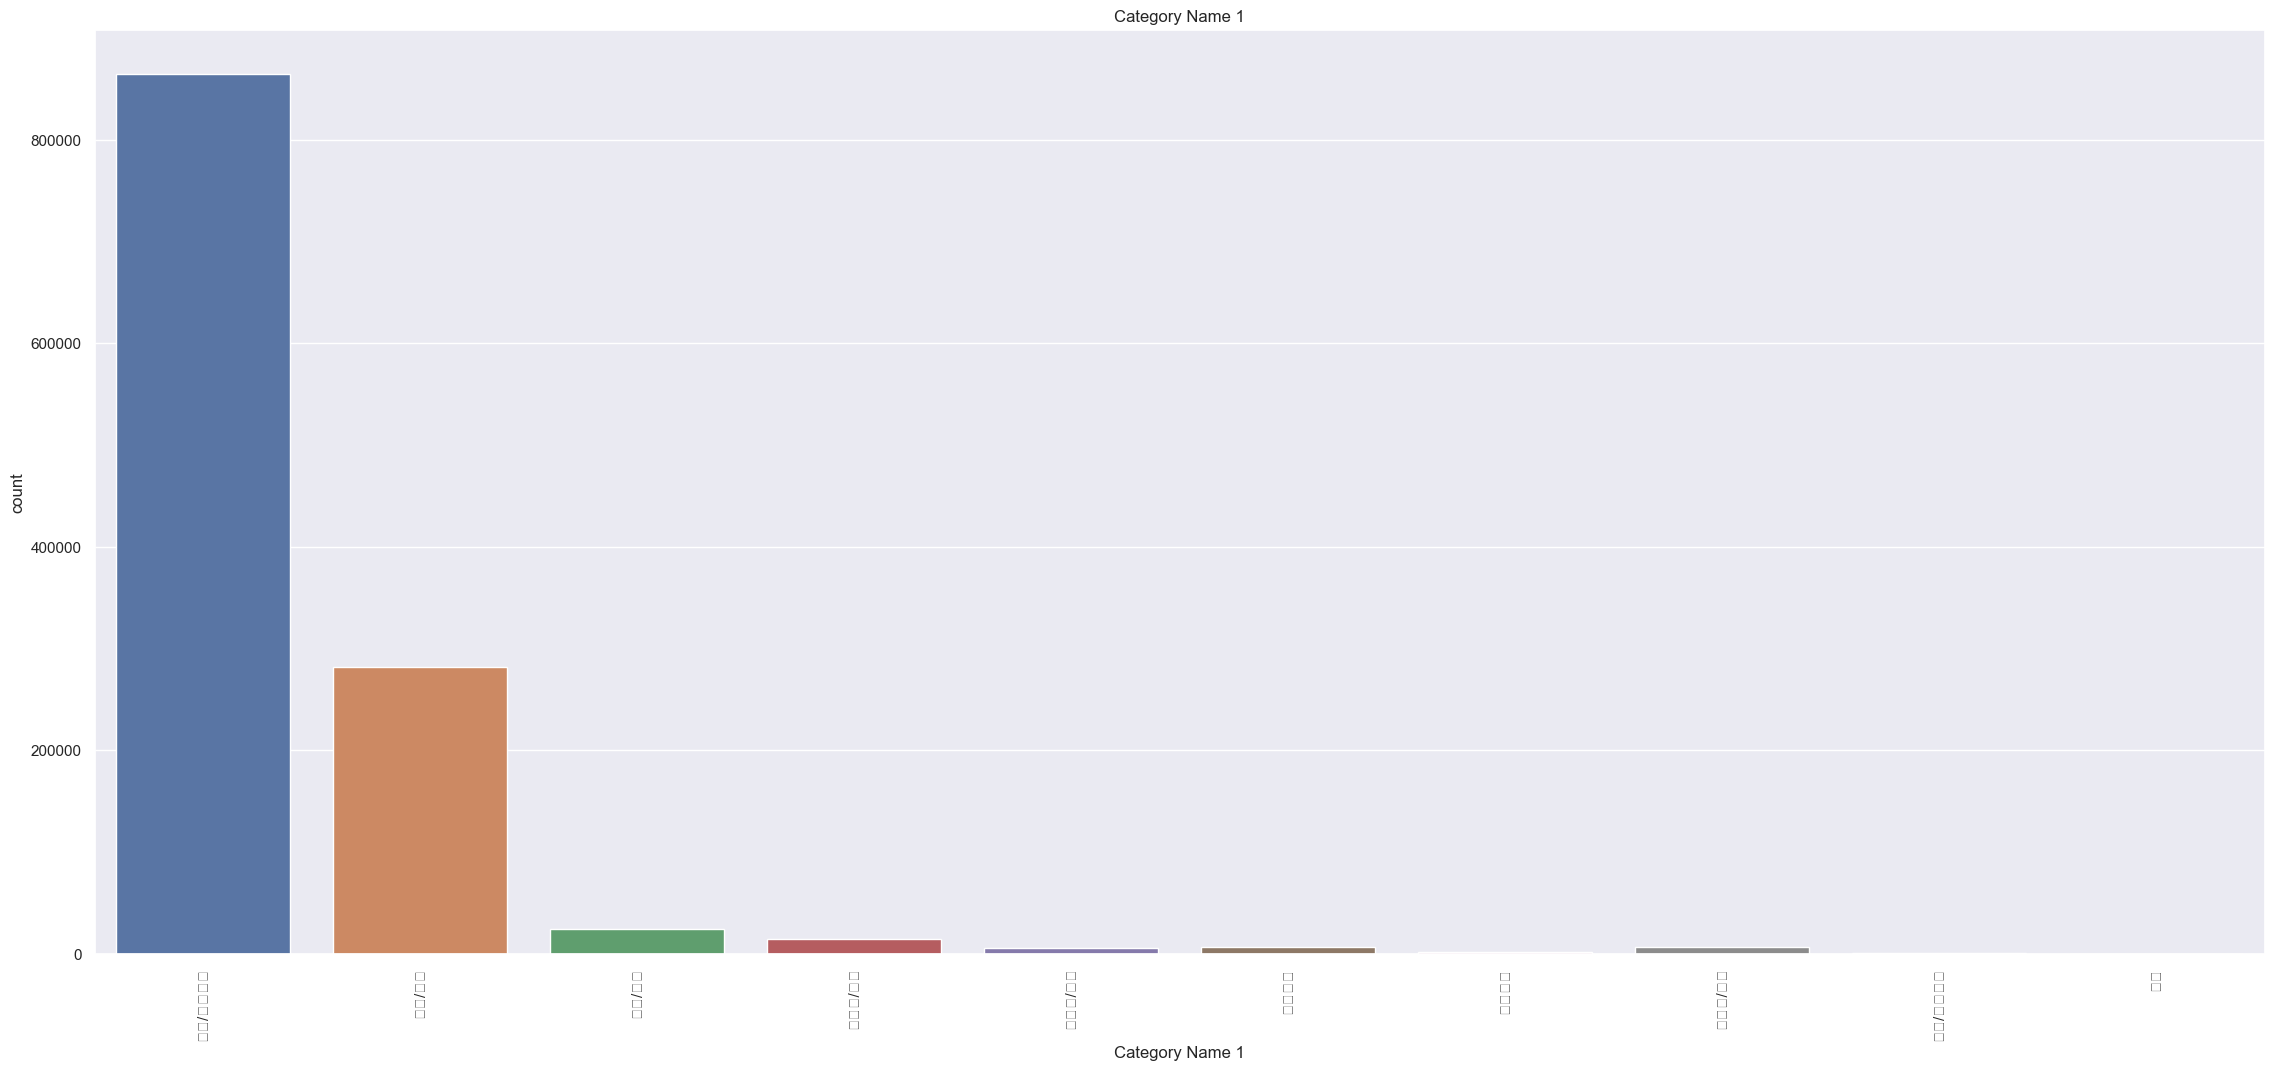

In [164]:
rank_Analysis(rank_down_26)

비용평균
13.74812277269517
--------------------------------------------------


코스트 썼을때 평균 순위 : 36.91611687087653
코스트 안 썼을때 평균 순위 : 45.574235252201355
--------------------------------------------------


광고숫자비율
18.159383701202238
--------------------------------------------------


배달비 없음 비율
58.151428316299615


배달비 있음 비율
41.84857168370039
--------------------------------------------------


상품가격 중간값
42800.0 원
--------------------------------------------------


카테고리1


가구/인테리어    0.723656
생활/건강      0.245456
스포츠/레저     0.012850
패션잡화       0.006851
출산/육아      0.006251
디지털/가전     0.001624
화장품/미용     0.001591
패션의류       0.001299
여가/생활편의    0.000341
식품         0.000081
Name: Category Name 1, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\s

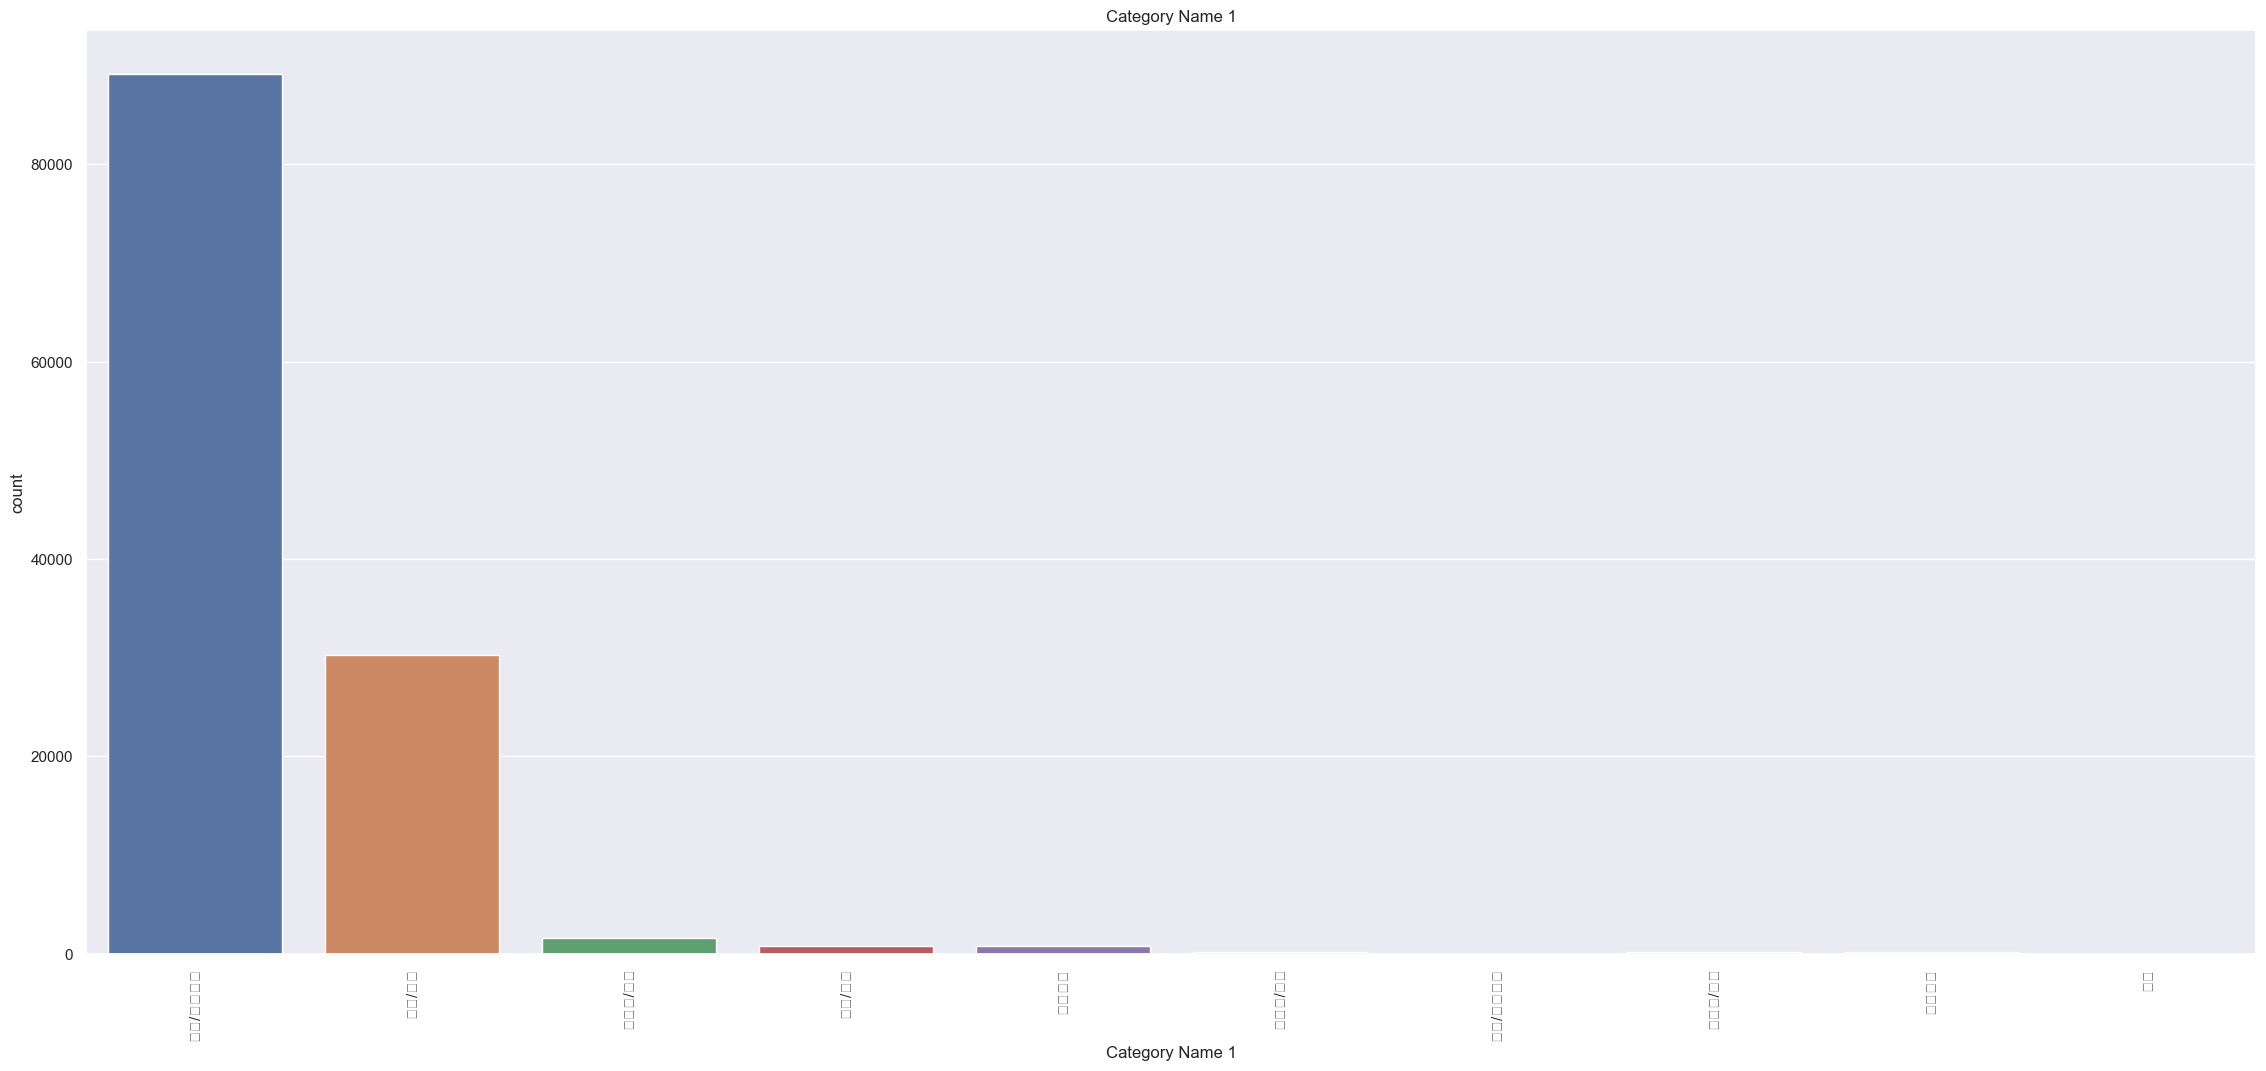

In [165]:
rank_Analysis(rank_up_26)

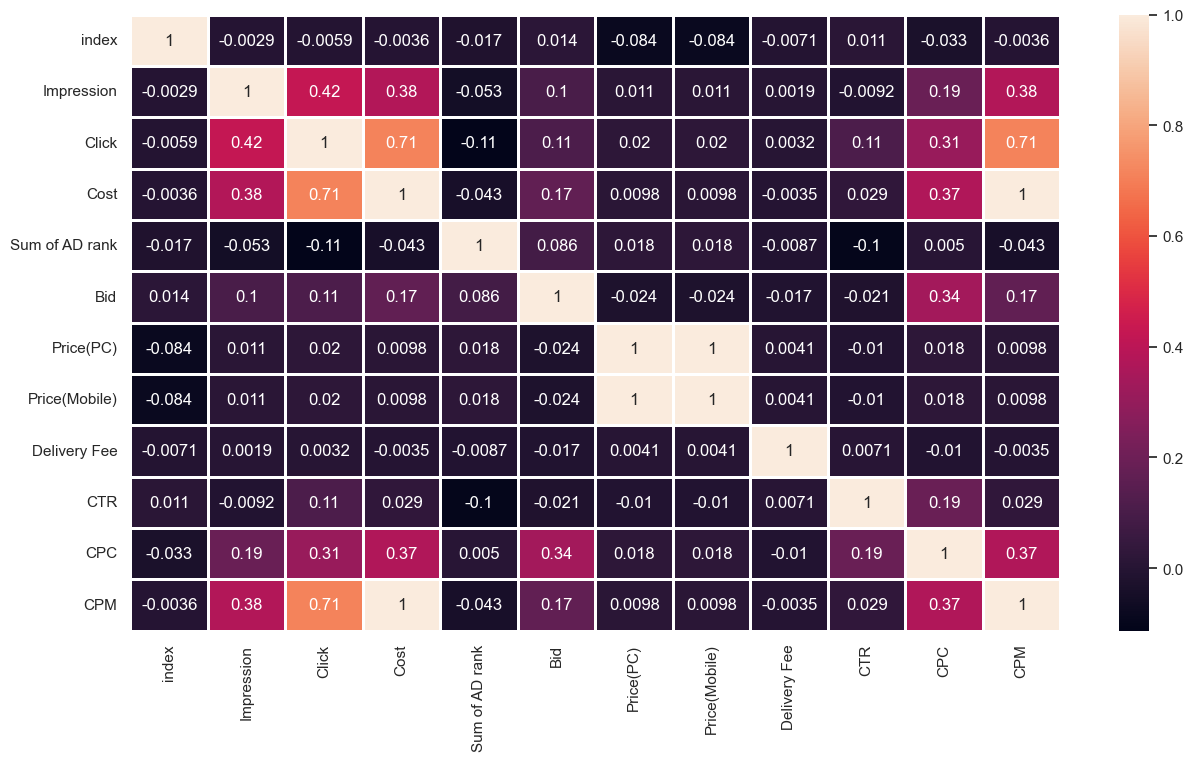

In [43]:
corr_heat(rank_down_7)

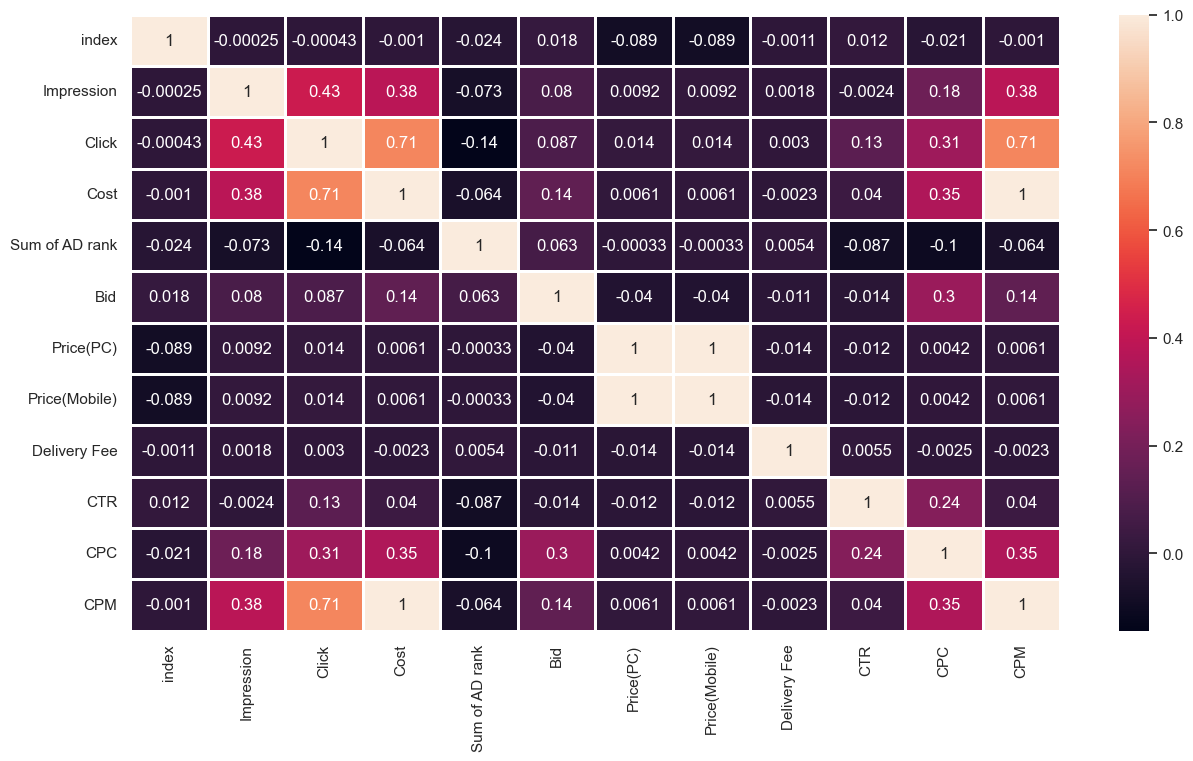

In [44]:
corr_heat(rank_down_26)

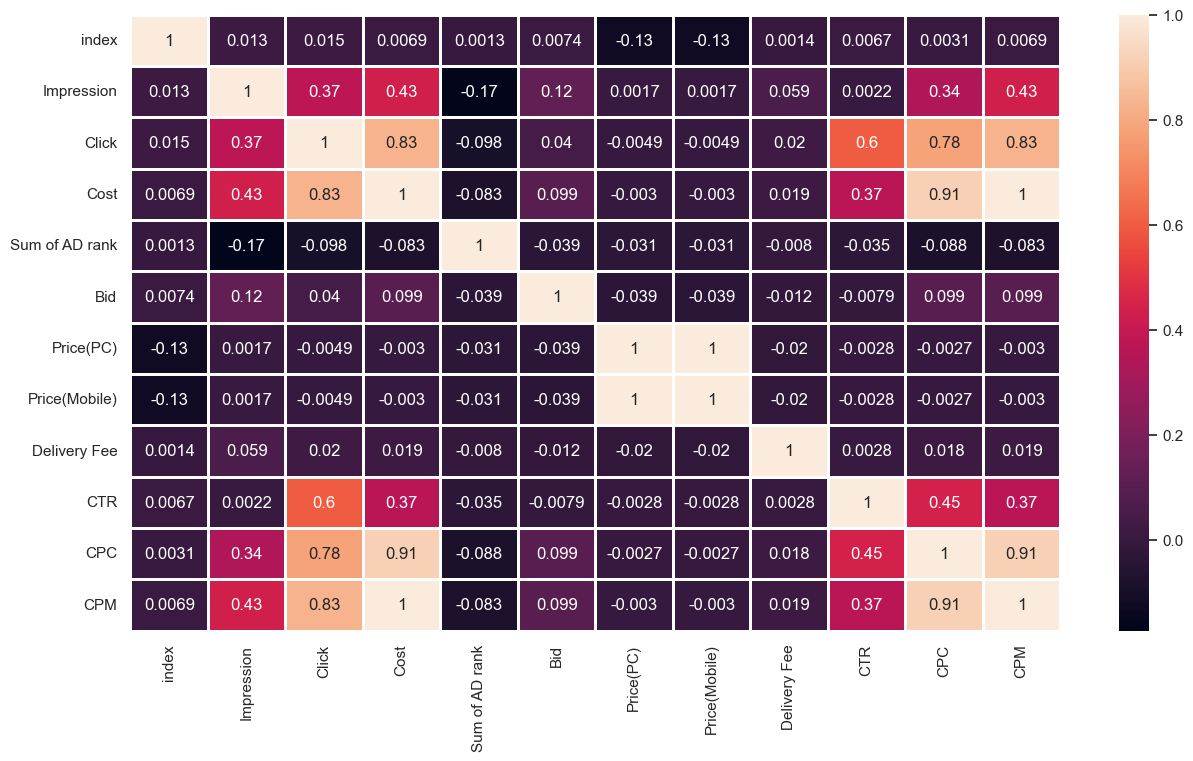

In [45]:
corr_heat(rank_up_26)

## 카테고리 1별 분석

In [168]:
bidding_drop_null['Category Name 1'].value_counts(normalize=True)

가구/인테리어    0.716563
생활/건강      0.234380
출산/육아      0.018748
스포츠/레저     0.012001
패션잡화       0.005850
화장품/미용     0.005612
디지털/가전     0.004307
패션의류       0.001751
여가/생활편의    0.000630
식품         0.000158
Name: Category Name 1, dtype: float64

In [47]:
cat_col = ['Click', 'Cost', 'Sum of AD rank', 'Impression']

In [48]:
cat_val = list(set(bidding_drop_null['Category Name 1'].values))
cat_val

['여가/생활편의',
 '디지털/가전',
 '스포츠/레저',
 '패션의류',
 '출산/육아',
 '식품',
 '패션잡화',
 '가구/인테리어',
 '생활/건강',
 '화장품/미용']

In [49]:
cat_val_1 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['식품'])]
cat_val_2 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['스포츠/레저'])]
cat_val_3 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['출산/육아'])]
cat_val_4 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['패션의류'])]
cat_val_5 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['생활/건강'])]
cat_val_6 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['디지털/가전'])]
cat_val_7 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['가구/인테리어'])]
cat_val_8 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['화장품/미용'])]
cat_val_9 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['패션잡화'])]
cat_val_10 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['여가/생활편의'])]

In [50]:
def cat_val(df):
    
    print(f'광고비율 : {(len(list(set(df["index"].values))) / len(df))*100}')
    print('-' * 50)
    cat_col = ['Click', 'Cost', 'Sum of AD rank', 'Impression']
    
    for col in cat_col:
        print(f'{col} 평균 : {df[col].mean()}')
        print('-' * 50)
        print(df[col].value_counts(normalize=True))
        print('-' * 50)
        plt.figure(figsize=(16, 6))
        plt.hist(df[col], bins=20)
        plt.title(col)
        plt.xticks(rotation=90)

광고비율 : 3.8095238095238098
--------------------------------------------------
Click 평균 : 0.11428571428571428
--------------------------------------------------
0    0.895238
1    0.100000
3    0.004762
Name: Click, dtype: float64
--------------------------------------------------
Cost 평균 : 9.428571428571429
--------------------------------------------------
0.0      0.895238
50.0     0.076190
210.0    0.009524
150.0    0.004762
180.0    0.004762
100.0    0.004762
330.0    0.004762
Name: Cost, dtype: float64
--------------------------------------------------
Sum of AD rank 평균 : 10.471428571428572
--------------------------------------------------
9.0     0.114286
8.0     0.100000
10.0    0.095238
3.0     0.085714
7.0     0.080952
12.0    0.066667
2.0     0.052381
4.0     0.047619
6.0     0.047619
13.0    0.042857
11.0    0.038095
5.0     0.038095
14.0    0.023810
17.0    0.023810
18.0    0.014286
26.0    0.014286
16.0    0.014286
30.0    0.009524
22.0    0.009524
24.0    0.009524
15.0   

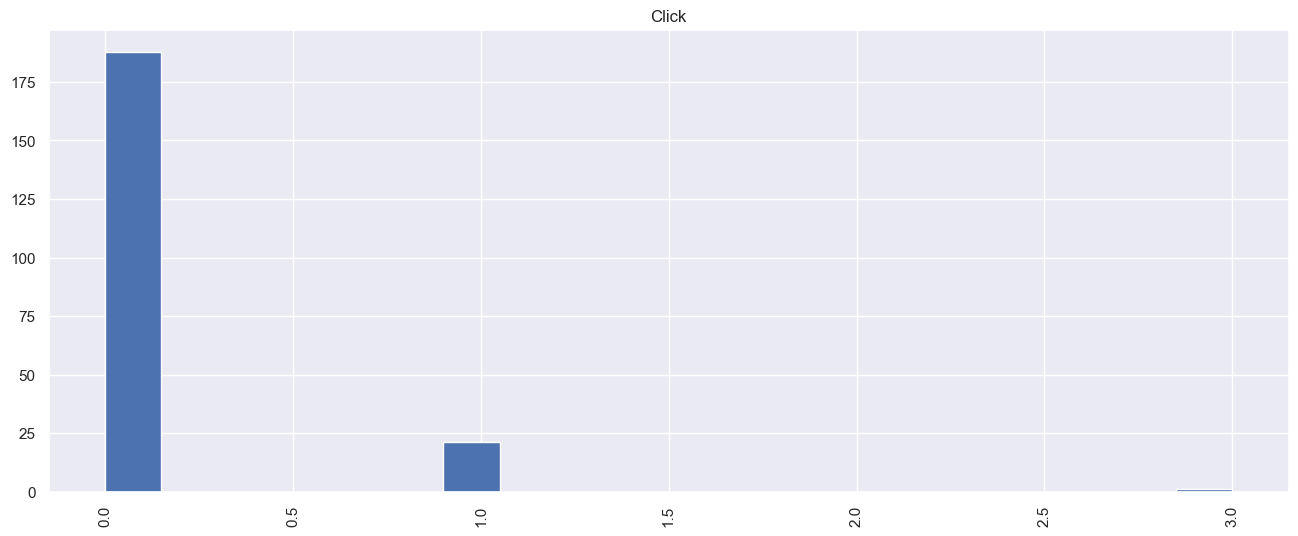

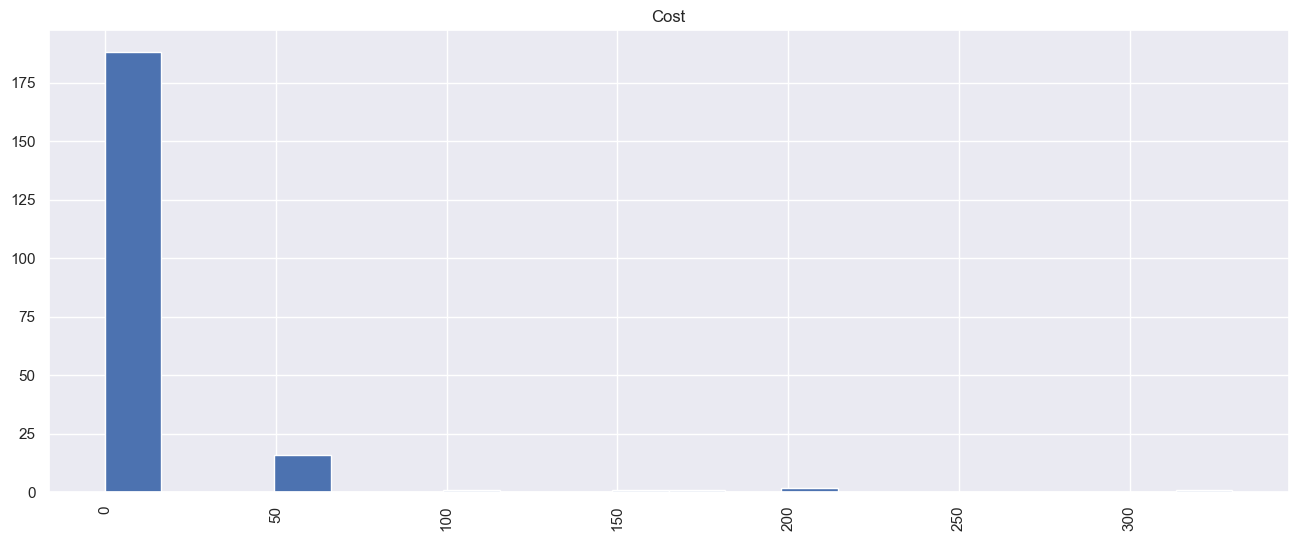

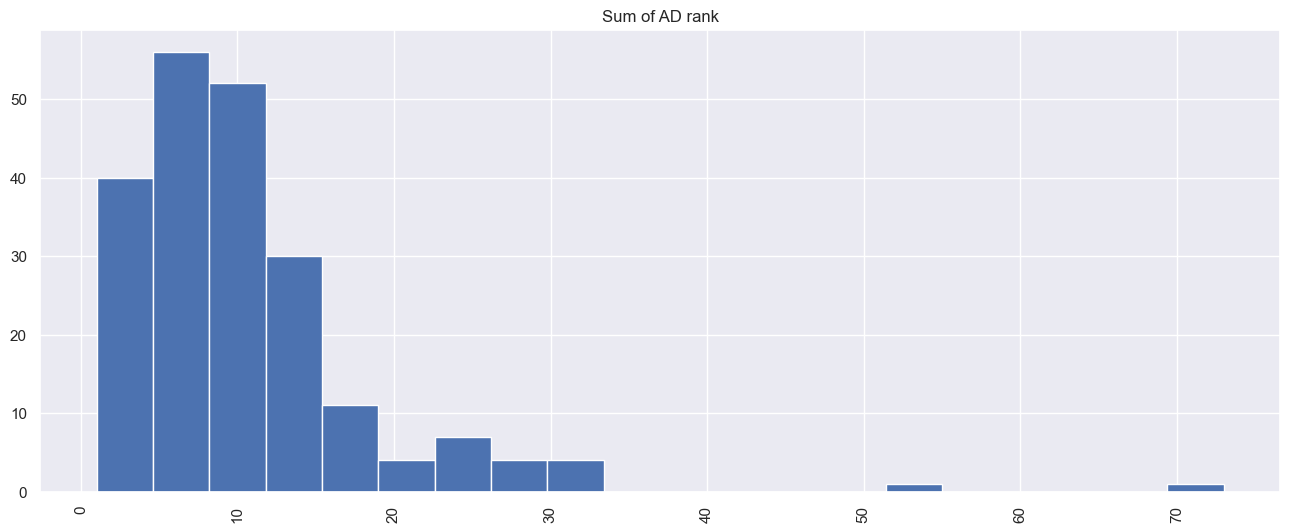

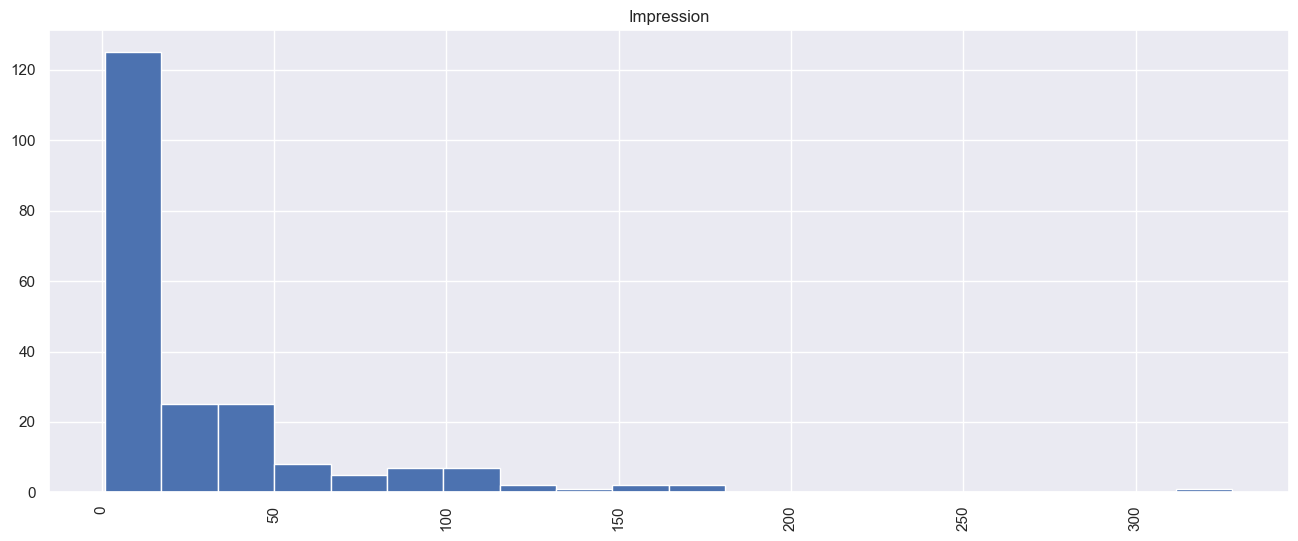

In [51]:
cat_val(cat_val_1)

광고비율 : 3.5302954431647473
--------------------------------------------------
Click 평균 : 1.2496244366549825
--------------------------------------------------
0      0.670255
1      0.158112
2      0.064847
3      0.034051
4      0.021282
         ...   
150    0.000063
61     0.000063
45     0.000063
58     0.000063
59     0.000063
Name: Click, Length: 75, dtype: float64
--------------------------------------------------
Cost 평균 : 195.1583625438157
--------------------------------------------------
0.0        0.670255
50.0       0.086755
100.0      0.034301
150.0      0.016838
200.0      0.012644
             ...   
15370.0    0.000063
7520.0     0.000063
5130.0     0.000063
3030.0     0.000063
15800.0    0.000063
Name: Cost, Length: 384, dtype: float64
--------------------------------------------------
Sum of AD rank 평균 : 11.489672008012018
--------------------------------------------------
2.0     0.107974
4.0     0.084627
3.0     0.080809
5.0     0.071795
6.0     0.069604
          

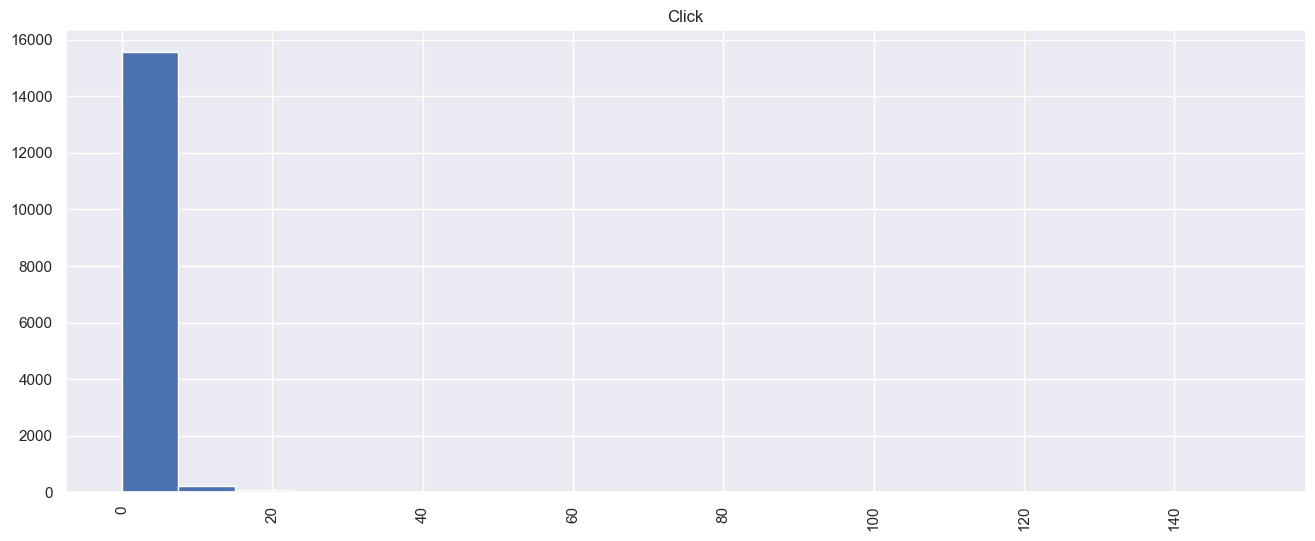

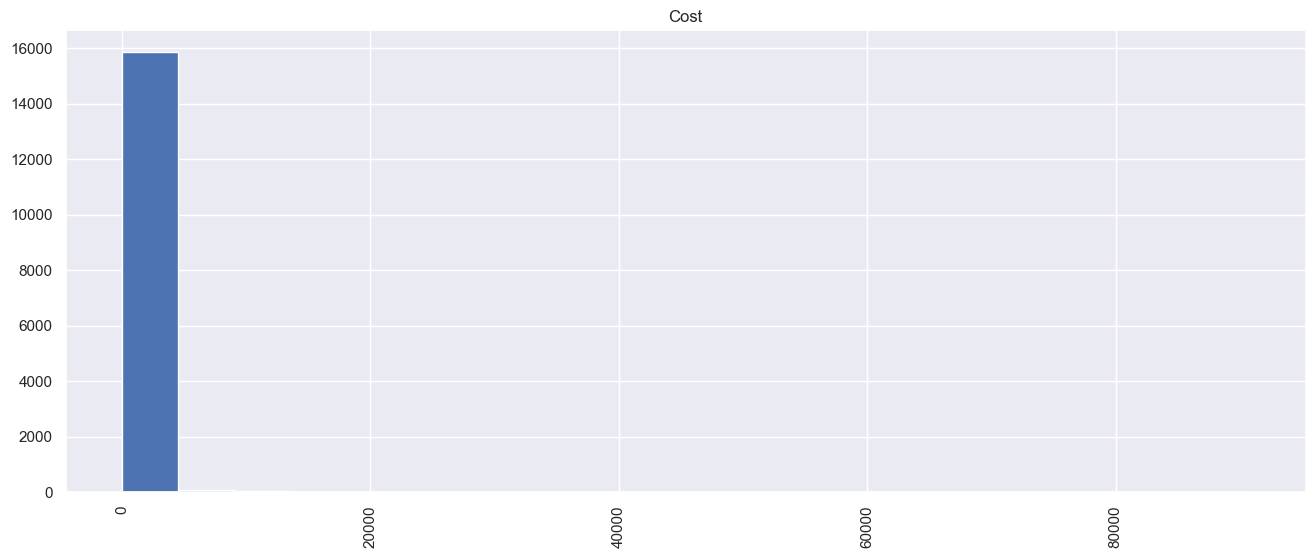

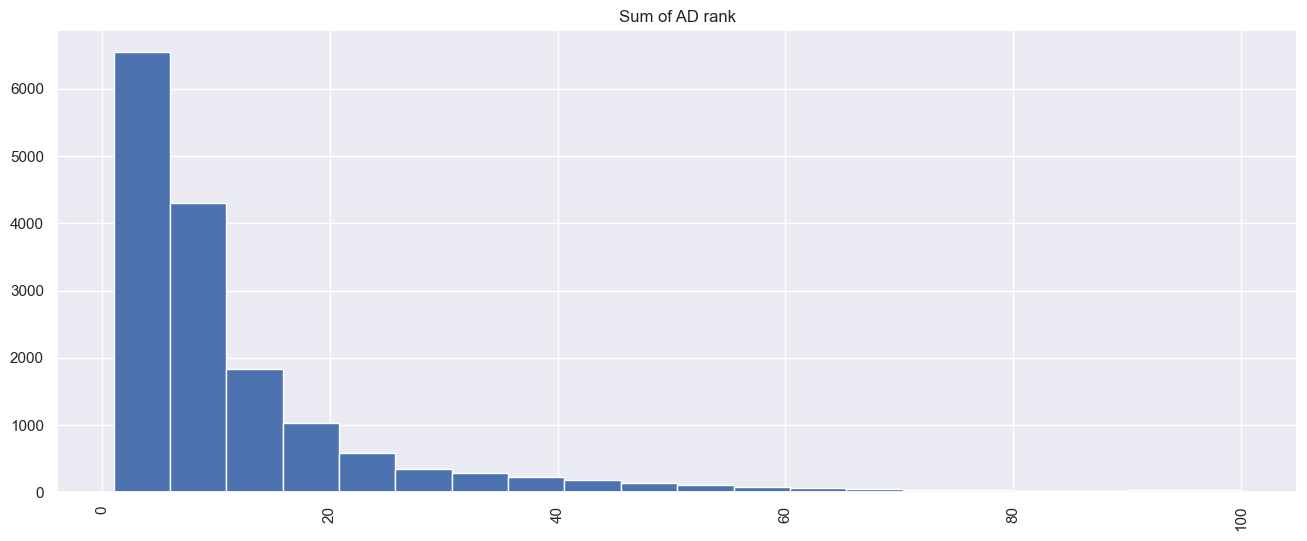

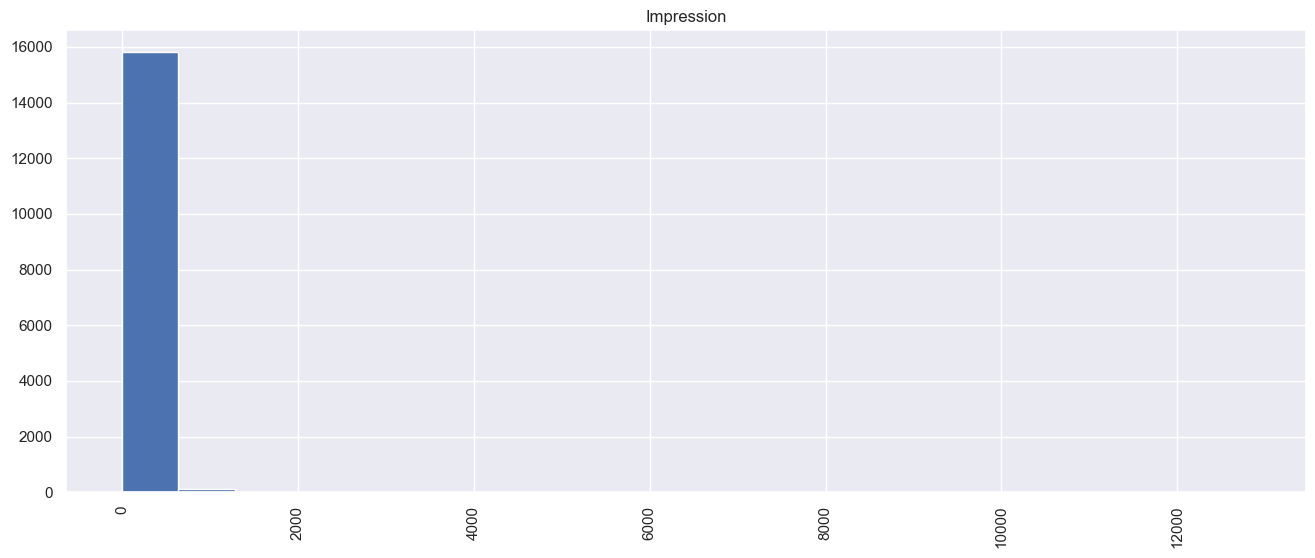

In [52]:
cat_val(cat_val_2)

광고비율 : 3.73041631606363
--------------------------------------------------
Click 평균 : 2.120126617782586
--------------------------------------------------
0      0.578876
1      0.170253
2      0.078936
3      0.039989
4      0.026606
         ...   
144    0.000040
68     0.000040
94     0.000040
73     0.000040
71     0.000040
Name: Click, Length: 94, dtype: float64
--------------------------------------------------
Cost 평균 : 293.0640702007453
--------------------------------------------------
0.0        0.578876
50.0       0.106383
100.0      0.049124
150.0      0.026165
200.0      0.018071
             ...   
4510.0     0.000040
5860.0     0.000040
12440.0    0.000040
3220.0     0.000040
2590.0     0.000040
Name: Cost, Length: 538, dtype: float64
--------------------------------------------------
Sum of AD rank 평균 : 7.401570701606763
--------------------------------------------------
2.0     0.150299
3.0     0.120367
4.0     0.111592
5.0     0.086749
6.0     0.083984
          ... 

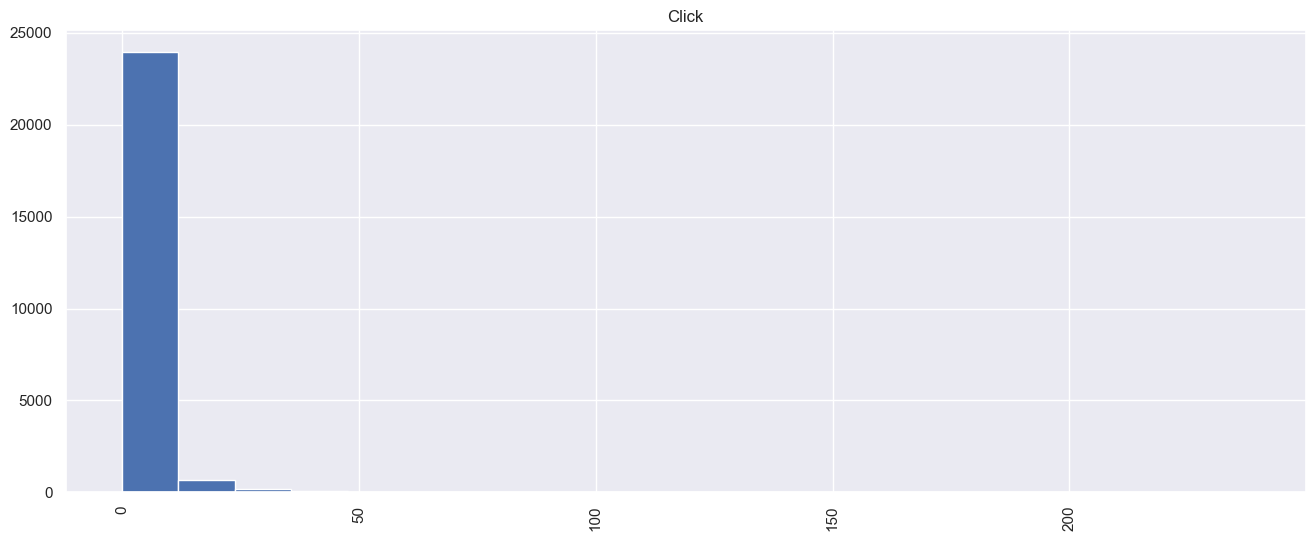

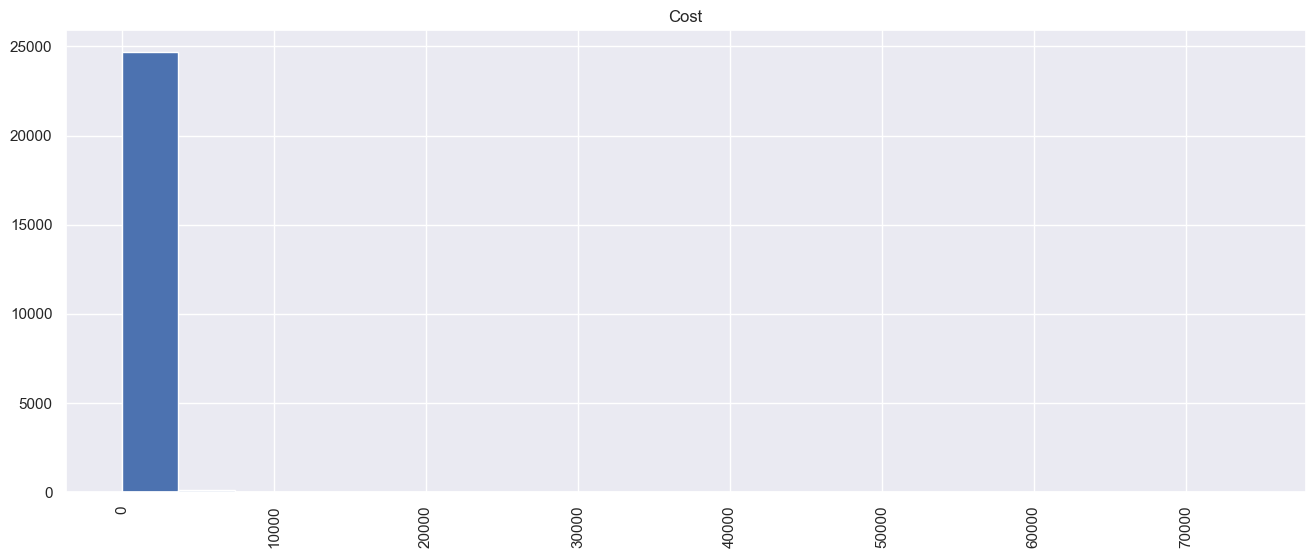

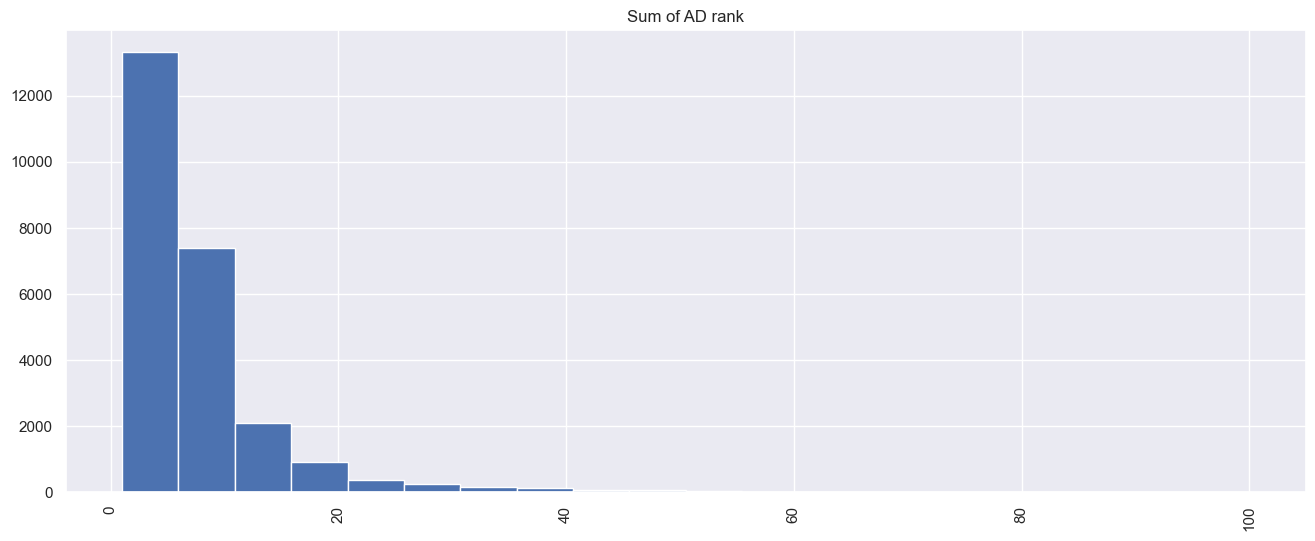

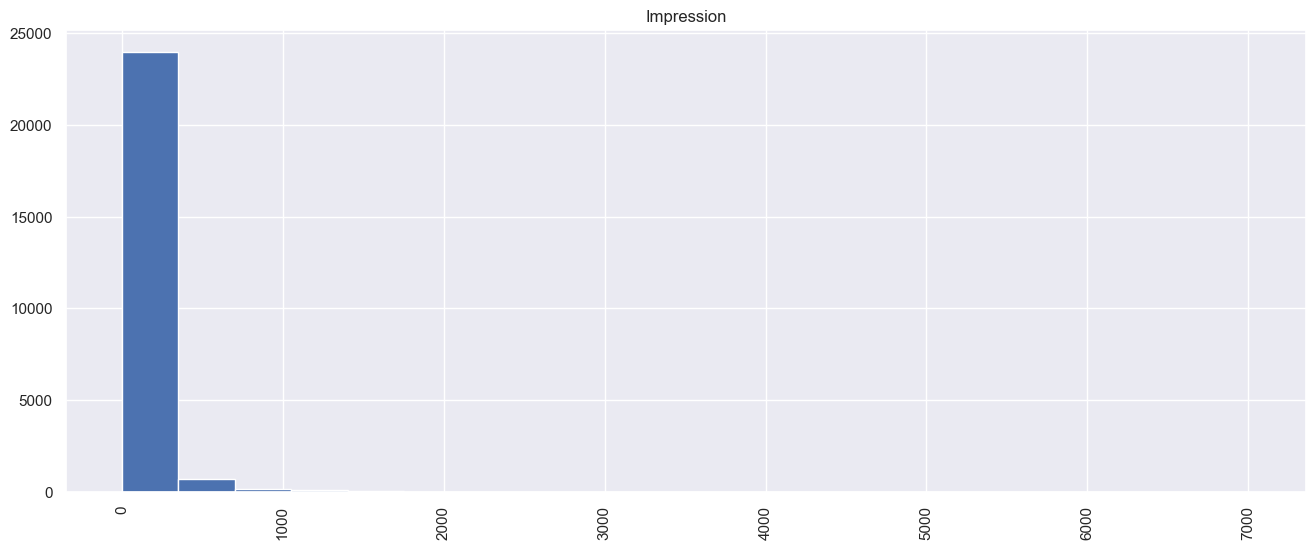

In [53]:
cat_val(cat_val_3)

광고비율 : 5.105105105105105
--------------------------------------------------
Click 평균 : 1.0574860574860574
--------------------------------------------------
0     0.734878
1     0.139425
2     0.043758
3     0.018018
5     0.014586
6     0.010296
4     0.008580
7     0.004290
8     0.003432
11    0.002145
15    0.001716
17    0.001716
10    0.001716
18    0.001287
30    0.001287
9     0.001287
12    0.001287
16    0.000858
22    0.000858
71    0.000429
75    0.000429
33    0.000429
27    0.000429
28    0.000429
25    0.000429
69    0.000429
38    0.000429
36    0.000429
44    0.000429
58    0.000429
31    0.000429
42    0.000429
20    0.000429
13    0.000429
65    0.000429
14    0.000429
21    0.000429
19    0.000429
47    0.000429
Name: Click, dtype: float64
--------------------------------------------------
Cost 평균 : 347.4517374517375
--------------------------------------------------
0.0        0.734878
50.0       0.024024
500.0      0.010296
270.0      0.009438
100.0      0.008580


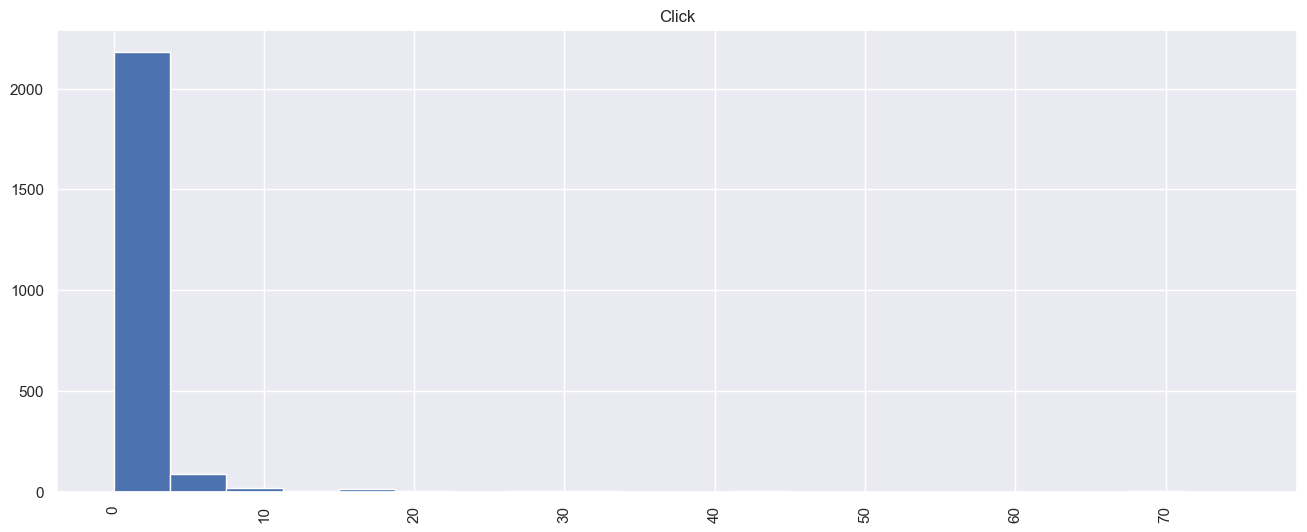

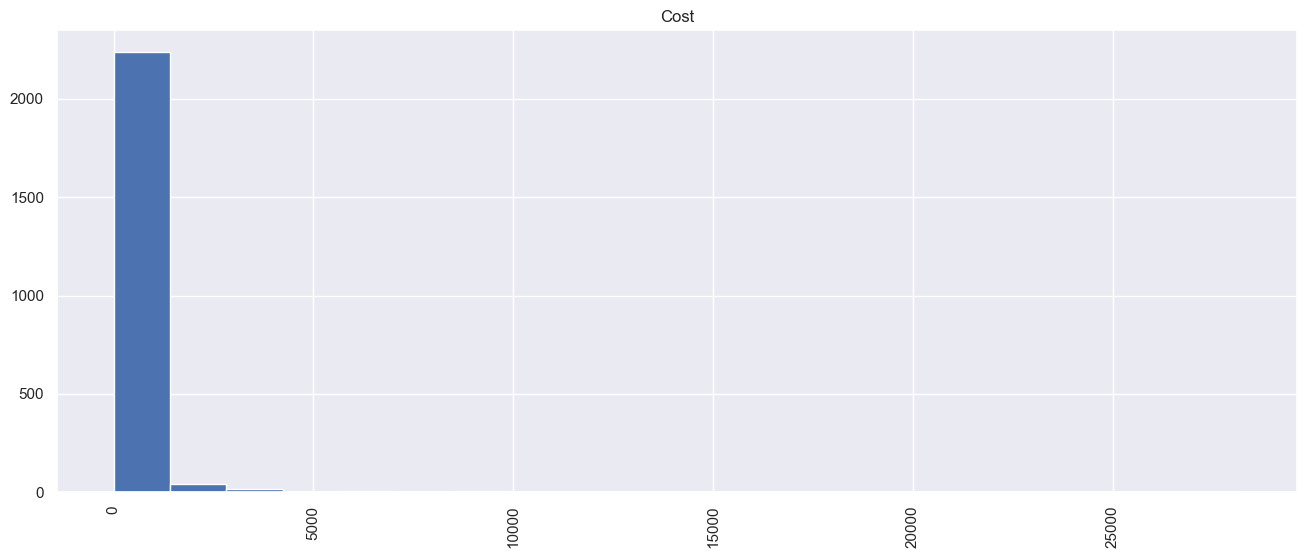

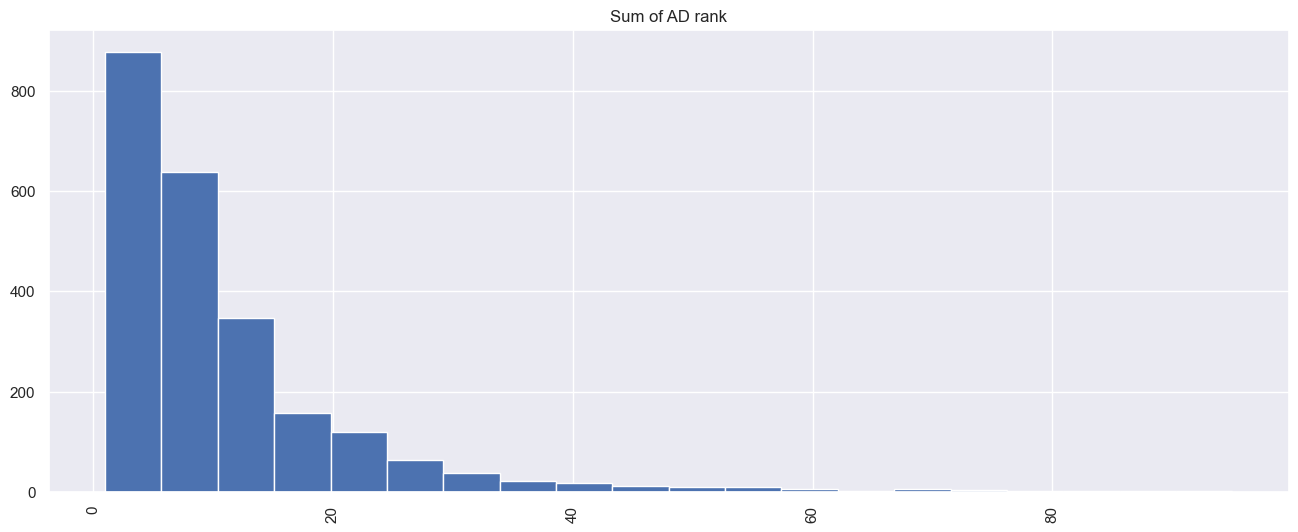

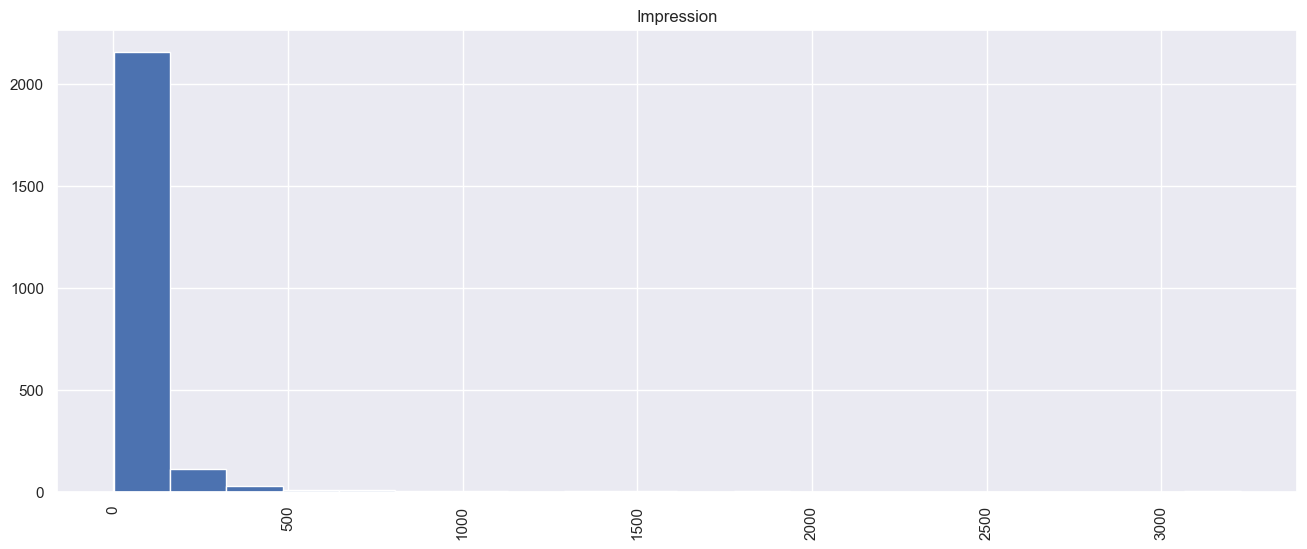

In [54]:
cat_val(cat_val_4)

광고비율 : 3.749891830043364
--------------------------------------------------
Click 평균 : 0.8705069405049213
--------------------------------------------------
0      0.729517
1      0.140047
2      0.051585
3      0.025054
4      0.014099
         ...   
156    0.000003
152    0.000003
115    0.000003
121    0.000003
455    0.000003
Name: Click, Length: 151, dtype: float64
--------------------------------------------------
Cost 평균 : 201.73228977369243
--------------------------------------------------
0.0         0.729517
50.0        0.057021
100.0       0.021015
150.0       0.011131
200.0       0.008439
              ...   
8190.0      0.000003
224730.0    0.000003
15620.0     0.000003
15290.0     0.000003
9060.0      0.000003
Name: Cost, Length: 1428, dtype: float64
--------------------------------------------------
Sum of AD rank 평균 : 11.249153069302489
--------------------------------------------------
2.0      0.108837
4.0      0.087594
3.0      0.082536
5.0      0.073123
6.0      0

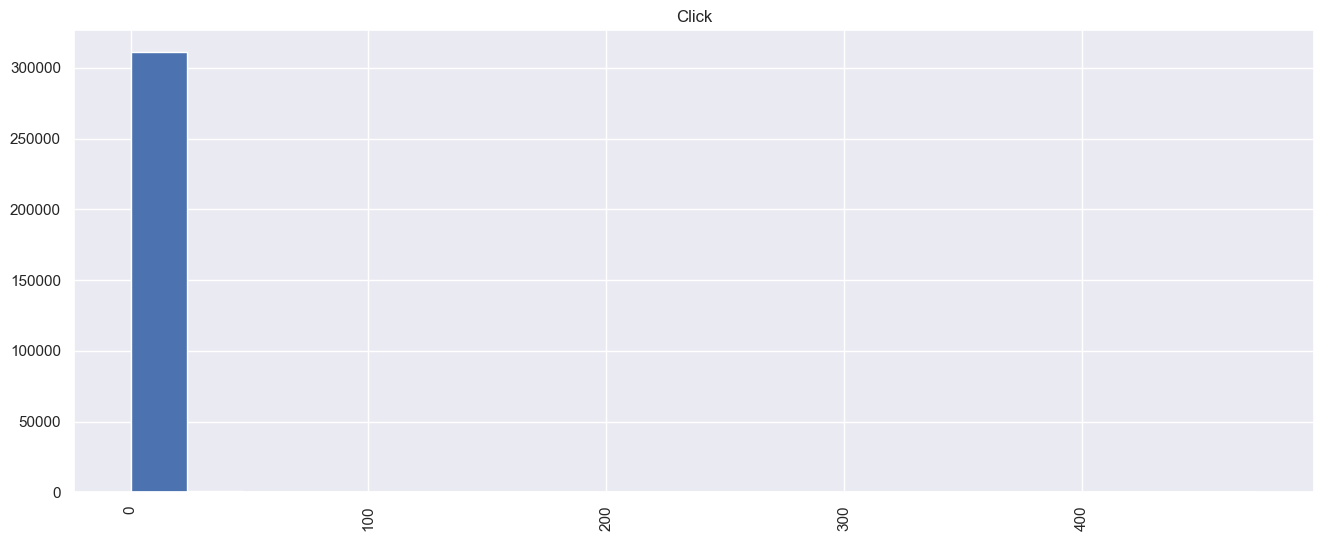

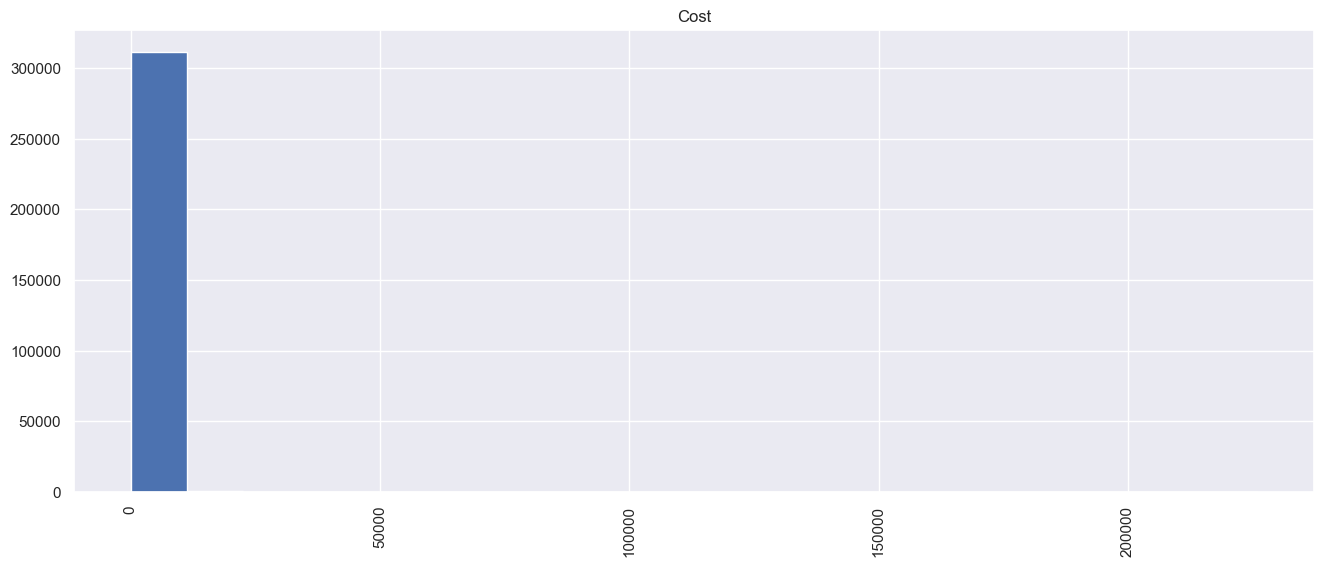

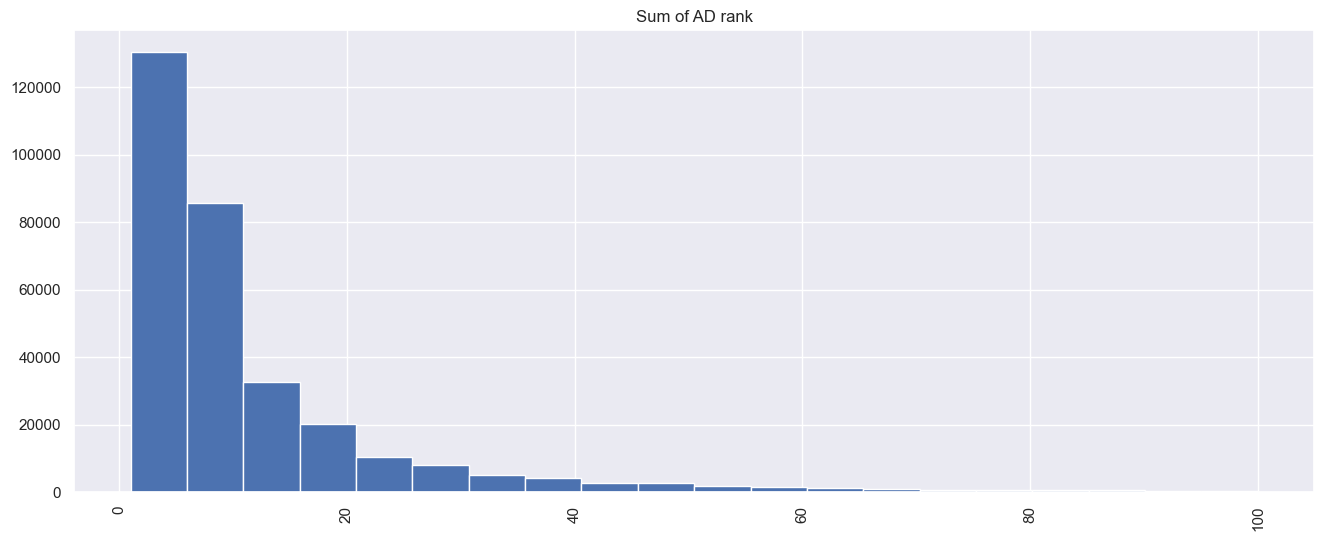

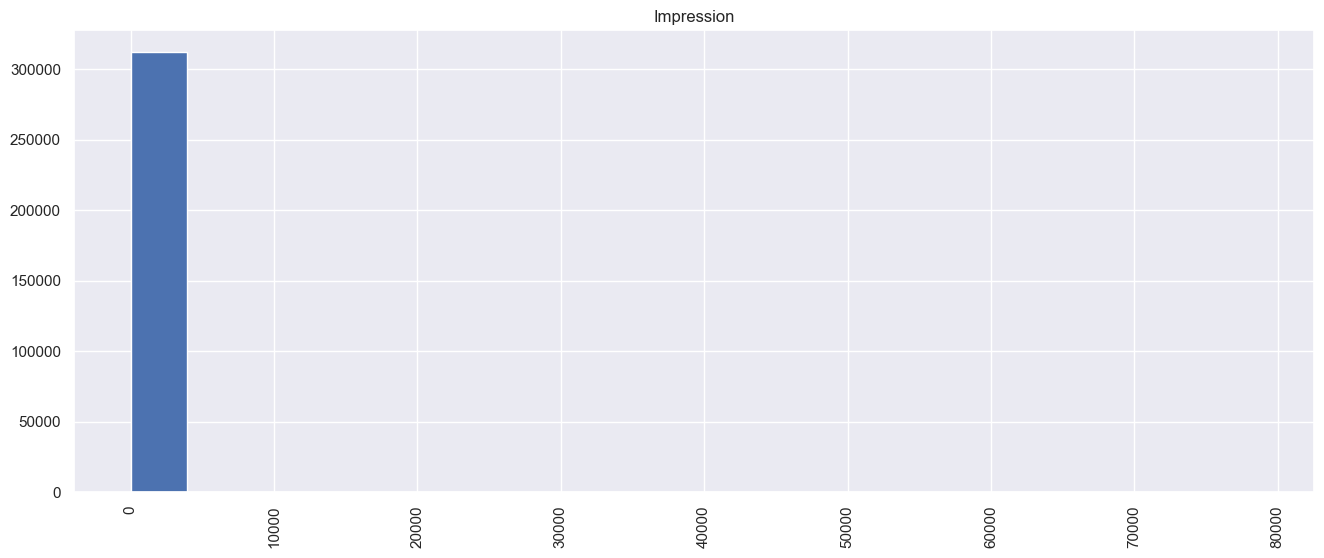

In [55]:
cat_val(cat_val_5)

광고비율 : 3.2089291942797344
--------------------------------------------------
Click 평균 : 1.8022322985699337
--------------------------------------------------
0     0.614754
1     0.155215
2     0.067841
3     0.034531
4     0.025113
5     0.020056
6     0.012208
7     0.010638
8     0.007150
9     0.005581
10    0.005406
11    0.004186
12    0.003488
16    0.003488
14    0.002790
17    0.002267
23    0.002093
19    0.002093
21    0.001918
22    0.001918
24    0.001570
13    0.001570
15    0.001570
20    0.001570
18    0.001221
26    0.001221
28    0.001221
27    0.001221
33    0.000698
34    0.000523
29    0.000523
25    0.000523
32    0.000523
69    0.000349
51    0.000349
76    0.000349
62    0.000349
60    0.000349
30    0.000174
37    0.000174
41    0.000174
75    0.000174
36    0.000174
63    0.000174
42    0.000174
66    0.000174
43    0.000174
Name: Click, dtype: float64
--------------------------------------------------
Cost 평균 : 224.66515521450995
-----------------------------

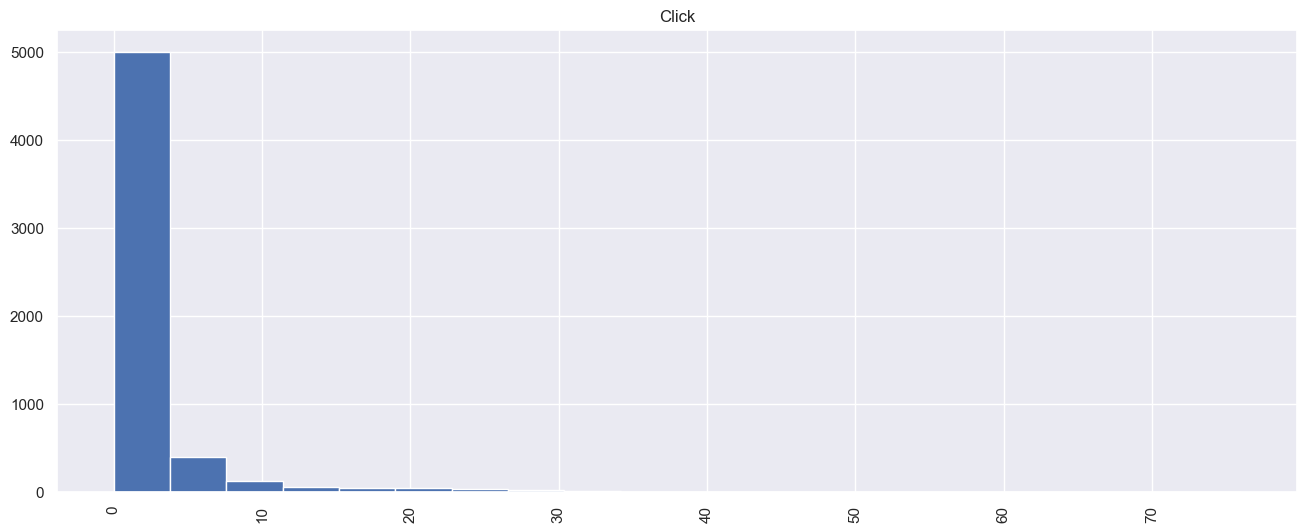

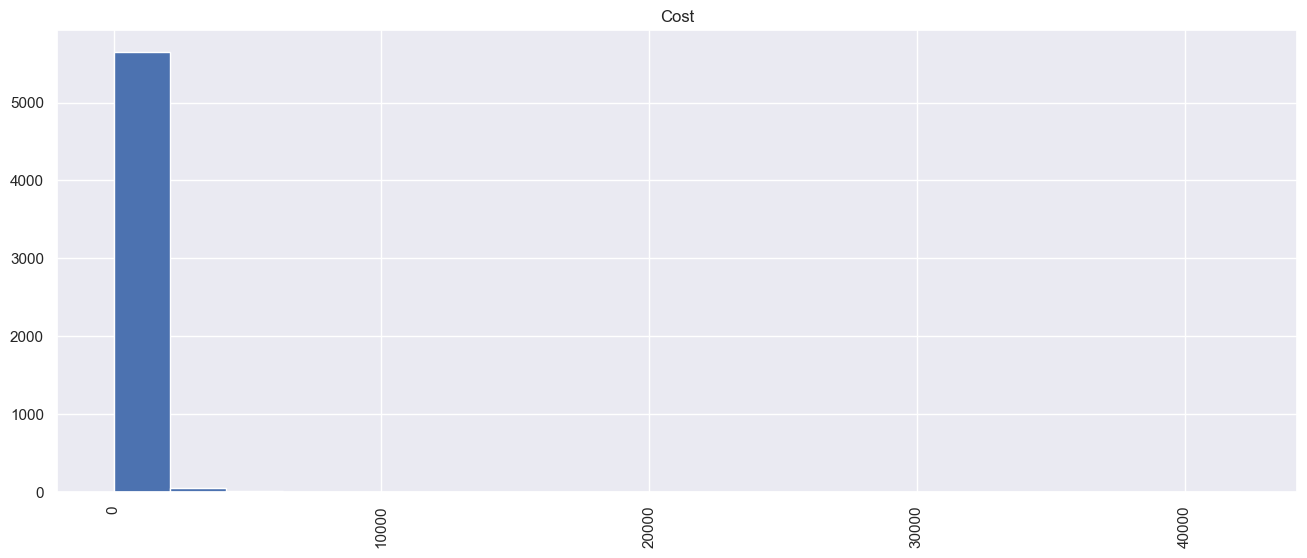

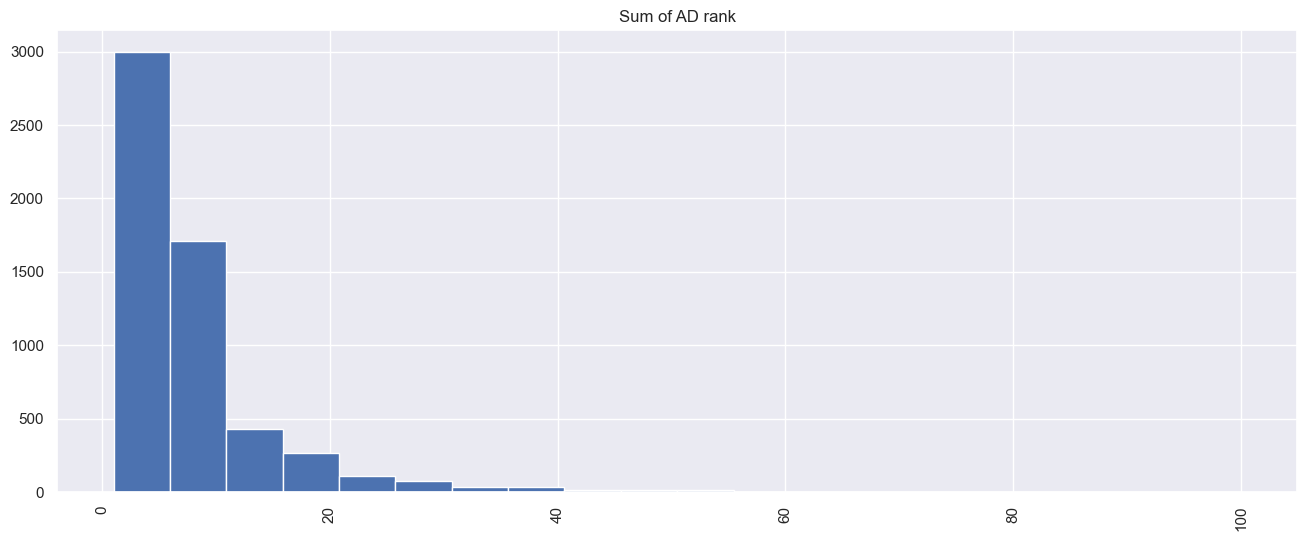

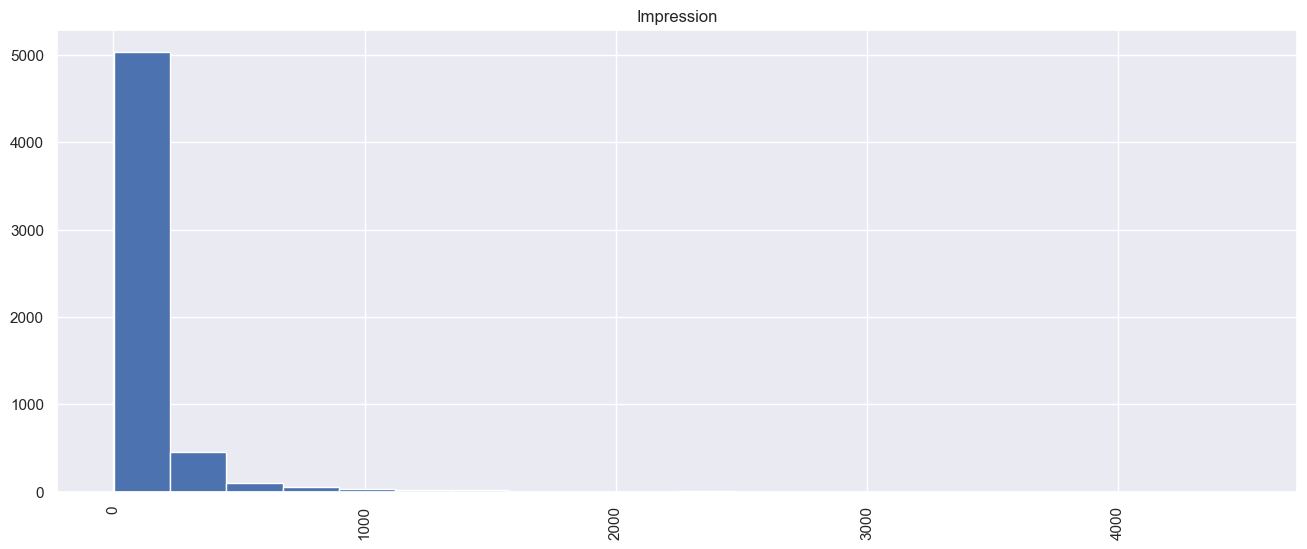

In [56]:
cat_val(cat_val_6)

광고비율 : 3.608356038440209
--------------------------------------------------
Click 평균 : 0.6170970241021829
--------------------------------------------------
0      0.767316
1      0.132308
2      0.042729
3      0.019553
4      0.010861
         ...   
120    0.000001
135    0.000001
87     0.000001
175    0.000001
162    0.000001
Name: Click, Length: 139, dtype: float64
--------------------------------------------------
Cost 평균 : 169.478654403987
--------------------------------------------------
0.0        0.767316
50.0       0.044625
100.0      0.014324
150.0      0.007678
200.0      0.005622
             ...   
59240.0    0.000001
20440.0    0.000001
20470.0    0.000001
66500.0    0.000001
9740.0     0.000001
Name: Cost, Length: 1957, dtype: float64
--------------------------------------------------
Sum of AD rank 평균 : 11.599969388728553
--------------------------------------------------
2.0      0.095178
4.0      0.082209
3.0      0.076675
6.0      0.072445
5.0      0.070563
     

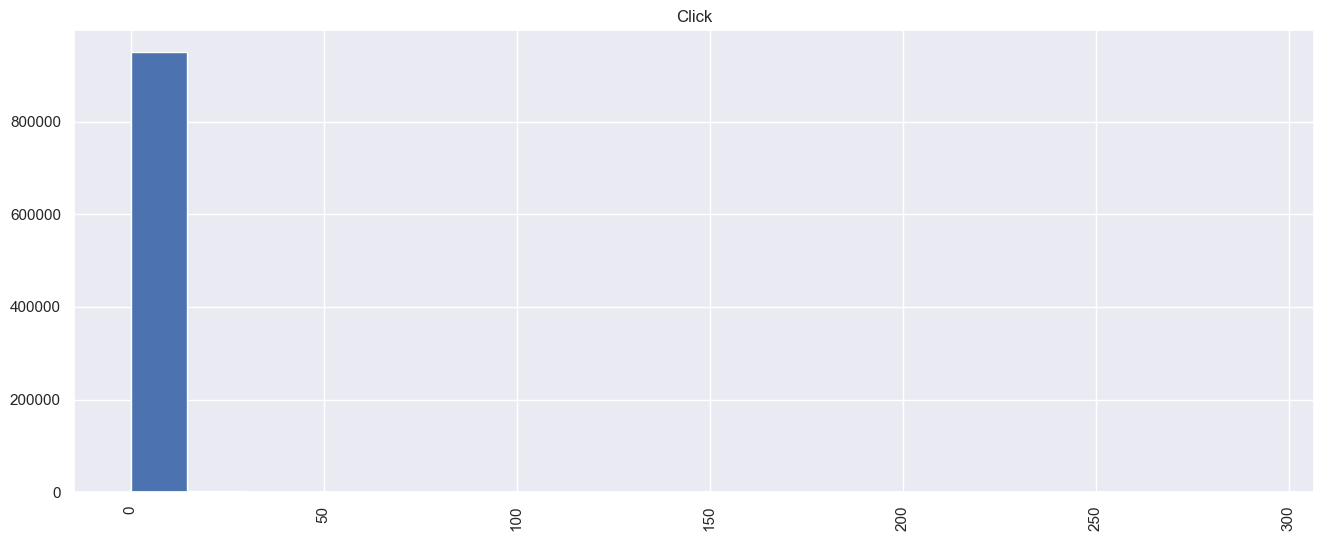

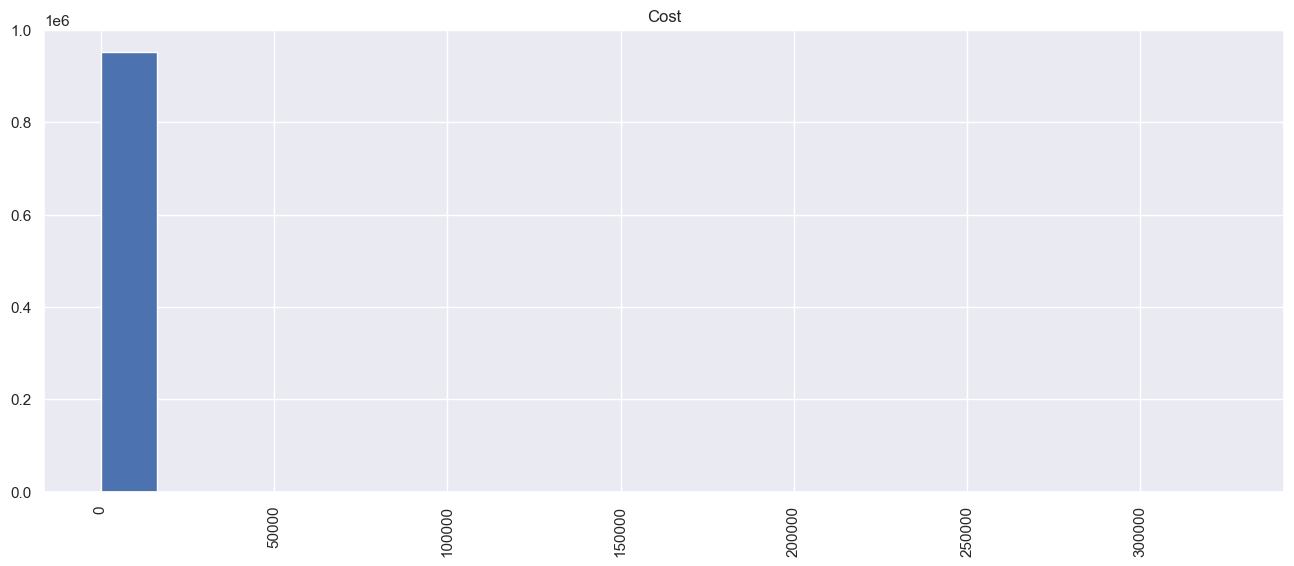

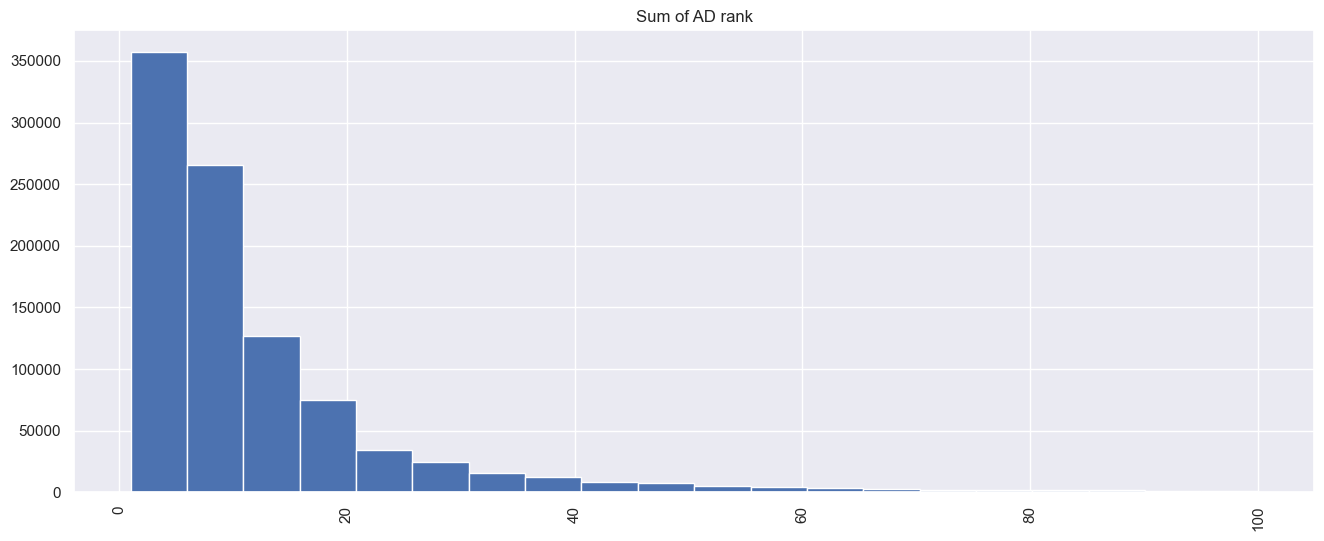

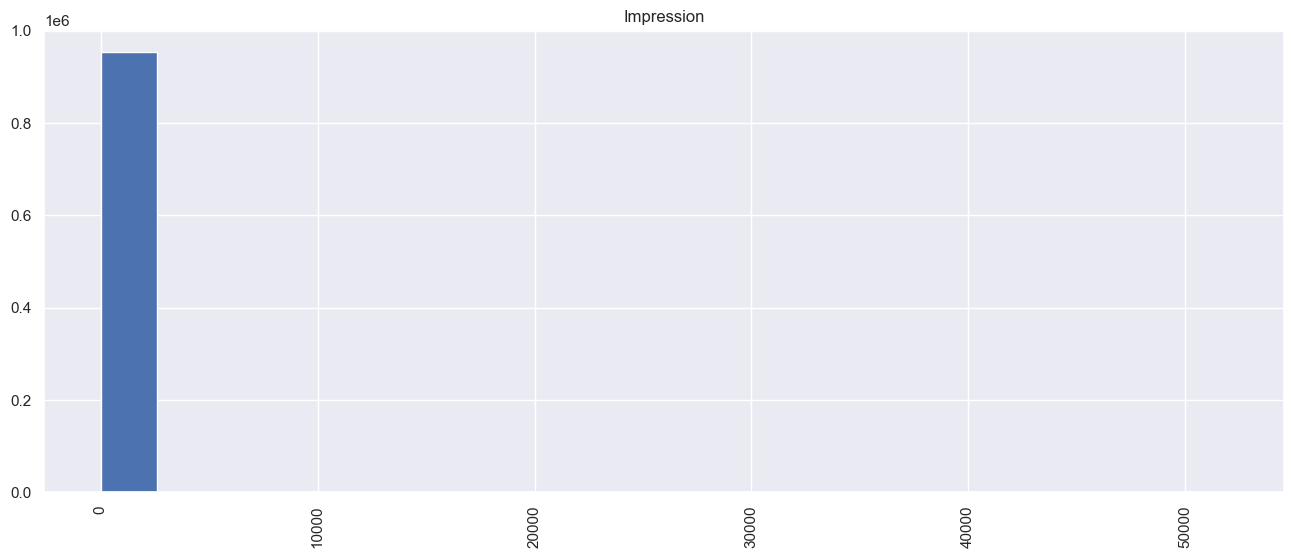

In [57]:
cat_val(cat_val_7)

광고비율 : 4.028911792263418
--------------------------------------------------
Click 평균 : 0.8403158881006558
--------------------------------------------------
0     0.710079
1     0.152992
2     0.056485
3     0.025967
4     0.013787
5     0.007496
6     0.007496
7     0.004283
11    0.002275
9     0.002275
8     0.002008
12    0.002008
13    0.001472
14    0.001472
15    0.001205
19    0.001071
10    0.000937
18    0.000937
16    0.000937
17    0.000803
20    0.000669
22    0.000535
28    0.000535
29    0.000535
27    0.000402
23    0.000268
32    0.000134
44    0.000134
25    0.000134
21    0.000134
24    0.000134
35    0.000134
51    0.000134
48    0.000134
Name: Click, dtype: float64
--------------------------------------------------
Cost 평균 : 183.20706732699773
--------------------------------------------------
0.0       0.710079
50.0      0.067461
100.0     0.024495
150.0     0.012582
300.0     0.011377
            ...   
1100.0    0.000134
2250.0    0.000134
1350.0    0.000134
480

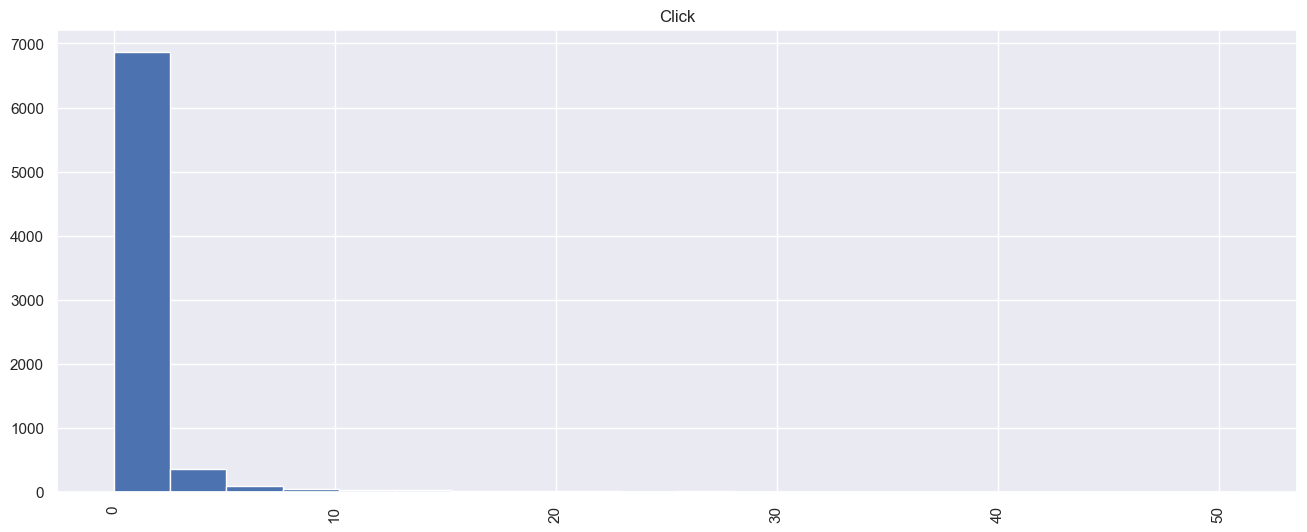

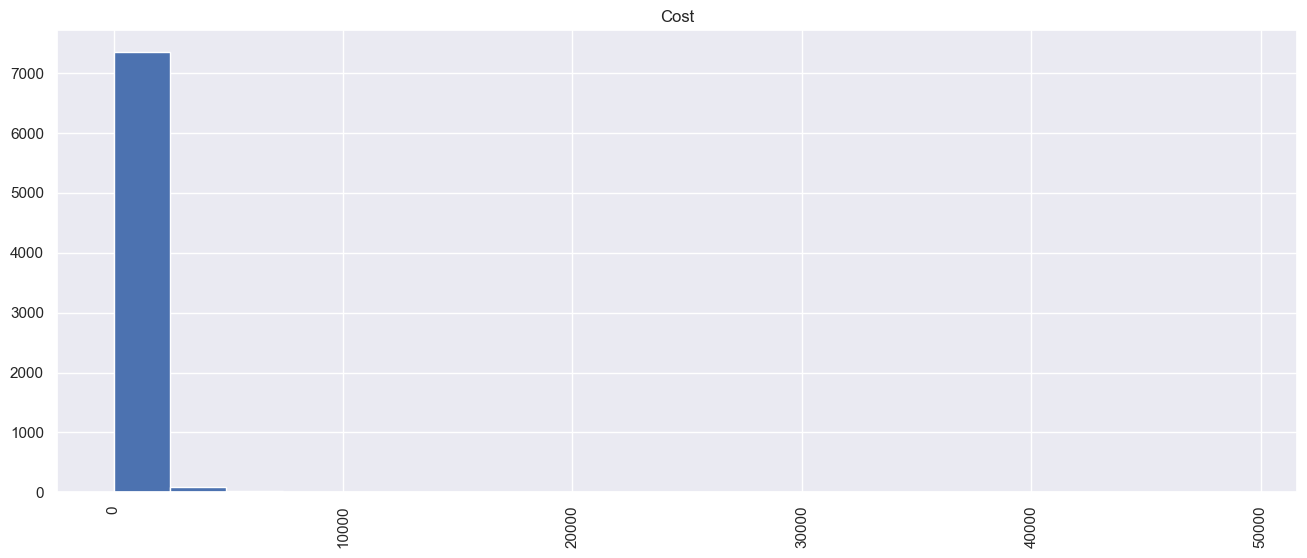

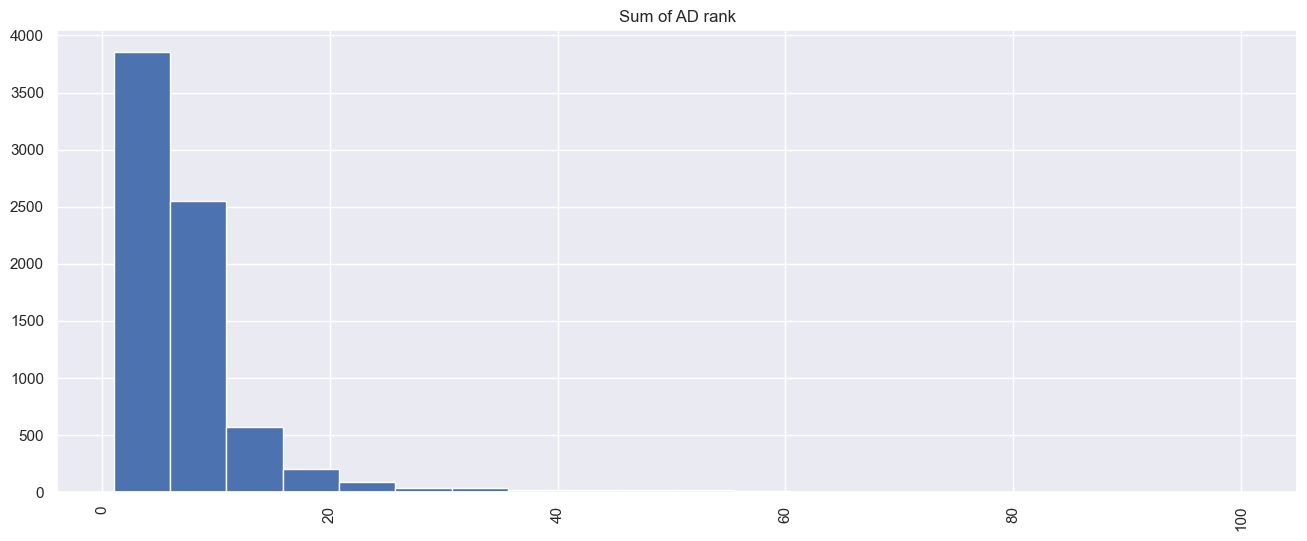

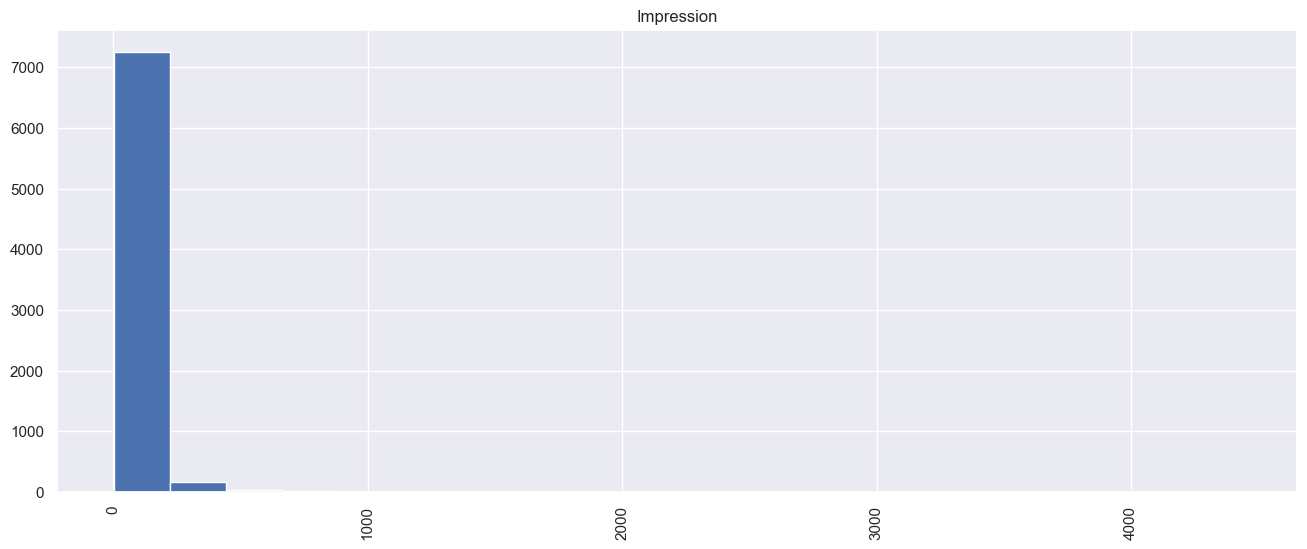

In [58]:
cat_val(cat_val_8)

광고비율 : 3.4797123780174624
--------------------------------------------------
Click 평균 : 0.9188495120698511
--------------------------------------------------
0      0.727401
1      0.146764
2      0.048023
3      0.025552
4      0.010144
5      0.009630
6      0.004366
7      0.003338
12     0.002953
9      0.002696
11     0.002440
10     0.002440
8      0.002183
14     0.001798
13     0.001412
22     0.000899
15     0.000899
19     0.000514
28     0.000514
17     0.000514
24     0.000385
33     0.000385
18     0.000385
41     0.000385
21     0.000385
32     0.000385
23     0.000385
37     0.000257
25     0.000257
16     0.000257
31     0.000128
38     0.000128
97     0.000128
136    0.000128
57     0.000128
123    0.000128
48     0.000128
85     0.000128
72     0.000128
71     0.000128
20     0.000128
26     0.000128
49     0.000128
27     0.000128
75     0.000128
50     0.000128
Name: Click, dtype: float64
--------------------------------------------------
Cost 평균 : 254.6443246019517

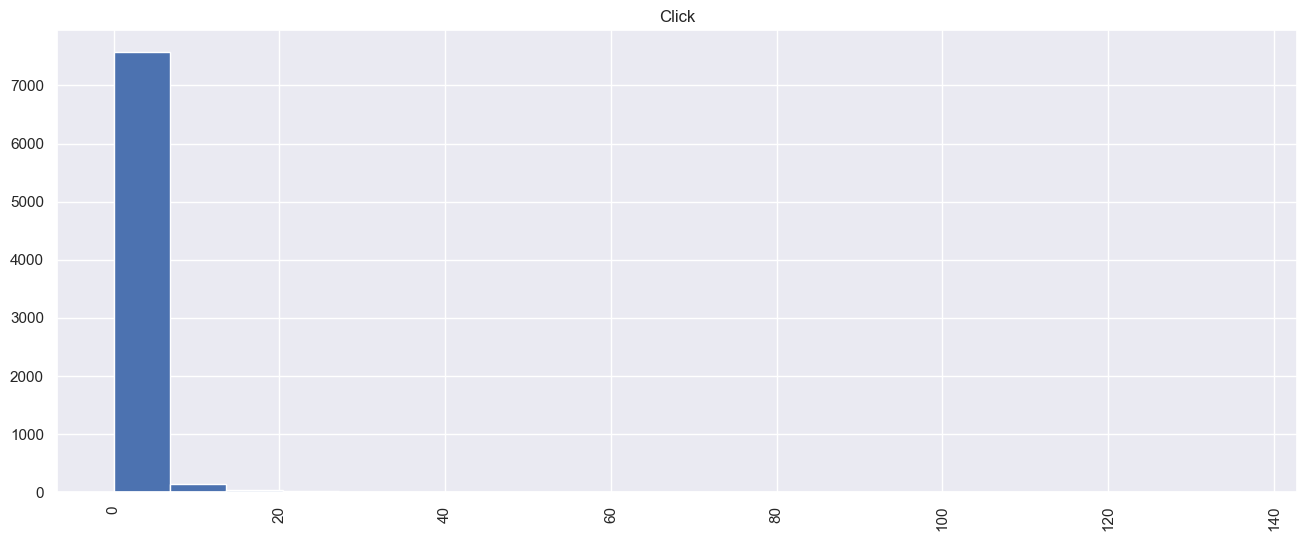

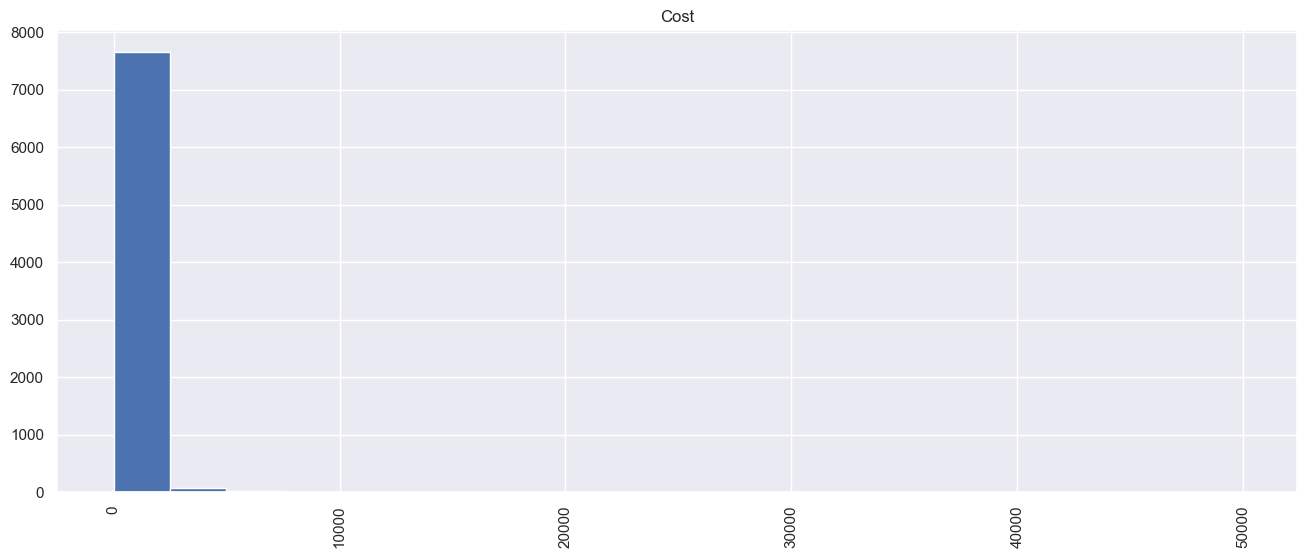

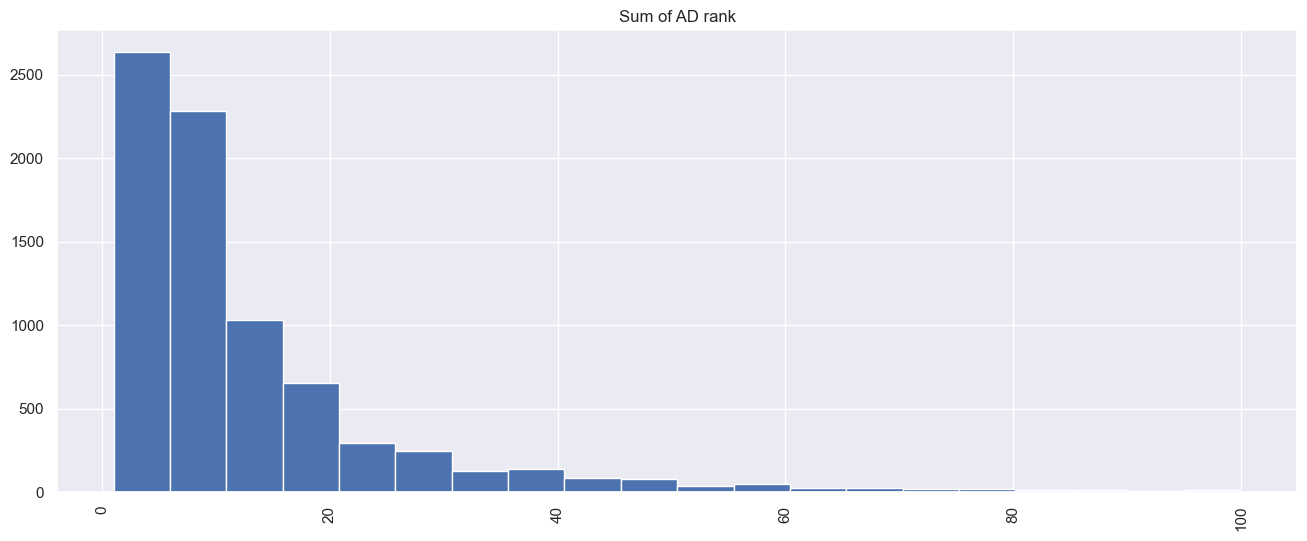

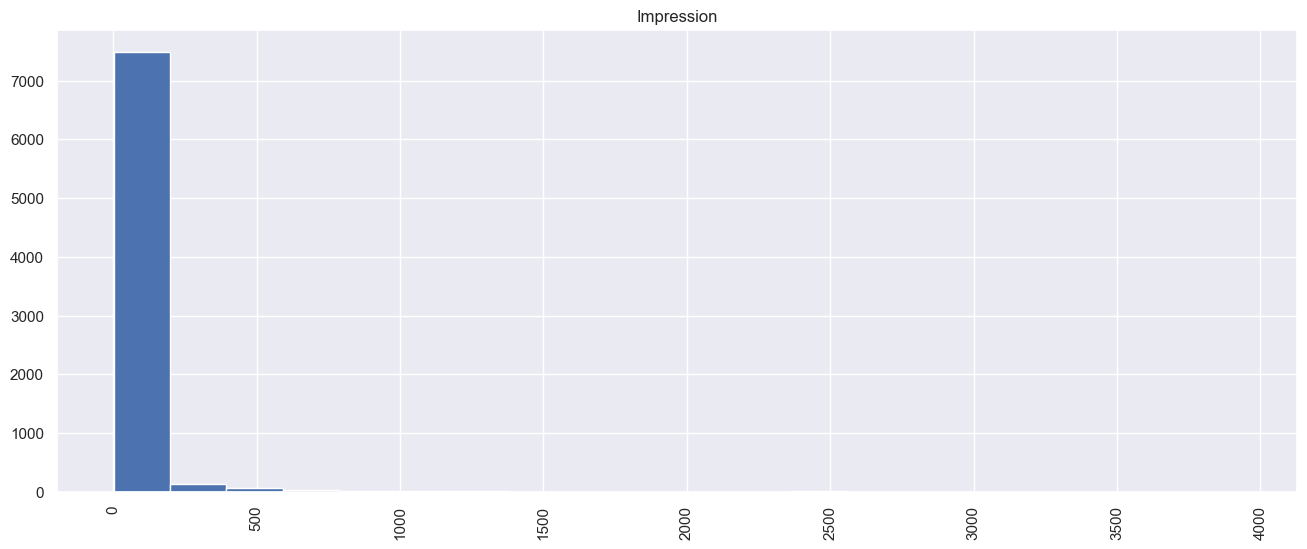

In [59]:
cat_val(cat_val_9)

광고비율 : 3.221957040572793
--------------------------------------------------
Click 평균 : 1.8711217183770883
--------------------------------------------------
0     0.633652
1     0.146778
2     0.073986
3     0.031026
5     0.014320
4     0.014320
6     0.011933
12    0.007160
20    0.005967
13    0.005967
14    0.005967
29    0.004773
15    0.004773
18    0.004773
10    0.003580
9     0.003580
19    0.003580
23    0.002387
35    0.002387
27    0.002387
21    0.002387
11    0.002387
7     0.002387
16    0.002387
17    0.001193
22    0.001193
28    0.001193
26    0.001193
25    0.001193
8     0.001193
Name: Click, dtype: float64
--------------------------------------------------
Cost 평균 : 156.6348448687351
--------------------------------------------------
0.0       0.633652
50.0      0.131265
100.0     0.042959
150.0     0.014320
200.0     0.010740
            ...   
930.0     0.001193
2110.0    0.001193
1400.0    0.001193
1320.0    0.001193
240.0     0.001193
Name: Cost, Length: 80, dt

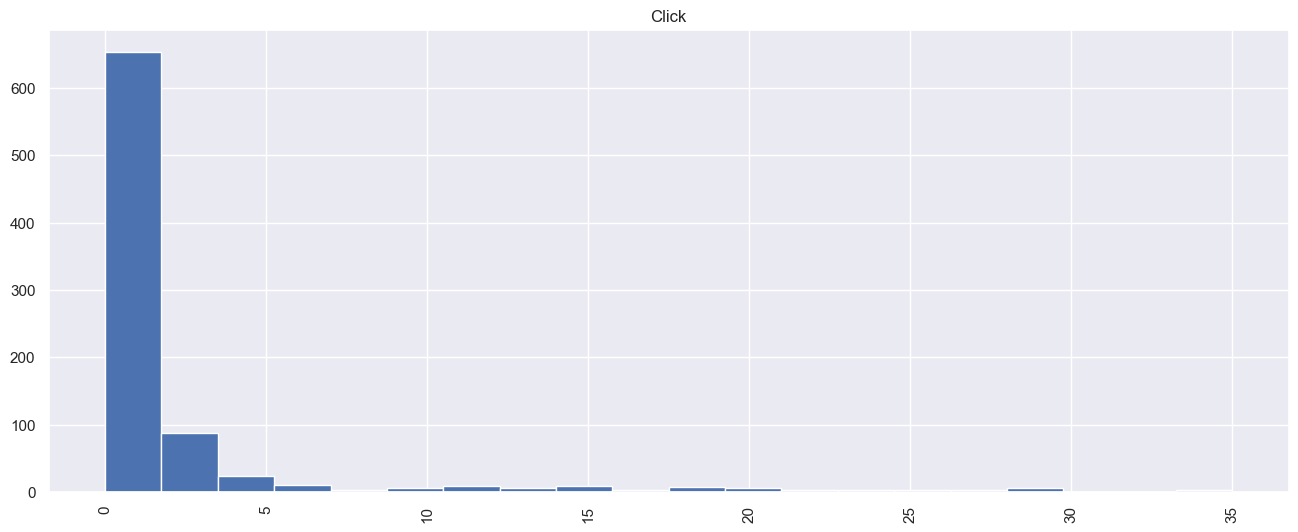

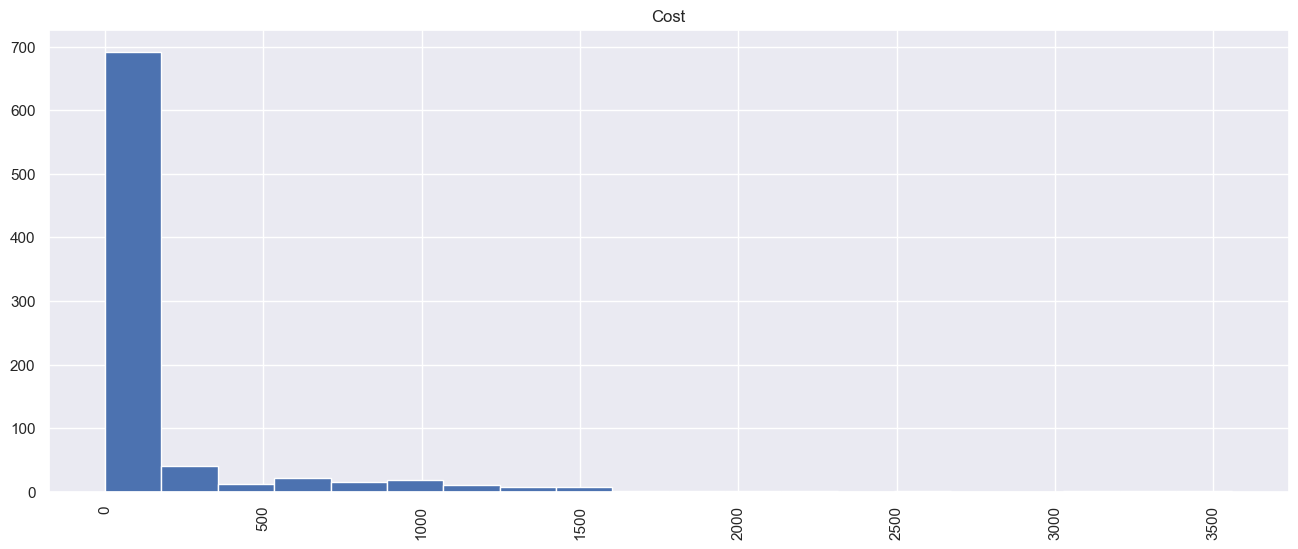

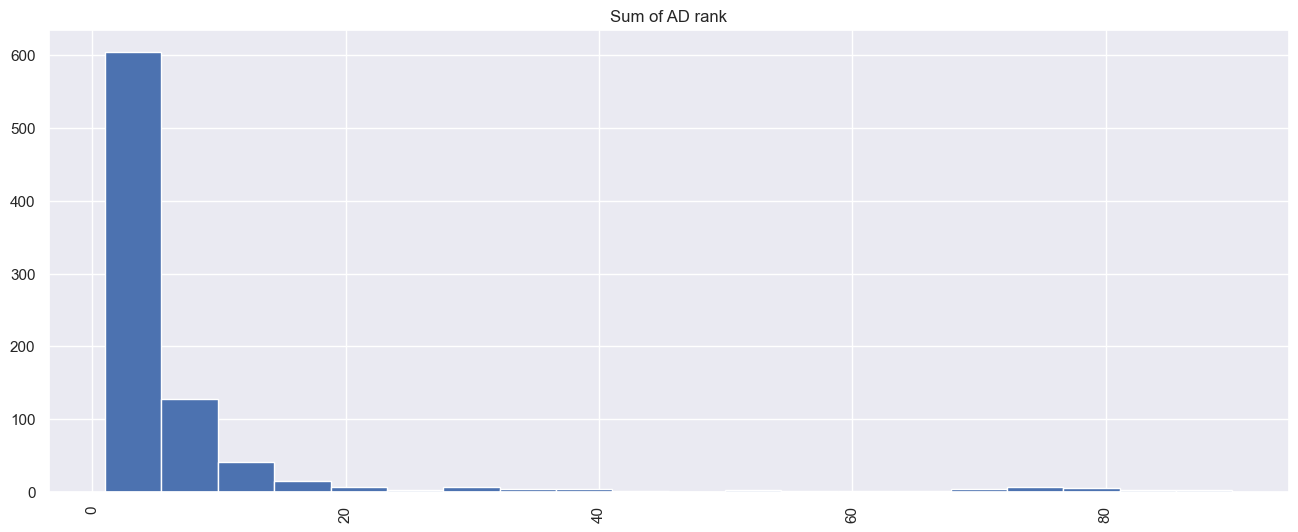

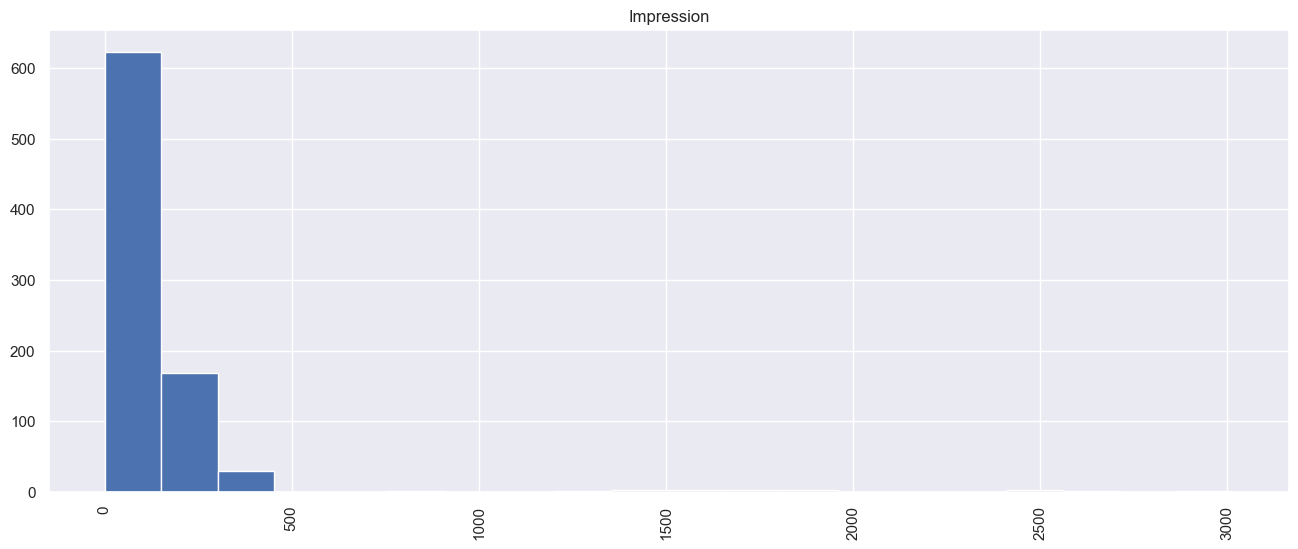

In [60]:
cat_val(cat_val_10)

In [170]:
bidding_drop_null['Click'].mean()

0.7218645278622247

In [167]:
print('식품')
print(cat_val_1['Click'].mean())
print('-' * 50)
print(cat_val_1['Click'].value_counts(normalize=True))
print('-' * 50)
print('스포츠/레저')
print(cat_val_2['Click'].mean())
print('-' * 50)
print(cat_val_2['Click'].value_counts(normalize=True))
print('-' * 50)
print('출산/육아')
print(cat_val_3['Click'].mean())
print('-' * 50)
print(cat_val_3['Click'].value_counts(normalize=True))
print('-' * 50)
print('패션의류')
print(cat_val_4['Click'].mean())
print('-' * 50)
print(cat_val_4['Click'].value_counts(normalize=True))
print('-' * 50)
print('생활/건강')
print(cat_val_5['Click'].mean())
print('-' * 50)
print(cat_val_5['Click'].value_counts(normalize=True))
print('-' * 50)
print('디지털/가전')
print(cat_val_6['Click'].mean())
print('-' * 50)
print(cat_val_6['Click'].value_counts(normalize=True))
print('-' * 50)
print('가구/인테리어')
print(cat_val_7['Click'].mean())
print('-' * 50)
print(cat_val_7['Click'].value_counts(normalize=True))
print('-' * 50)
print('화장품/미용')
print(cat_val_8['Click'].mean())
print('-' * 50)
print(cat_val_8['Click'].value_counts(normalize=True))
print('-' * 50)
print('패션잡화')
print(cat_val_9['Click'].mean())
print('-' * 50)
print(cat_val_9['Click'].value_counts(normalize=True))
print('-' * 50)
print('여가/생활편의/건강')
print(cat_val_10['Click'].mean())
print('-' * 50)
print(cat_val_10['Click'].value_counts(normalize=True))
print('-' * 50)

식품
0.0
--------------------------------------------------
0    1.0
Name: Click, dtype: float64
--------------------------------------------------
스포츠/레저
1.4078014184397163
--------------------------------------------------
0      0.698582
1      0.134752
2      0.051418
3      0.030142
4      0.019504
6      0.014184
5      0.014184
8      0.005319
12     0.003546
7      0.003546
10     0.003546
145    0.001773
16     0.001773
19     0.001773
20     0.001773
21     0.001773
27     0.001773
44     0.001773
33     0.001773
11     0.001773
13     0.001773
14     0.001773
32     0.001773
Name: Click, dtype: float64
--------------------------------------------------
출산/육아
1.4477933261571583
--------------------------------------------------
0     0.641550
1     0.160388
2     0.069968
3     0.027987
4     0.023681
5     0.013994
6     0.009688
7     0.007535
13    0.007535
9     0.006459
8     0.005382
11    0.004306
10    0.003229
19    0.002153
16    0.002153
12    0.002153
30    0.002153

In [171]:
bidding_drop_null['Cost'].mean()

180.75467375194467

In [169]:
print('식품')
print(cat_val_1['Cost'].mean())
print('-' * 50)
print(cat_val_1['Cost'].value_counts(normalize=True))
print('-' * 50)
print('스포츠/레저')
print(cat_val_2['Cost'].mean())
print('-' * 50)
print(cat_val_2['Cost'].value_counts(normalize=True))
print('-' * 50)
print('출산/육아')
print(cat_val_3['Cost'].mean())
print('-' * 50)
print(cat_val_3['Cost'].value_counts(normalize=True))
print('-' * 50)
print('패션의류')
print(cat_val_4['Cost'].mean())
print('-' * 50)
print(cat_val_4['Cost'].value_counts(normalize=True))
print('-' * 50)
print('생활/건강')
print(cat_val_5['Cost'].mean())
print('-' * 50)
print(cat_val_5['Cost'].value_counts(normalize=True))
print('-' * 50)
print('디지털/가전')
print(cat_val_6['Cost'].mean())
print('-' * 50)
print(cat_val_6['Cost'].value_counts(normalize=True))
print('-' * 50)
print('가구/인테리어')
print(cat_val_7['Cost'].mean())
print('-' * 50)
print(cat_val_7['Cost'].value_counts(normalize=True))
print('-' * 50)
print('화장품/미용')
print(cat_val_8['Cost'].mean())
print('-' * 50)
print(cat_val_8['Cost'].value_counts(normalize=True))
print('-' * 50)
print('패션잡화')
print(cat_val_9['Cost'].mean())
print('-' * 50)
print(cat_val_9['Cost'].value_counts(normalize=True))
print('-' * 50)
print('여가/생활편의/건강')
print(cat_val_10['Cost'].mean())
print('-' * 50)
print(cat_val_10['Cost'].value_counts(normalize=True))
print('-' * 50)

식품
0.0
--------------------------------------------------
0.0    1.0
Name: Cost, dtype: float64
--------------------------------------------------
스포츠/레저
319.3262411347518
--------------------------------------------------
0.0       0.698582
50.0      0.051418
100.0     0.017730
200.0     0.017730
160.0     0.010638
            ...   
4070.0    0.001773
870.0     0.001773
1930.0    0.001773
680.0     0.001773
250.0     0.001773
Name: Cost, Length: 88, dtype: float64
--------------------------------------------------
출산/육아
267.83638320775026
--------------------------------------------------
0.0       0.641550
50.0      0.077503
100.0     0.021529
150.0     0.019376
200.0     0.015070
            ...   
1170.0    0.001076
5270.0    0.001076
1090.0    0.001076
1070.0    0.001076
800.0     0.001076
Name: Cost, Length: 112, dtype: float64
--------------------------------------------------
패션의류
575.1260504201681
--------------------------------------------------
0.0        0.747899
500.0   

In [173]:
bidding_drop_null['Sum of AD rank'].mean()

11.395459472615535

In [172]:
print('식품')
print(cat_val_1['Sum of AD rank'].mean())
print('-' * 50)
print(cat_val_1['Sum of AD rank'].value_counts(normalize=True))
print('-' * 50)
print('스포츠/레저')
print(cat_val_2['Sum of AD rank'].mean())
print('-' * 50)
print(cat_val_2['Sum of AD rank'].value_counts(normalize=True))
print('-' * 50)
print('출산/육아')
print(cat_val_3['Sum of AD rank'].mean())
print('-' * 50)
print(cat_val_3['Sum of AD rank'].value_counts(normalize=True))
print('-' * 50)
print('패션의류')
print(cat_val_4['Sum of AD rank'].mean())
print('-' * 50)
print(cat_val_4['Sum of AD rank'].value_counts(normalize=True))
print('-' * 50)
print('생활/건강')
print(cat_val_5['Sum of AD rank'].mean())
print('-' * 50)
print(cat_val_5['Sum of AD rank'].value_counts(normalize=True))
print('-' * 50)
print('디지털/가전')
print(cat_val_6['Sum of AD rank'].mean())
print('-' * 50)
print(cat_val_6['Sum of AD rank'].value_counts(normalize=True))
print('-' * 50)
print('가구/인테리어')
print(cat_val_7['Sum of AD rank'].mean())
print('-' * 50)
print(cat_val_7['Sum of AD rank'].value_counts(normalize=True))
print('-' * 50)
print('화장품/미용')
print(cat_val_8['Sum of AD rank'].mean())
print('-' * 50)
print(cat_val_8['Sum of AD rank'].value_counts(normalize=True))
print('-' * 50)
print('패션잡화')
print(cat_val_9['Sum of AD rank'].mean())
print('-' * 50)
print(cat_val_9['Sum of AD rank'].value_counts(normalize=True))
print('-' * 50)
print('여가/생활편의/건강')
print(cat_val_10['Sum of AD rank'].mean())
print('-' * 50)
print(cat_val_10['Sum of AD rank'].value_counts(normalize=True))
print('-' * 50)

식품
13.125
--------------------------------------------------
10.0    0.250
11.0    0.125
17.0    0.125
16.0    0.125
5.0     0.125
6.0     0.125
30.0    0.125
Name: Sum of AD rank, dtype: float64
--------------------------------------------------
스포츠/레저
11.053191489361701
--------------------------------------------------
3.0     0.085106
2.0     0.085106
6.0     0.083333
1.0     0.072695
5.0     0.067376
4.0     0.067376
8.0     0.056738
7.0     0.054965
9.0     0.049645
10.0    0.040780
12.0    0.033688
11.0    0.031915
13.0    0.028369
16.0    0.019504
20.0    0.017730
15.0    0.017730
18.0    0.015957
19.0    0.014184
17.0    0.012411
24.0    0.010638
21.0    0.010638
33.0    0.008865
25.0    0.008865
14.0    0.008865
22.0    0.008865
28.0    0.007092
38.0    0.007092
29.0    0.005319
34.0    0.005319
23.0    0.005319
30.0    0.005319
31.0    0.005319
35.0    0.003546
26.0    0.003546
43.0    0.003546
44.0    0.003546
32.0    0.003546
64.0    0.003546
95.0    0.003546
42.0    0.001

In [175]:
bidding_drop_null['Impression'].mean()

44.281237159248235

In [174]:
print('식품')
print(cat_val_1['Impression'].mean())
print('-' * 50)
print(cat_val_1['Impression'].value_counts(normalize=True))
print('-' * 50)
print('스포츠/레저')
print(cat_val_2['Impression'].mean())
print('-' * 50)
print(cat_val_2['Impression'].value_counts(normalize=True))
print('-' * 50)
print('출산/육아')
print(cat_val_3['Impression'].mean())
print('-' * 50)
print(cat_val_3['Impression'].value_counts(normalize=True))
print('-' * 50)
print('패션의류')
print(cat_val_4['Impression'].mean())
print('-' * 50)
print(cat_val_4['Impression'].value_counts(normalize=True))
print('-' * 50)
print('생활/건강')
print(cat_val_5['Impression'].mean())
print('-' * 50)
print(cat_val_5['Impression'].value_counts(normalize=True))
print('-' * 50)
print('디지털/가전')
print(cat_val_6['Impression'].mean())
print('-' * 50)
print(cat_val_6['Impression'].value_counts(normalize=True))
print('-' * 50)
print('가구/인테리어')
print(cat_val_7['Impression'].mean())
print('-' * 50)
print(cat_val_7['Impression'].value_counts(normalize=True))
print('-' * 50)
print('화장품/미용')
print(cat_val_8['Impression'].mean())
print('-' * 50)
print(cat_val_8['Impression'].value_counts(normalize=True))
print('-' * 50)
print('패션잡화')
print(cat_val_9['Impression'].mean())
print('-' * 50)
print(cat_val_9['Impression'].value_counts(normalize=True))
print('-' * 50)
print('여가/생활편의/건강')
print(cat_val_10['Impression'].mean())
print('-' * 50)
print(cat_val_10['Impression'].value_counts(normalize=True))
print('-' * 50)

식품
12.625
--------------------------------------------------
1     0.250
53    0.125
8     0.125
3     0.125
29    0.125
2     0.125
4     0.125
Name: Impression, dtype: float64
--------------------------------------------------
스포츠/레저
70.90602836879432
--------------------------------------------------
1      0.115248
3      0.076241
5      0.054965
2      0.053191
4      0.051418
         ...   
878    0.001773
832    0.001773
75     0.001773
142    0.001773
367    0.001773
Name: Impression, Length: 136, dtype: float64
--------------------------------------------------
출산/육아
58.27125941872982
--------------------------------------------------
1       0.099031
2       0.076426
3       0.052745
4       0.037675
5       0.036598
          ...   
1007    0.001076
188     0.001076
166     0.001076
87      0.001076
225     0.001076
Name: Impression, Length: 206, dtype: float64
--------------------------------------------------
패션의류
55.89915966386555
----------------------------------------

In [180]:
bidding_drop_null['Price(PC)'].median()

59000.0

In [178]:
print('식품')
print(cat_val_1['Price(PC)'].median())
print('-' * 50)
print(cat_val_1['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('스포츠/레저')
print(cat_val_2['Price(PC)'].median())
print('-' * 50)
print(cat_val_2['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('출산/육아')
print(cat_val_3['Price(PC)'].median())
print('-' * 50)
print(cat_val_3['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('패션의류')
print(cat_val_4['Price(PC)'].median())
print('-' * 50)
print(cat_val_4['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('생활/건강')
print(cat_val_5['Price(PC)'].median())
print('-' * 50)
print(cat_val_5['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('디지털/가전')
print(cat_val_6['Price(PC)'].median())
print('-' * 50)
print(cat_val_6['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('가구/인테리어')
print(cat_val_7['Price(PC)'].median())
print('-' * 50)
print(cat_val_7['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('화장품/미용')
print(cat_val_8['Price(PC)'].median())
print('-' * 50)
print(cat_val_8['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('패션잡화')
print(cat_val_9['Price(PC)'].median())
print('-' * 50)
print(cat_val_9['Price(PC)'].value_counts(normalize=True))
print('-' * 50)
print('여가/생활편의/건강')
print(cat_val_10['Price(PC)'].median())
print('-' * 50)
print(cat_val_10['Price(PC)'].value_counts(normalize=True))
print('-' * 50)

식품
10900.0
--------------------------------------------------
48500    0.125
43100    0.125
12000    0.125
9000     0.125
5900     0.125
9900     0.125
4400     0.125
11900    0.125
Name: Price(PC), dtype: float64
--------------------------------------------------
스포츠/레저
34950.0
--------------------------------------------------
9900     0.015957
15900    0.015957
29900    0.014184
13900    0.012411
99000    0.012411
           ...   
94200    0.001773
99800    0.001773
24000    0.001773
35000    0.001773
18100    0.001773
Name: Price(PC), Length: 321, dtype: float64
--------------------------------------------------
출산/육아
31900.0
--------------------------------------------------
19900     0.016146
8900      0.015070
12900     0.015070
14900     0.015070
9900      0.015070
            ...   
101900    0.001076
49000     0.001076
39800     0.001076
38800     0.001076
46300     0.001076
Name: Price(PC), Length: 417, dtype: float64
--------------------------------------------------
패션의류


In [ ]:
cat_col = ['Click', 'Cost', 'Sum of AD rank', 'Impression', 'Price(PC)']

(array([1]), [Text(0, 0, '')])

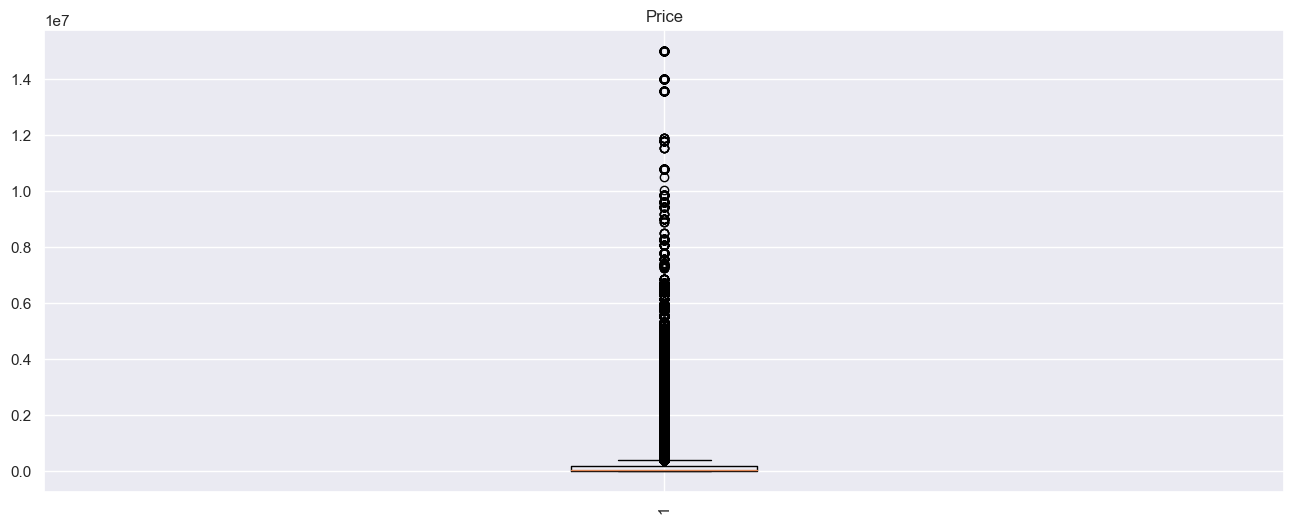

In [179]:
plt.figure(figsize=(16, 6))
plt.boxplot(bidding_drop_null['Price(PC)'])
plt.title('Price')
plt.xticks(rotation=90)

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000., 14000000., 16000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

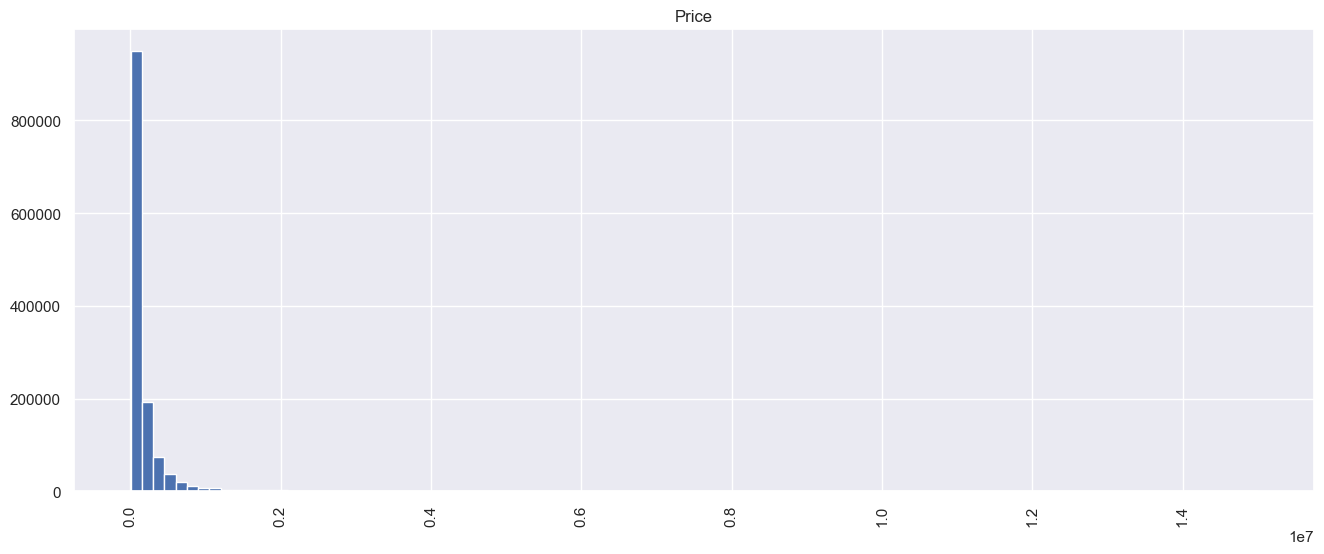

In [181]:
plt.figure(figsize=(16, 6))
plt.hist(bidding_drop_null['Price(PC)'], bins=100)
plt.title('Price')
plt.xticks(rotation=90)

In [ ]:
bidding_drop_null['Price(PC)'].mean()

## 광고별 카테고리 비율

In [61]:
bidding_drop_null

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,CTR,CPC,CPM
date,,,,,,,,,,,,,,,,
2022-10-31,3575092,3,0,0.0,3.0,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,0.000000,0.0,0.00
2022-10-31,3575637,6,0,0.0,3.0,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2022-10-31,4129259,7,0,0.0,8.0,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,0.000000,0.0,0.00
2022-10-31,4131479,36,3,150.0,4.0,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,null_cat4,8.333333,50.0,0.15
2022-10-31,4131482,224,0,0.0,6.0,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,null_cat4,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2566795,5,0,0.0,13.0,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2023-01-03,2566880,3,0,0.0,17.0,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,0.000000,0.0,0.00
2023-01-03,2566881,1,0,0.0,8.0,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,null_cat4,0.000000,0.0,0.00


In [62]:
idx = (list(set(bidding_drop_null["index"].values)))
len(idx)

48486

In [63]:
idx_cat = bidding_drop_null.drop_duplicates(['index'])
idx_cat

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,CTR,CPC,CPM
date,,,,,,,,,,,,,,,,
2022-10-31,3575092,3,0,0.0,3.0,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,0.000000,0.0,0.00
2022-10-31,3575637,6,0,0.0,3.0,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2022-10-31,4129259,7,0,0.0,8.0,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,0.000000,0.0,0.00
2022-10-31,4131479,36,3,150.0,4.0,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,null_cat4,8.333333,50.0,0.15
2022-10-31,4131482,224,0,0.0,6.0,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,null_cat4,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,2566795,5,0,0.0,13.0,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,0.000000,0.0,0.00
2023-01-03,2566880,3,0,0.0,17.0,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,0.000000,0.0,0.00
2023-01-03,2566881,1,0,0.0,8.0,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,null_cat4,0.000000,0.0,0.00


In [64]:
def idx_col(df):

    cat_col = ['Click', 'Cost', 'Sum of AD rank', 'Impression']

    for col in cat_col:
        print(f'{col} 평균 : {df[col].mean()}')
        print('-' * 50)
        print(df[col].value_counts(normalize=True))
        print('-' * 50)

In [65]:
idx_col(idx_cat)

Click 평균 : 0.6015757125768263
--------------------------------------------------
0     0.801881
1     0.110795
2     0.034629
3     0.015592
4     0.009529
        ...   
67    0.000021
63    0.000021
59    0.000021
74    0.000021
51    0.000021
Name: Click, Length: 69, dtype: float64
--------------------------------------------------
Cost 평균 : 176.55921296869198
--------------------------------------------------
0.0        0.801881
50.0       0.030648
100.0      0.008477
350.0      0.006662
500.0      0.005424
             ...   
15490.0    0.000021
12750.0    0.000021
10660.0    0.000021
10500.0    0.000021
10400.0    0.000021
Name: Cost, Length: 657, dtype: float64
--------------------------------------------------
Sum of AD rank 평균 : 12.199232768221755
--------------------------------------------------
2.0      0.108258
4.0      0.081652
3.0      0.076146
6.0      0.071134
1.0      0.069752
           ...   
99.0     0.000392
98.0     0.000371
97.0     0.000371
91.0     0.000309
10

In [66]:
idx_cat['Category Name 1'].value_counts(normalize=True)

가구/인테리어    0.709504
생활/건강      0.240956
출산/육아      0.019160
스포츠/레저     0.011632
화장품/미용     0.006208
패션잡화       0.005589
디지털/가전     0.003774
패션의류       0.002454
여가/생활편의    0.000557
식품         0.000165
Name: Category Name 1, dtype: float64

In [67]:
cat_val_1 = idx_cat[idx_cat['Category Name 1'].isin(['식품'])]
cat_val_2 = idx_cat[idx_cat['Category Name 1'].isin(['스포츠/레저'])]
cat_val_3 = idx_cat[idx_cat['Category Name 1'].isin(['출산/육아'])]
cat_val_4 = idx_cat[idx_cat['Category Name 1'].isin(['패션의류'])]
cat_val_5 = idx_cat[idx_cat['Category Name 1'].isin(['생활/건강'])]
cat_val_6 = idx_cat[idx_cat['Category Name 1'].isin(['디지털/가전'])]
cat_val_7 = idx_cat[idx_cat['Category Name 1'].isin(['가구/인테리어'])]
cat_val_8 = idx_cat[idx_cat['Category Name 1'].isin(['화장품/미용'])]
cat_val_9 = idx_cat[idx_cat['Category Name 1'].isin(['패션잡화'])]
cat_val_10 = idx_cat[idx_cat['Category Name 1'].isin(['여가/생활편의'])]

In [68]:
idx_col(cat_val_1)

Click 평균 : 0.0
--------------------------------------------------
0    1.0
Name: Click, dtype: float64
--------------------------------------------------
Cost 평균 : 0.0
--------------------------------------------------
0.0    1.0
Name: Cost, dtype: float64
--------------------------------------------------
Sum of AD rank 평균 : 13.125
--------------------------------------------------
10.0    0.250
11.0    0.125
17.0    0.125
16.0    0.125
5.0     0.125
6.0     0.125
30.0    0.125
Name: Sum of AD rank, dtype: float64
--------------------------------------------------
Impression 평균 : 12.625
--------------------------------------------------
1     0.250
53    0.125
8     0.125
3     0.125
29    0.125
2     0.125
4     0.125
Name: Impression, dtype: float64
--------------------------------------------------


In [69]:
idx_col(cat_val_2)

Click 평균 : 1.4078014184397163
--------------------------------------------------
0      0.698582
1      0.134752
2      0.051418
3      0.030142
4      0.019504
6      0.014184
5      0.014184
8      0.005319
12     0.003546
7      0.003546
10     0.003546
145    0.001773
16     0.001773
19     0.001773
20     0.001773
21     0.001773
27     0.001773
44     0.001773
33     0.001773
11     0.001773
13     0.001773
14     0.001773
32     0.001773
Name: Click, dtype: float64
--------------------------------------------------
Cost 평균 : 319.3262411347518
--------------------------------------------------
0.0       0.698582
50.0      0.051418
100.0     0.017730
200.0     0.017730
160.0     0.010638
            ...   
4070.0    0.001773
870.0     0.001773
1930.0    0.001773
680.0     0.001773
250.0     0.001773
Name: Cost, Length: 88, dtype: float64
--------------------------------------------------
Sum of AD rank 평균 : 11.053191489361701
--------------------------------------------------
3.0 

In [70]:
idx_col(cat_val_3)

Click 평균 : 1.4477933261571583
--------------------------------------------------
0     0.641550
1     0.160388
2     0.069968
3     0.027987
4     0.023681
5     0.013994
6     0.009688
7     0.007535
13    0.007535
9     0.006459
8     0.005382
11    0.004306
10    0.003229
19    0.002153
16    0.002153
12    0.002153
30    0.002153
14    0.001076
17    0.001076
59    0.001076
43    0.001076
36    0.001076
63    0.001076
49    0.001076
18    0.001076
20    0.001076
Name: Click, dtype: float64
--------------------------------------------------
Cost 평균 : 267.83638320775026
--------------------------------------------------
0.0       0.641550
50.0      0.077503
100.0     0.021529
150.0     0.019376
200.0     0.015070
            ...   
1170.0    0.001076
5270.0    0.001076
1090.0    0.001076
1070.0    0.001076
800.0     0.001076
Name: Cost, Length: 112, dtype: float64
--------------------------------------------------
Sum of AD rank 평균 : 7.890204520990312
--------------------------------

In [71]:
idx_col(cat_val_4)

Click 평균 : 1.403361344537815
--------------------------------------------------
0     0.747899
1     0.100840
2     0.042017
6     0.033613
3     0.025210
5     0.016807
30    0.008403
20    0.008403
10    0.008403
42    0.008403
Name: Click, dtype: float64
--------------------------------------------------
Cost 평균 : 575.1260504201681
--------------------------------------------------
0.0        0.747899
500.0      0.042017
350.0      0.016807
3000.0     0.016807
2520.0     0.008403
17440.0    0.008403
2030.0     0.008403
4210.0     0.008403
50.0       0.008403
320.0      0.008403
430.0      0.008403
7970.0     0.008403
100.0      0.008403
640.0      0.008403
930.0      0.008403
210.0      0.008403
150.0      0.008403
240.0      0.008403
1000.0     0.008403
2500.0     0.008403
3830.0     0.008403
12800.0    0.008403
720.0      0.008403
110.0      0.008403
1040.0     0.008403
Name: Cost, dtype: float64
--------------------------------------------------
Sum of AD rank 평균 : 9.176470588235

In [72]:
idx_col(cat_val_5)

Click 평균 : 0.776598476418728
--------------------------------------------------
0      0.776513
1      0.118035
2      0.041428
3      0.017632
4      0.011983
5      0.006248
6      0.005564
7      0.003424
8      0.002996
12     0.002311
10     0.001883
9      0.001541
11     0.000942
14     0.000856
13     0.000856
16     0.000685
15     0.000685
19     0.000514
17     0.000514
22     0.000514
27     0.000428
21     0.000342
18     0.000342
20     0.000342
36     0.000257
24     0.000257
35     0.000171
45     0.000171
25     0.000171
37     0.000171
43     0.000171
29     0.000171
33     0.000171
31     0.000171
51     0.000086
40     0.000086
46     0.000086
32     0.000086
55     0.000086
53     0.000086
23     0.000086
136    0.000086
49     0.000086
44     0.000086
56     0.000086
81     0.000086
275    0.000086
361    0.000086
47     0.000086
28     0.000086
26     0.000086
30     0.000086
Name: Click, dtype: float64
--------------------------------------------------
Cost 평균 :

In [73]:
idx_col(cat_val_6)

Click 평균 : 1.2185792349726776
--------------------------------------------------
0     0.732240
1     0.125683
2     0.032787
4     0.032787
8     0.021858
3     0.010929
21    0.005464
7     0.005464
14    0.005464
6     0.005464
28    0.005464
23    0.005464
22    0.005464
5     0.005464
Name: Click, dtype: float64
--------------------------------------------------
Cost 평균 : 154.20765027322403
--------------------------------------------------
0.0       0.732240
50.0      0.065574
190.0     0.021858
100.0     0.016393
400.0     0.016393
180.0     0.010929
310.0     0.010929
200.0     0.010929
3390.0    0.005464
620.0     0.005464
470.0     0.005464
60.0      0.005464
240.0     0.005464
680.0     0.005464
230.0     0.005464
160.0     0.005464
1050.0    0.005464
210.0     0.005464
6110.0    0.005464
1160.0    0.005464
1850.0    0.005464
3210.0    0.005464
440.0     0.005464
1040.0    0.005464
700.0     0.005464
220.0     0.005464
1140.0    0.005464
490.0     0.005464
510.0     0.005464

In [74]:
idx_col(cat_val_7)

Click 평균 : 0.4972820557541932
--------------------------------------------------
0      0.817767
1      0.106479
2      0.030755
3      0.014215
4      0.008023
5      0.005058
6      0.003314
7      0.002384
8      0.001977
9      0.001395
10     0.001337
11     0.000872
12     0.000843
15     0.000698
14     0.000640
13     0.000581
17     0.000465
19     0.000407
16     0.000320
18     0.000233
21     0.000233
25     0.000145
23     0.000145
22     0.000145
33     0.000145
35     0.000116
24     0.000116
34     0.000087
26     0.000087
28     0.000087
39     0.000087
27     0.000087
20     0.000058
38     0.000058
32     0.000058
42     0.000058
50     0.000029
36     0.000029
29     0.000029
37     0.000029
40     0.000029
53     0.000029
85     0.000029
147    0.000029
43     0.000029
46     0.000029
31     0.000029
74     0.000029
79     0.000029
41     0.000029
100    0.000029
67     0.000029
55     0.000029
71     0.000029
Name: Click, dtype: float64
---------------------------

In [75]:
idx_col(cat_val_8)

Click 평균 : 0.7441860465116279
--------------------------------------------------
0     0.740864
1     0.116279
2     0.073090
3     0.019934
5     0.013289
4     0.013289
6     0.006645
22    0.003322
10    0.003322
7     0.003322
29    0.003322
11    0.003322
Name: Click, dtype: float64
--------------------------------------------------
Cost 평균 : 264.25249169435216
--------------------------------------------------
0.0        0.740864
50.0       0.036545
100.0      0.013289
180.0      0.013289
840.0      0.009967
240.0      0.009967
200.0      0.009967
350.0      0.006645
60.0       0.006645
420.0      0.006645
380.0      0.006645
560.0      0.006645
300.0      0.006645
760.0      0.006645
800.0      0.006645
190.0      0.006645
2130.0     0.003322
2460.0     0.003322
160.0      0.003322
1240.0     0.003322
26310.0    0.003322
370.0      0.003322
640.0      0.003322
720.0      0.003322
2070.0     0.003322
1380.0     0.003322
940.0      0.003322
460.0      0.003322
1000.0     0.003322


In [76]:
idx_col(cat_val_9)

Click 평균 : 0.6789667896678967
--------------------------------------------------
0     0.782288
1     0.118081
2     0.033210
3     0.022140
4     0.011070
5     0.007380
6     0.007380
7     0.007380
48    0.003690
11    0.003690
9     0.003690
Name: Click, dtype: float64
--------------------------------------------------
Cost 평균 : 173.57933579335793
--------------------------------------------------
0.0       0.782288
500.0     0.014760
50.0      0.014760
230.0     0.011070
110.0     0.007380
960.0     0.007380
410.0     0.007380
310.0     0.007380
340.0     0.007380
320.0     0.003690
1610.0    0.003690
890.0     0.003690
3090.0    0.003690
4030.0    0.003690
1280.0    0.003690
1270.0    0.003690
740.0     0.003690
300.0     0.003690
350.0     0.003690
450.0     0.003690
600.0     0.003690
470.0     0.003690
270.0     0.003690
680.0     0.003690
170.0     0.003690
390.0     0.003690
1220.0    0.003690
3910.0    0.003690
1290.0    0.003690
5330.0    0.003690
100.0     0.003690
780.0 

In [77]:
idx_col(cat_val_10)

Click 평균 : 1.8888888888888888
--------------------------------------------------
0     0.740741
1     0.111111
25    0.037037
18    0.037037
3     0.037037
2     0.037037
Name: Click, dtype: float64
--------------------------------------------------
Cost 평균 : 197.40740740740742
--------------------------------------------------
0.0       0.740741
50.0      0.111111
1250.0    0.037037
2210.0    0.037037
840.0     0.037037
880.0     0.037037
Name: Cost, dtype: float64
--------------------------------------------------
Sum of AD rank 평균 : 16.333333333333332
--------------------------------------------------
2.0     0.148148
1.0     0.111111
3.0     0.111111
5.0     0.111111
11.0    0.074074
14.0    0.074074
8.0     0.037037
15.0    0.037037
10.0    0.037037
9.0     0.037037
17.0    0.037037
59.0    0.037037
54.0    0.037037
87.0    0.037037
90.0    0.037037
7.0     0.037037
Name: Sum of AD rank, dtype: float64
--------------------------------------------------
Impression 평균 : 145.77777777

In [182]:
def NDCG(y_true, y_pred):
    # y_true: ground truth, y_pred: predicted values
    # sort y_pred in descending order
    y_pred = np.flip(np.argsort(y_pred), axis=0)
    
    dcg = 0
    for i in range(len(y_pred)):
        # 각 광고의 클릭 횟수
        click = y_true[y_pred[i]]
        dcg += (2 ** click - 1) / np.log2(i + 2)
        
    idcg = 0
    y_true = np.sort(y_true)[::-1]

    for i in range(len(y_true)):
        idcg += (2 ** y_true[i] - 1) / np.log2(i + 2)
        
    return dcg / idcg

In [257]:
def NDCG(y_true, y_pred):
    # y_true: ground truth, y_pred: predicted values
    # sort y_pred in descending order
    y_pred = np.flip(np.argsort(y_pred), axis=0)
    
    dcg = 0
    for i in range(len(y_pred)):
        # 각 광고의 클릭 횟수
        click = y_true.iloc[y_pred[i]]
        dcg += (2 ** click - 1) / np.log2(i + 2)
        
    idcg = 0
    y_true = np.sort(y_true)[::-1]

    for i in range(len(y_true)):
        idcg += (2 ** y_true[i] - 1) / np.log2(i + 2)
        
    return dcg / idcg

In [ ]:
def NDCG(y_true, y_pred, k=None):
    # y_true: ground truth, y_pred: predicted values
    # k: top-k items to consider in the evaluation, if not specified, all items are considered
    if k is not None:
        y_true = y_true[:k]
        y_pred = y_pred[:k]
    
    # sort y_pred in descending order
    y_pred_sorted = np.argsort(y_pred)[::-1]
    
    dcg = 0
    for i in range(len(y_pred_sorted)):
        # 각 광고의 클릭 횟수
        click = y_true[y_pred_sorted[i]]
        dcg += (2 ** click - 1) / np.log2(i + 2)
        
    idcg = 0
    y_true_sorted = np.sort(y_true)[::-1]

    for i in range(len(y_true_sorted)):
        idcg += (2 ** y_true_sorted[i] - 1) / np.log2(i + 2)
        
    return dcg / idcg

In [240]:
def MAP(relevance, rank):
    score = 0
    num_hits = 0
    for i, rel in enumerate(relevance):
        if rel > 0:
            num_hits += 1
            score += num_hits / (i+1)
    return score / num_hits if num_hits != 0 else 0

In [275]:
bidding = bidding_df.copy()

In [276]:
bidding_drop_null = bidding.copy()
bidding_drop_null['Category Name 4'].fillna('null_cat4', inplace = True)
# bidding_drop_null['CPC'].fillna(0, inplace = True)
bidding_drop_null.dropna(axis = 0, inplace = True)
print(bidding_drop_null.isnull().sum().sort_values(ascending=False)) # null값 퍼센트로 표현

index              0
Impression         0
Click              0
Cost               0
Sum of AD rank     0
Bid                0
Price(PC)          0
Price(Mobile)      0
Delivery Fee       0
Category Name 1    0
Category Name 2    0
Category Name 3    0
Category Name 4    0
date               0
dtype: int64


In [254]:
bidding_drop_null = bidding_drop_null.reset_index()

In [255]:
cat_val_1 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['식품'])]
cat_val_2 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['스포츠/레저'])]
cat_val_3 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['출산/육아'])]
cat_val_4 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['패션의류'])]
cat_val_5 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['생활/건강'])]
cat_val_6 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['디지털/가전'])]
cat_val_7 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['가구/인테리어'])]
cat_val_8 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['화장품/미용'])]
cat_val_9 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['패션잡화'])]
cat_val_10 = bidding_drop_null[bidding_drop_null['Category Name 1'].isin(['여가/생활편의'])]

In [242]:
print(f'식품 : 스포츠/레저 = {MAP(cat_val_1["Click"], cat_val_2["Click"])}')
print(f'식품 : 출산/육아 = {MAP(cat_val_1["Click"], cat_val_3["Click"])}')
print(f'식품 : 패션의류 = {MAP(cat_val_1["Click"], cat_val_4["Click"])}')
print(f'식품 : 생활/건강 = {MAP(cat_val_1["Click"], cat_val_5["Click"])}')
print(f'식품 : 디지털/가전 = {MAP(cat_val_1["Click"], cat_val_6["Click"])}')
print(f'식품 : 가구/인테리어 = {MAP(cat_val_1["Click"], cat_val_7["Click"])}')
print(f'식품 : 화장품/미용 = {MAP(cat_val_1["Click"], cat_val_8["Click"])}')
print(f'식품 : 패션잡화 = {MAP(cat_val_1["Click"], cat_val_9["Click"])}')
print(f'식품 : 여가/생활편의 = {MAP(cat_val_1["Click"], cat_val_10["Click"])}')

식품 : 스포츠/레저 = 0.1260057935822939
식품 : 출산/육아 = 0.1260057935822939
식품 : 패션의류 = 0.1260057935822939
식품 : 생활/건강 = 0.1260057935822939
식품 : 디지털/가전 = 0.1260057935822939
식품 : 가구/인테리어 = 0.1260057935822939
식품 : 화장품/미용 = 0.1260057935822939
식품 : 패션잡화 = 0.1260057935822939
식품 : 여가/생활편의 = 0.1260057935822939


In [262]:
print(f'스포츠/레저 : 식물 = {MAP(cat_val_2["Click"], cat_val_1["Click"])}')
print(f'스포츠 : 출산/육아 = {MAP(cat_val_2["Click"], cat_val_3["Click"])}')
print(f'스포츠 : 패션의류 = {MAP(cat_val_2["Click"], cat_val_4["Click"])}')
print(f'스포츠 : 생활/건강 = {MAP(cat_val_2["Click"], cat_val_5["Click"])}')
print(f'스포츠 : 디지털/가전 = {MAP(cat_val_2["Click"], cat_val_6["Click"])}')
print(f'스포츠 : 가구/인테리어 = {MAP(cat_val_2["Click"], cat_val_7["Click"])}')
print(f'스포츠 : 화장품/미용 = {MAP(cat_val_2["Click"], cat_val_8["Click"])}')
print(f'스포츠 : 패션잡화 = {MAP(cat_val_2["Click"], cat_val_9["Click"])}')
print(f'스포츠 : 여가/생활편의 = {MAP(cat_val_2["Click"], cat_val_10["Click"])}')

KeyError: '[18, 77, 195, 130, 73, 75, 27, 79, 81, 83, 85, 14, 161, 87, 149, 198, 110, 8, 56, 59, 159, 60, 67, 55, 69, 68, 57, 58, 66, 65, 64, 63, 62, 71, 61, 70, 209, 72, 74, 93, 92, 91, 90, 89, 88, 86, 84, 82, 80, 78, 53, 76, 54, 49, 52, 26, 24, 23, 22, 21, 20, 19, 17, 16, 15, 13, 12, 11, 10, 9, 7, 6, 5, 4, 3, 2, 1, 25, 28, 51, 29, 100, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 99, 104, 101, 170, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 169, 155, 168, 167, 166, 165, 164, 163, 162, 160, 158, 157, 181, 182, 183, 184, 207, 206, 205, 204, 203, 202, 201, 199, 197, 196, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 156, 154, 102, 115, 125, 124, 123, 119, 118, 117, 116, 114, 153, 113, 112, 111, 109, 108, 107, 106, 105, 208, 103, 126, 127, 128, 129, 152, 151, 150, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 0] not in index'

In [261]:
def MAP(y_true, y_pred):
    # y_true: ground truth, y_pred: predicted values
    # sort y_pred in descending order
    sorted_idxs = np.argsort(y_pred)[::-1]
    y_true = y_true[sorted_idxs]
    
    avg_precision = 0
    hits = 0
    for i, y_t in enumerate(y_true):
        if y_t == 1:
            hits += 1
            avg_precision += hits / (i + 1)
    
    return avg_precision / np.sum(y_true)

In [266]:
bidding_drop_null[bidding_drop_null['Category Name 1']

,level_0,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
547,548,9736557,1,0,0.0,2.000000,100,80100,80100,3000,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20221031
7384,7392,481511,7,0,0.0,5.000000,50,143000,143000,3000,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20221031
7647,7658,651875,5,0,0.0,9.000000,100,21900,21900,0,패션의류,남성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20221031
8031,8043,1404247,146,0,0.0,1.315068,100,22900,22900,2500,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20221031
9044,9058,2410241,11,0,0.0,13.272727,50,62000,62000,2800,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326071,1331936,7291009,1,0,0.0,19.000000,90,9800,9800,3000,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20230103
1326073,1331938,7291011,15,0,0.0,10.133333,210,23900,23900,2500,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20230103
1328586,1334458,9026808,75,1,240.0,4.213333,300,25500,25500,2500,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20230103
1329258,1335131,39532,1414,5,1180.0,4.487977,780,116200,116200,0,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20230103


In [270]:
MAP(bidding_drop_null[bidding_drop_null['Category Name 1'] == '패션의류'], bidding_drop_null[bidding_drop_null['Category Name 1'] == '화장품/미용'])

TypeError: '<' not supported between instances of 'str' and 'int'

In [267]:
fashion_clothes2 = bidding_drop_null[(bidding_drop_null['Category Name 1'] == '패션의류') | (bidding_drop_null['Category Name 1'] == '화장품/미용')]

In [272]:
a = bidding_drop_null[bidding_drop_null['Category Name 1'] == '패션의류']
a

,level_0,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
547,548,9736557,1,0,0.0,2.000000,100,80100,80100,3000,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20221031
7384,7392,481511,7,0,0.0,5.000000,50,143000,143000,3000,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20221031
7647,7658,651875,5,0,0.0,9.000000,100,21900,21900,0,패션의류,남성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20221031
8031,8043,1404247,146,0,0.0,1.315068,100,22900,22900,2500,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20221031
9044,9058,2410241,11,0,0.0,13.272727,50,62000,62000,2800,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326071,1331936,7291009,1,0,0.0,19.000000,90,9800,9800,3000,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20230103
1326073,1331938,7291011,15,0,0.0,10.133333,210,23900,23900,2500,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20230103
1328586,1334458,9026808,75,1,240.0,4.213333,300,25500,25500,2500,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20230103
1329258,1335131,39532,1414,5,1180.0,4.487977,780,116200,116200,0,패션의류,여성언더웨어/잠옷,잠옷/홈웨어,null_cat4,20230103


In [ ]:
bidding_drop_null

In [277]:
bidding_drop_null['cat_1'] = np.where((bidding_drop_null['Category Name 1'] == '패션의류'), 1,0 )

In [279]:
bidding_drop_null['cat_1'].value_counts()

0    1328880
1       2331
Name: cat_1, dtype: int64

In [ ]:
bidding_drop_null[bidding_drop_null['cat_1'] == 1]

In [281]:
NDCG(bidding_drop_null[bidding_drop_null['cat_1'] == 1], bidding_drop_null[bidding_drop_null['cat_1'] == 0])

TypeError: '<' not supported between instances of 'str' and 'int'